# Imports required

In [3]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParam['figure.figsize'] = (10,6)
import seaborn as sns
import time

### Preprocessing and Cleaning

In [4]:
def load_and_preprocess_data(file_path, columns_to_clean, columns_for_zscore, zscore_threshold=3):
    """
    Load, preprocess, and identify anomalies in the dataset.
    
    Parameters:
        file_path (str): Path to the CSV file.
        columns_to_clean (list): List of column names to clean (e.g., remove dollar signs, commas).
        columns_for_zscore (list): List of numerical column names for Z-score calculation.
        zscore_threshold (float): Threshold for Z-score to identify anomalies.
        
    Returns:
        DataFrame: DataFrame containing the anomalies.
    """

In [5]:
file_path = r"C:\Users\Dell\Downloads\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv"

In [6]:
# Load the dataset
data = pd.read_csv(file_path)

In [7]:
# Count of Rows and columns in dataset
print(data.shape)

(163065, 12)


In [8]:
# View the column headers
df = pd.DataFrame(data)

df

DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2                        ELIZA COFFEE MEMORIAL HOSPITAL   
3                                     ST VINCENT'S EAST   
4                         SHELBY BAPTIST MEDICAL CENTER   
...                                                 ...   
163060                  SETON MEDICAL CENTER WILLIAMSON   
163061                     METHODIST STONE OAK HOSPITAL   
163062                        SETON MEDICAL CENTER HAYS   
163063       TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE   
163064  TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND   

           Provider Street Address Provider City Provider State  \
0           1108 ROSS CLARK CIRCLE        DOTHAN             AL   
1       2505 U S HIGHWAY 431 NORTH          BOAZ             AL   
2               205 MARENGO STREET      FLORENCE             AL   
3       50 MEDICAL PARK EAST DRIVE    BIRMINGHAM             AL   
4          1000 FIRST STREET NORTH     ALABASTER             AL   
...                            ...           ...            ...   
163060           201 SETON PARKWAY    ROUND ROCK             TX   
163061        1139 E SONTERRA BLVD   SAN ANTONIO             TX   
163062              6001 KYLE PKWY          KYLE             TX   
163063      231 SOUTH COLLINS ROAD     SUNNYVALE             TX   
163064      4400 LONG PRAIRIE ROAD  FLOWER MOUND             TX   

        Provider Zip Code Hospital Referral Region Description  \
0                   36301                          AL - Dothan   
1                   35957                      AL - Birmingham   
2                   35631                      AL - Birmingham   
3                   35235                      AL - Birmingham   
4                   35007                      AL - Birmingham   
...                   ...                                  ...   
163060              78664                          TX - Austin   
163061              78258                     TX - San Antonio   
163062              78640                          TX - Austin   
163063              75182                          TX - Dallas   
163064              75028                          TX - Dallas   

         Total Discharges   Average Covered Charges   Average Total Payments   \
0                       91                 $32963.07                 $5777.24   
1                       14                 $15131.85                 $5787.57   
2                       24                 $37560.37                 $5434.95   
3                       25                 $13998.28                 $5417.56   
4                       18                 $31633.27                 $5658.33   
...                    ...                       ...                      ...   
163060                  23                 $26314.39                 $3806.86   
163061                  11                 $21704.72                 $4027.36   
163062                  19                 $39121.73                 $5704.36   
163063                  11                 $28873.09                 $7663.09   
163064                  12                 $15042.00   

In [9]:
# Remove leading and trailing whitespace from column names
data.columns = data.columns.str.strip()

In [10]:
# View data type of each column
print(data.dtypes)

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
Total Discharges                         int64
Average Covered Charges                 object
Average Total Payments                  object
Average Medicare Payments               object
dtype: object


In [11]:
# View column headers after stripping
print("Column names after stripping whitespace:")
df = pd.DataFrame(data.columns)

df

Column names after stripping whitespace:


0
0                         DRG Definition
1                            Provider Id
2                          Provider Name
3                Provider Street Address
4                          Provider City
5                         Provider State
6                      Provider Zip Code
7   Hospital Referral Region Description
8                       Total Discharges
9                Average Covered Charges
10                Average Total Payments
11             Average Medicare Payments

In [12]:
# Check for missing values in data
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
dtype: int64


In [13]:
# Clean specified columns (remove dollar signs and commas, then convert to float)
columns_to_clean = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
for column in columns_to_clean:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

In [14]:
# Shows the statistical summary of uploaded data
print("Summary of cleaned columns:")
df = pd.DataFrame(data[columns_to_clean].describe())

df

Summary of cleaned columns:


Average Covered Charges  Average Total Payments  \
count            163065.000000           163065.000000   
mean              36133.954224             9707.473804   
std               35065.365931             7664.642598   
min                2459.400000             2673.000000   
25%               15947.160000             5234.500000   
50%               25245.820000             7214.100000   
75%               43232.590000            11286.400000   
max              929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000

In [15]:
columns_to_plot = ['Average Total Payments', 'Average Medicare Payments', 'Total Discharges', 'Average Covered Charges']

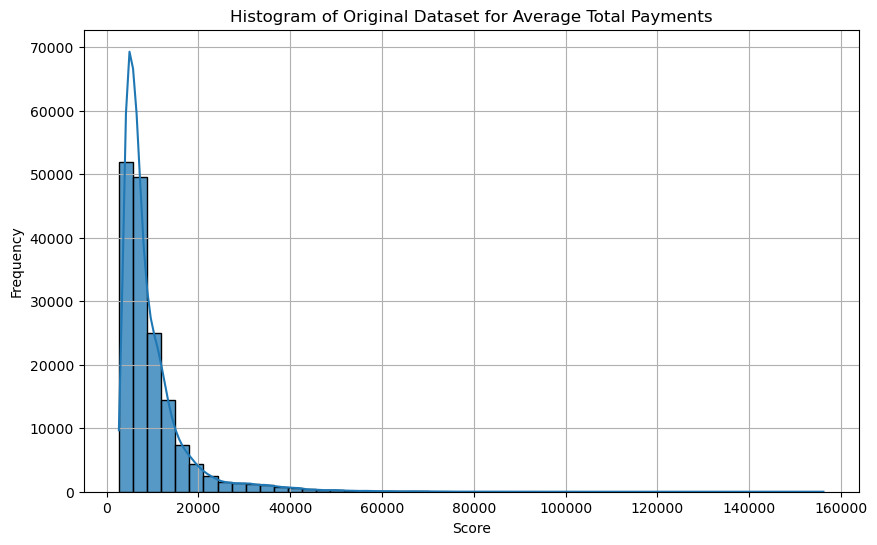

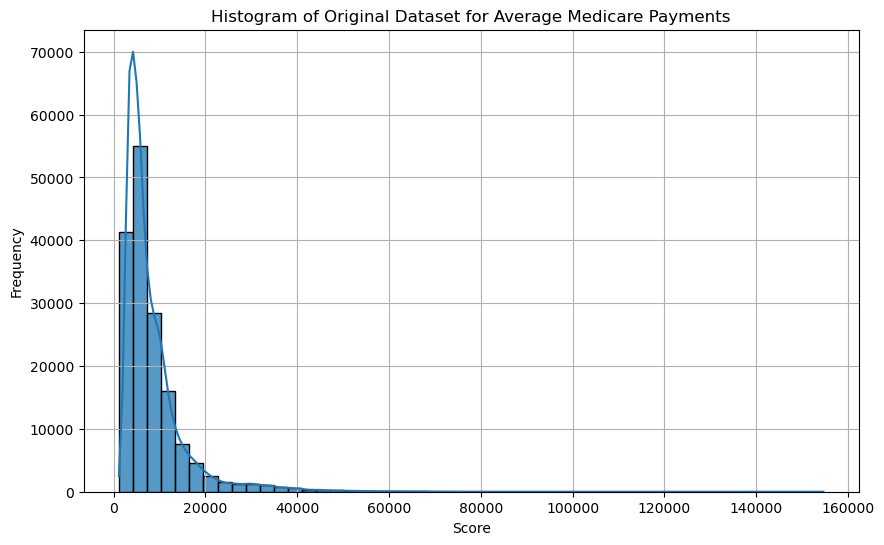

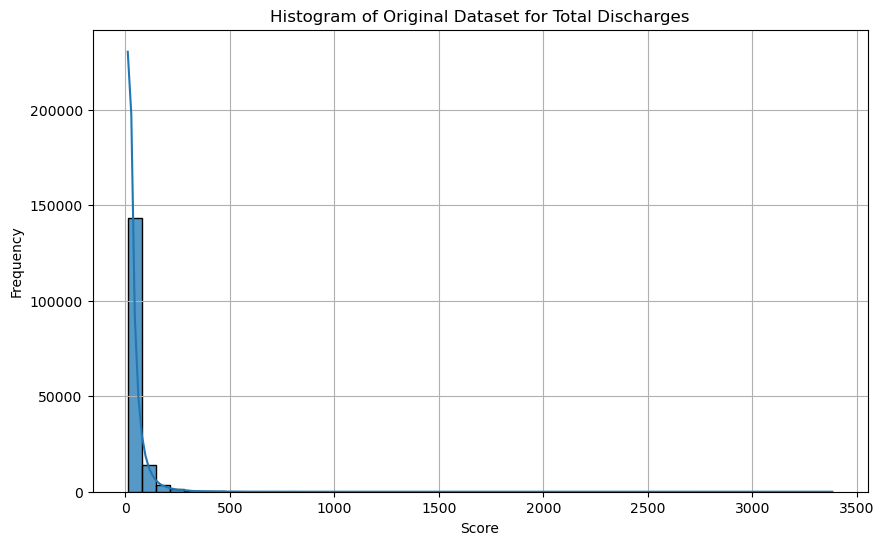

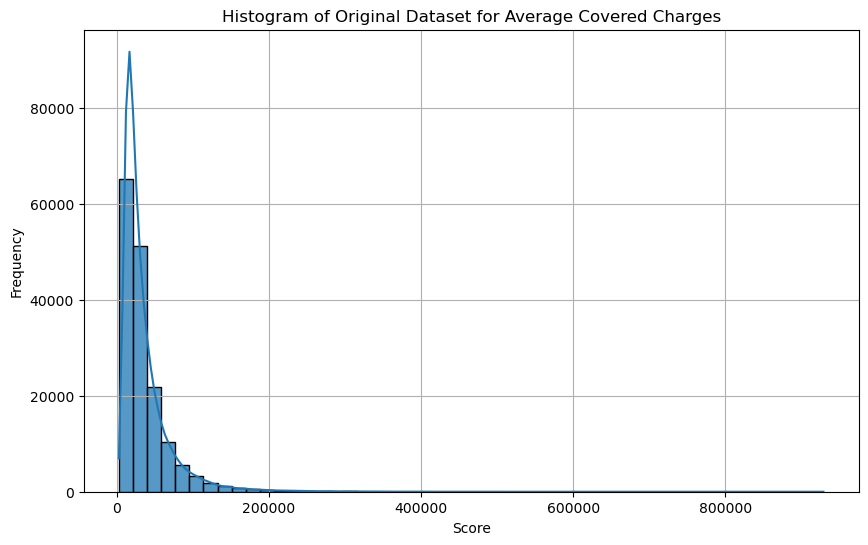

In [16]:
for column in columns_to_plot:
  #  z_column = 'Z_' + column.replace(' ', '_')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, bins=50, alpha=0.75, edgecolor='black', kde=True)
    plt.title(f'Histogram of Original Dataset for {column}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# 

# 

# Statistical Detection and Analysis

### Anomaly Detection using Z-Score

In [17]:
file_path = 'path_to_your_data.csv'
columns_to_clean = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
columns_for_zscore = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
zscore_threshold = 3

In [18]:
anomalies = load_and_preprocess_data(file_path, columns_to_clean, columns_for_zscore, zscore_threshold)

In [19]:
# Calculates Z-scores for the relevant columns and cleans the column headers replacing space ' ' with '_'
for column in columns_for_zscore:
        z_column = 'Z_' + column.replace(' ', '_')
        data[z_column] = zscore(data[column])    

In [20]:
# Function to identify anomalies using Z-score threshold
def identify_anomalies(df, z_column, threshold=3):
    return df[abs(df[z_column]) > threshold]

### Anomalies per identified column

In [21]:
anomalies_total_discharges = identify_anomalies(data, 'Z_Total_Discharges', zscore_threshold)
anomalies_avg_covered_charges = identify_anomalies(data, 'Z_Average_Covered_Charges', zscore_threshold)
anomalies_avg_total_payments = identify_anomalies(data, 'Z_Average_Total_Payments', zscore_threshold)
anomalies_avg_medicare_payments = identify_anomalies(data, 'Z_Average_Medicare_Payments', zscore_threshold)

In [22]:
# Accessing and viewing each type of anomalies individually
print("Z-score Anomalies in Total Discharges:")
#print(anomalies_total_discharges)
df = pd.DataFrame(anomalies_total_discharges)

df

Z-score Anomalies in Total Discharges:


DRG Definition  Provider Id  \
1251    057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...       100007   
3687    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       440104   
3707    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       450021   
3849    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       490063   
4338    065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        80001   
...                                                   ...          ...   
158748  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       330169   
158763  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       330208   
158851  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       360247   
158916  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       410004   
161557                     948 - SIGNS & SYMPTOMS W/O MCC       100007   

                                Provider Name      Provider Street Address  \
1251                         FLORIDA HOSPITAL             601 E ROLLINS ST   
3687                  ERLANGER MEDICAL CENTER                 975 E 3RD ST   
3707         BAYLOR UNIVERSITY MEDICAL CENTER              3500 GASTON AVE   
3849                   INOVA FAIRFAX HOSPITAL              3300 GALLOWS RD   
4338    CHRISTIANA CARE HEALTH SERVICES, INC.   4755 OGLETOWN-STANTON ROAD   
...                                       ...                          ...   
158748             BETH ISRAEL MEDICAL CENTER  FIRST AVENUE AT 16TH STREET   
158763           ST JOHN'S RIVERSIDE HOSPITAL           976 NORTH BROADWAY   
158851                  WOODS AT PARKSIDE,THE       349 OLDE RIDENOUR ROAD   
158916          ROGER WILLIAMS MEDICAL CENTER        825 CHALKSTONE AVENUE   
161557                       FLORIDA HOSPITAL             601 E ROLLINS ST   

       Provider City Provider State  Provider Zip Code  \
1251         ORLANDO             FL              32803   
3687     CHATTANOOGA             TN              37403   
3707          DALLAS             TX              75246   
3849    FALLS CHURCH             VA              22042   
4338          NEWARK             DE              19718   
...              ...            ...                ...   
158748      NEW YORK             NY              10003   
158763       YONKERS             NY              10701   
158851      COLUMBUS             OH              43230   
158916    PROVIDENCE             RI               2908   
161557       ORLANDO             FL              32803   

       Hospital Referral Region Description  Total Discharges  \
1251                           FL - Orlando               224   
3687                       TN - Chattanooga               230   
3707                            TX - Dallas               206   
3849                         VA - Arlington               205   
4338                        DE - Wilmington               285   
...                                     ...               ...   
158748                       NY - Manhattan               296   
158763                    NY - White Plains               262   
158851                        OH - Columbus               431   
158916                      RI - Providence               199   
161557                         FL - Orlando               244   

        Average Covered Charges  Average Total Payments  \
1251                   26941.47                 6077.88   
3687                   42858.31                13036.39   
3707                   43161.63                15061.36   
3849                   36441.14                15018.85   
4338                   20078.65                 8794.96   
...                         ...                     ...   
158748                 21331.22                 8029.84   
158763                  7629.98                 6060.41   
158851                  5384.68                 3913.14   
158916                 10870.81                 6053.35   
161557                 19915.59                 4365.27   

        Average Medicare Payme

In [23]:
# Accessing and viewing each type of anomalies individually
print("Z-score Anomalies in Avg Covered Charges:")
#print(anomalies_avg_covered_charges)
df = pd.DataFrame(anomalies_avg_covered_charges)

df


Z-score Anomalies in Avg Covered Charges:


DRG Definition  Provider Id  \
123              039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        50599   
1191    057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...        50441   
2397    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50103   
2405    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50125   
2414    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50152   
...                                                   ...          ...   
159132     917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC        50239   
159144     917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC        50367   
159148     917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC        50454   
159150     917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC        50464   
159721     917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC       390290   

                                        Provider Name  \
123     UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER   
1191                                STANFORD HOSPITAL   
2397                    WHITE MEMORIAL MEDICAL CENTER   
2405              REGIONAL MEDICAL CENTER OF SAN JOSE   
2414                  SAINT FRANCIS MEMORIAL HOSPITAL   
...                                               ...   
159132              GLENDALE ADVENTIST MEDICAL CENTER   
159144                        NORTHBAY MEDICAL CENTER   
159148                            UCSF MEDICAL CENTER   
159150                         DOCTORS MEDICAL CENTER   
159721                  HAHNEMANN UNIVERSITY HOSPITAL   

            Provider Street Address  Provider City Provider State  \
123         2315 STOCKTON BOULEVARD     SACRAMENTO             CA   
1191              300 PASTEUR DRIVE       STANFORD             CA   
2397            1720 E CESAR AVENUE    LOS ANGELES             CA   
2405           225 N JACKSON AVENUE       SAN JOSE             CA   
2414                    900 HYDE ST  SAN FRANCISCO             CA   
...                             ...            ...            ...   
159132        1509 E WILSON TERRACE       GLENDALE             CA   
159144     1200 B  GALE WILSON BLVD      FAIRFIELD             CA   
159148  505 PARNASSUS AVE, BOX 0296  SAN FRANCISCO             CA   
159150          1441 FLORIDA AVENUE        MODESTO             CA   
159721       230 NORTH BROAD STREET   PHILADELPHIA             PA   

        Provider Zip Code Hospital Referral Region Description  \
123                 95817                      CA - Sacramento   
1191                94305                CA - San Mateo County   
2397                90033                     CA - Los Angeles   
2405                95116                        CA - San Jose   
2414                94109                   CA - San Francisco   
...                   ...                                  ...   
159132              91206                     CA - Los Angeles   
159144              94533             CA - Contra Costa County   
159148              94143                   CA - San Francisco   
159150              95350                         CA - Modesto   
159721              19102                    PA - Philadelphia   

        Total Discharges  Average Covered Charges  Average Total Payments  \
123                   13                146892.00                11514.38   
1191                  16                148128.43                25519.43   
2397                  46                149950.26                21903.73   
2405                  46                161240.45                21440.43   
2414                  22                148617.27                20611.13   
...                  ...                      ...                     ...   
159132                13                148675.76                20998.76   
159144                11                236455.90                27860.54   
159148                12                144038.08                29355.91   
159150                24                187714.95                15351.83   


In [24]:
# Accessing and viewing each type of anomalies individually
print("Z-score Anomalies in Avg Total Payments:")
#print(anomalies_avg_total_payments)
df = pd.DataFrame(anomalies_avg_total_payments)

df

Z-score Anomalies in Avg Total Payments:


DRG Definition  Provider Id  \
2428    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50228   
2461    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50348   
2800    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       140150   
2992    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       210009   
3354    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       330196   
...                                                   ...          ...   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
152625  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50696   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   
159452     917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC       230046   

                                     Provider Name  \
2428                SAN FRANCISCO GENERAL HOSPITAL   
2461    UNIVERSITY OF CALIFORNIA IRVINE MED CENTER   
2800               UNIVERSITY OF ILLINOIS HOSPITAL   
2992                   JOHNS HOPKINS HOSPITAL, THE   
3354                         CONEY ISLAND HOSPITAL   
...                                            ...   
152583                 MEMORIAL HOSPITAL LOS BANOS   
152625                        KECK HOSPITAL OF USC   
153397                 JOHNS HOPKINS HOSPITAL, THE   
153985                  WESTCHESTER MEDICAL CENTER   
159452        UNIVERSITY OF MICHIGAN HEALTH SYSTEM   

                      Provider Street Address  Provider City Provider State  \
2428                      1001 POTRERO AVENUE  SAN FRANCISCO             CA   
2461                     101 CITY DRIVE SOUTH         ORANGE             CA   
2800           1740 WEST TAYLOR ST SUITE 1400        CHICAGO             IL   
2992                  600 NORTH  WOLFE STREET      BALTIMORE             MD   
3354                       2601 OCEAN PARKWAY       BROOKLYN             NY   
...                                       ...            ...            ...   
152583                          520 WEST I ST      LOS BANOS             CA   
152625                      1500 SAN PABLO ST    LOS ANGELES             CA   
153397                600 NORTH  WOLFE STREET      BALTIMORE             MD   
153985                           100 WOODS RD       VALHALLA             NY   
159452  1500 E MEDICAL CENTER DRIVE, SPC 5474      ANN ARBOR             MI   

        Provider Zip Code Hospital Referral Region Description  \
2428                94110                   CA - San Francisco   
2461                92868                   CA - Orange County   
2800                60612                         IL - Chicago   
2992                21287                       MD - Baltimore   
3354                11235                       NY - Manhattan   
...                   ...                                  ...   
152583              93635                         CA - Modesto   
152625              90033                     CA - Los Angeles   
153397              21287                       MD - Baltimore   
153985              10595                    NY - White Plains   
159452              48109                       MI - Ann Arbor   

        Total Discharges  Average Covered Charges  Average Total Payments  \
2428                  19                158080.21                35275.57   
2461                  26                199228.53                33918.23   
2800                  16                 83504.31                38370.00   
2992                  64                 54052.21                50882.40   
3354                  41                 47567.85                33598.31   
...                  ...                      ...                     ...   
152583                13                 69103.15                39366.23   
152625                21                216438.28                35090.66   
153397                97                 46747.09                44003

In [25]:
# Accessing and viewing each type of anomalies individually
print("Z-score Anomalies in Avg Medicare Payments:")
#print(anomalies_avg_medicare_payments)
df = pd.DataFrame(anomalies_avg_medicare_payments)

df

Z-score Anomalies in Avg Medicare Payments:


DRG Definition  Provider Id  \
2428    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50228   
2461    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50348   
2992    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       210009   
3354    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       330196   
15106   177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...        50262   
...                                                   ...          ...   
152539  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50373   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
152625  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50696   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   

                                     Provider Name  Provider Street Address  \
2428                SAN FRANCISCO GENERAL HOSPITAL      1001 POTRERO AVENUE   
2461    UNIVERSITY OF CALIFORNIA IRVINE MED CENTER     101 CITY DRIVE SOUTH   
2992                   JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
3354                         CONEY ISLAND HOSPITAL       2601 OCEAN PARKWAY   
15106            RONALD REAGAN UCLA MEDICAL CENTER       757 WESTWOOD PLAZA   
...                                            ...                      ...   
152539                      LAC+USC MEDICAL CENTER          1200 N STATE ST   
152583                 MEMORIAL HOSPITAL LOS BANOS            520 WEST I ST   
152625                        KECK HOSPITAL OF USC        1500 SAN PABLO ST   
153397                 JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
153985                  WESTCHESTER MEDICAL CENTER             100 WOODS RD   

        Provider City Provider State  Provider Zip Code  \
2428    SAN FRANCISCO             CA              94110   
2461           ORANGE             CA              92868   
2992        BALTIMORE             MD              21287   
3354         BROOKLYN             NY              11235   
15106     LOS ANGELES             CA              90095   
...               ...            ...                ...   
152539    LOS ANGELES             CA              90033   
152583      LOS BANOS             CA              93635   
152625    LOS ANGELES             CA              90033   
153397      BALTIMORE             MD              21287   
153985       VALHALLA             NY              10595   

       Hospital Referral Region Description  Total Discharges  \
2428                     CA - San Francisco                19   
2461                     CA - Orange County                26   
2992                         MD - Baltimore                64   
3354                         NY - Manhattan                41   
15106                      CA - Los Angeles                31   
...                                     ...               ...   
152539                     CA - Los Angeles                18   
152583                         CA - Modesto                13   
152625                     CA - Los Angeles                21   
153397                       MD - Baltimore                97   
153985                    NY - White Plains                44   

        Average Covered Charges  Average Total Payments  \
2428                  158080.21                35275.57   
2461                  199228.53                33918.23   
2992                   54052.21                50882.40   
3354                   47567.85                33598.31   
15106                 123029.03                33360.03   
...                         ...                     ...   
152539                129322.27                33244.94   
152583                 69103.15                39366.23   
152625                216438.28                35090.66   
153397                 46747.09                44003.90   
153985                133997.27                33054.84   

      

##### Strategy 2

In [26]:
# Identify anomalies in each of the relevant columns and saves in dictionary
anomalies_dict = {}
for column in columns_for_zscore:
    z_column = 'Z_' + column.replace(' ', '_')
    anomalies = identify_anomalies(data, z_column, zscore_threshold)
    anomalies_dict[column] = anomalies

In [27]:
# Combine anomalies from all columns
combined_anomalies = pd.concat(anomalies_dict.values())

In [28]:
# Total anomalies less duplicates from all columns
total_anomalies = pd.concat(anomalies_dict.values()).drop_duplicates()

In [29]:
# Identify all items duplicated from combined anomalies as duplicates anomalies
duplicate_anomalies = combined_anomalies[combined_anomalies.duplicated(keep=False)]

In [30]:
# Identify individual duplicates from duplicate anomalies
critical_anomalies = duplicate_anomalies.drop_duplicates()

In [31]:
# Display duplicate anomalies
print("Zscore Duplicate Anomalies:")
#print(duplicate_anomalies)
df = pd.DataFrame(duplicate_anomalies)

df

Zscore Duplicate Anomalies:


DRG Definition  Provider Id  \
46471   246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...       330101   
49756   251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY...       390111   
109224        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       100007   
109834        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       330270   
110004        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       390164   
...                                                   ...          ...   
152539  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50373   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
152625  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50696   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   

                           Provider Name  Provider Street Address  \
46471     NEW YORK-PRESBYTERIAN HOSPITAL     525 EAST 68TH STREET   
49756   HOSPITAL OF UNIV OF PENNSYLVANIA        34TH & SPRUCE STS   
109224                  FLORIDA HOSPITAL         601 E ROLLINS ST   
109834      HOSPITAL FOR SPECIAL SURGERY     535 EAST 70TH STREET   
110004       UPMC PRESBYTERIAN SHADYSIDE       200 LOTHROP STREET   
...                                  ...                      ...   
152539            LAC+USC MEDICAL CENTER          1200 N STATE ST   
152583       MEMORIAL HOSPITAL LOS BANOS            520 WEST I ST   
152625              KECK HOSPITAL OF USC        1500 SAN PABLO ST   
153397       JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
153985        WESTCHESTER MEDICAL CENTER             100 WOODS RD   

       Provider City Provider State  Provider Zip Code  \
46471       NEW YORK             NY              10021   
49756   PHILADELPHIA             PA              19104   
109224       ORLANDO             FL              32803   
109834      NEW YORK             NY              10021   
110004    PITTSBURGH             PA              15213   
...              ...            ...                ...   
152539   LOS ANGELES             CA              90033   
152583     LOS BANOS             CA              93635   
152625   LOS ANGELES             CA              90033   
153397     BALTIMORE             MD              21287   
153985      VALHALLA             NY              10595   

       Hospital Referral Region Description  Total Discharges  \
46471                        NY - Manhattan               226   
49756                     PA - Philadelphia               248   
109224                         FL - Orlando               267   
109834                       NY - Manhattan               239   
110004                      PA - Pittsburgh               258   
...                                     ...               ...   
152539                     CA - Los Angeles                18   
152583                         CA - Modesto                13   
152625                     CA - Los Angeles                21   
153397                       MD - Baltimore                97   
153985                    NY - White Plains                44   

        Average Covered Charges  Average Total Payments  \
46471                  68758.49                35267.75   
49756                 172985.65                18467.52   
109224                173599.71                31931.83   
109834                 78468.56                32745.19   
110004                144320.83                28474.47   
...                         ...                     ...   
152539                129322.27                33244.94   
152583                 69103.15                39366.23   
152625                216438.28                35090.66   
153397                 46747.09                44003.90   
153985                133997.27                33054.84   

        Average Medicare Payments  Z_Total_Discharges  \
46471                    33471.57            3.585318   
49756                   

In [32]:
# Display combined anomalies
print("Zscore Combined Anomalies:")
#print(combined_anomalies)
df = pd.DataFrame(combined_anomalies)

df

Zscore Combined Anomalies:


DRG Definition  Provider Id  \
1251    057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...       100007   
3687    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       440104   
3707    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       450021   
3849    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       490063   
4338    065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        80001   
...                                                   ...          ...   
152539  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50373   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
152625  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50696   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   

                                Provider Name     Provider Street Address  \
1251                         FLORIDA HOSPITAL            601 E ROLLINS ST   
3687                  ERLANGER MEDICAL CENTER                975 E 3RD ST   
3707         BAYLOR UNIVERSITY MEDICAL CENTER             3500 GASTON AVE   
3849                   INOVA FAIRFAX HOSPITAL             3300 GALLOWS RD   
4338    CHRISTIANA CARE HEALTH SERVICES, INC.  4755 OGLETOWN-STANTON ROAD   
...                                       ...                         ...   
152539                 LAC+USC MEDICAL CENTER             1200 N STATE ST   
152583            MEMORIAL HOSPITAL LOS BANOS               520 WEST I ST   
152625                   KECK HOSPITAL OF USC           1500 SAN PABLO ST   
153397            JOHNS HOPKINS HOSPITAL, THE     600 NORTH  WOLFE STREET   
153985             WESTCHESTER MEDICAL CENTER                100 WOODS RD   

       Provider City Provider State  Provider Zip Code  \
1251         ORLANDO             FL              32803   
3687     CHATTANOOGA             TN              37403   
3707          DALLAS             TX              75246   
3849    FALLS CHURCH             VA              22042   
4338          NEWARK             DE              19718   
...              ...            ...                ...   
152539   LOS ANGELES             CA              90033   
152583     LOS BANOS             CA              93635   
152625   LOS ANGELES             CA              90033   
153397     BALTIMORE             MD              21287   
153985      VALHALLA             NY              10595   

       Hospital Referral Region Description  Total Discharges  \
1251                           FL - Orlando               224   
3687                       TN - Chattanooga               230   
3707                            TX - Dallas               206   
3849                         VA - Arlington               205   
4338                        DE - Wilmington               285   
...                                     ...               ...   
152539                     CA - Los Angeles                18   
152583                         CA - Modesto                13   
152625                     CA - Los Angeles                21   
153397                       MD - Baltimore                97   
153985                    NY - White Plains                44   

        Average Covered Charges  Average Total Payments  \
1251                   26941.47                 6077.88   
3687                   42858.31                13036.39   
3707                   43161.63                15061.36   
3849                   36441.14                15018.85   
4338                   20078.65                 8794.96   
...                         ...                     ...   
152539                129322.27                33244.94   
152583                 69103.15                39366.23   
152625                216438.28                35090.66   
153397                 46747.09                44003.90   
153985                133997.27                33054.84   

        Average Medicare Payments  Z_Total

In [33]:
# Define a function to identify anomalies based on pre-calculated Z-score threshold
def identify_anomalies(df, z_column, threshold=3):
    return df[abs(df[z_column]) > threshold]

In [34]:
# Display total anomalies
print("Z-score Total Anomalies:")
#print(total_anomalies)

df = pd.DataFrame(total_anomalies)

df

Z-score Total Anomalies:


DRG Definition  Provider Id  \
1251    057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...       100007   
3687    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       440104   
3707    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       450021   
3849    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       490063   
4338    065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        80001   
...                                                   ...          ...   
152122   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       450229   
152175   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       490046   
152184   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       490075   
152185   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       490093   
152485  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50228   

                                Provider Name     Provider Street Address  \
1251                         FLORIDA HOSPITAL            601 E ROLLINS ST   
3687                  ERLANGER MEDICAL CENTER                975 E 3RD ST   
3707         BAYLOR UNIVERSITY MEDICAL CENTER             3500 GASTON AVE   
3849                   INOVA FAIRFAX HOSPITAL             3300 GALLOWS RD   
4338    CHRISTIANA CARE HEALTH SERVICES, INC.  4755 OGLETOWN-STANTON ROAD   
...                                       ...                         ...   
152122                HENDRICK MEDICAL CENTER                   1900 PINE   
152175                 SENTARA LEIGH HOSPITAL         830 KEMPSVILLE ROAD   
152184       DANVILLE REGIONAL MEDICAL CENTER       142 SOUTH MAIN STREET   
152185              SENTARA CAREPLEX HOSPITAL         3000 COLISEUM DRIVE   
152485         SAN FRANCISCO GENERAL HOSPITAL         1001 POTRERO AVENUE   

        Provider City Provider State  Provider Zip Code  \
1251          ORLANDO             FL              32803   
3687      CHATTANOOGA             TN              37403   
3707           DALLAS             TX              75246   
3849     FALLS CHURCH             VA              22042   
4338           NEWARK             DE              19718   
...               ...            ...                ...   
152122        ABILENE             TX              79601   
152175        NORFOLK             VA              23502   
152184       DANVILLE             VA              24541   
152185        HAMPTON             VA              23666   
152485  SAN FRANCISCO             CA              94110   

       Hospital Referral Region Description  Total Discharges  \
1251                           FL - Orlando               224   
3687                       TN - Chattanooga               230   
3707                            TX - Dallas               206   
3849                         VA - Arlington               205   
4338                        DE - Wilmington               285   
...                                     ...               ...   
152122                         TX - Abilene                14   
152175                         VA - Norfolk                19   
152184                          NC - Durham                12   
152185                    VA - Newport News                23   
152485                   CA - San Francisco                37   

        Average Covered Charges  Average Total Payments  \
1251                   26941.47                 6077.88   
3687                   42858.31                13036.39   
3707                   43161.63                15061.36   
3849                   36441.14                15018.85   
4338                   20078.65                 8794.96   
...                         ...                     ...   
152122                118152.92                31781.64   
152175                 94922.94                31986.84   
152184                105879.33                31854.16   
152185                 97615.82                32169.17   
152485                123591.43                32192.29   

        Average Medicare Payme

In [35]:
# Display critical anomalies
print("Z-score critical Anomalies (Duplicates):")
#print(critical_anomalies)
df = pd.DataFrame(critical_anomalies)

df

Z-score critical Anomalies (Duplicates):


DRG Definition  Provider Id  \
46471   246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...       330101   
49756   251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY...       390111   
109224        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       100007   
109834        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       330270   
110004        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       390164   
...                                                   ...          ...   
152502  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50276   
152539  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50373   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   

                               Provider Name  Provider Street Address  \
46471         NEW YORK-PRESBYTERIAN HOSPITAL     525 EAST 68TH STREET   
49756       HOSPITAL OF UNIV OF PENNSYLVANIA        34TH & SPRUCE STS   
109224                      FLORIDA HOSPITAL         601 E ROLLINS ST   
109834          HOSPITAL FOR SPECIAL SURGERY     535 EAST 70TH STREET   
110004           UPMC PRESBYTERIAN SHADYSIDE       200 LOTHROP STREET   
...                                      ...                      ...   
152502  CONTRA COSTA REGIONAL MEDICAL CENTER        2500 ALHAMBRA AVE   
152539                LAC+USC MEDICAL CENTER          1200 N STATE ST   
152583           MEMORIAL HOSPITAL LOS BANOS            520 WEST I ST   
153397           JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
153985            WESTCHESTER MEDICAL CENTER             100 WOODS RD   

       Provider City Provider State  Provider Zip Code  \
46471       NEW YORK             NY              10021   
49756   PHILADELPHIA             PA              19104   
109224       ORLANDO             FL              32803   
109834      NEW YORK             NY              10021   
110004    PITTSBURGH             PA              15213   
...              ...            ...                ...   
152502      MARTINEZ             CA              94553   
152539   LOS ANGELES             CA              90033   
152583     LOS BANOS             CA              93635   
153397     BALTIMORE             MD              21287   
153985      VALHALLA             NY              10595   

       Hospital Referral Region Description  Total Discharges  \
46471                        NY - Manhattan               226   
49756                     PA - Philadelphia               248   
109224                         FL - Orlando               267   
109834                       NY - Manhattan               239   
110004                      PA - Pittsburgh               258   
...                                     ...               ...   
152502             CA - Contra Costa County                22   
152539                     CA - Los Angeles                18   
152583                         CA - Modesto                13   
153397                       MD - Baltimore                97   
153985                    NY - White Plains                44   

        Average Covered Charges  Average Total Payments  \
46471                  68758.49                35267.75   
49756                 172985.65                18467.52   
109224                173599.71                31931.83   
109834                 78468.56                32745.19   
110004                144320.83                28474.47   
...                         ...                     ...   
152502                 81323.09                37267.90   
152539                129322.27                33244.94   
152583                 69103.15                39366.23   
153397                 46747.09                44003.90   
153985                133997.27                33054.84   

        Average Medicare Payments  Z_Total_Discharges  \
46471                    33471.57

In [36]:
print("Z-score Method")
for column, anomalies in anomalies_dict.items():
        print(f"Count of anomalies in {column}: {len(anomalies)}")
    
# Display the count of combined anomalies
print(f"Count of combined anomalies: {len(combined_anomalies)}")
    
# Display the count of duplicate anomalies
print(f"Count of duplicate anomalies: {len(duplicate_anomalies)}")

# Display the count of total anomalies
print(f"Count of total anomalies: {len(total_anomalies)}")    

# Display the count of critical anomalies - any item that occured more than once accross different columns
print(f"Count of critical anomalies: {len(critical_anomalies)}")

Z-score Method
Count of anomalies in Total Discharges: 2790
Count of anomalies in Average Covered Charges: 3139
Count of anomalies in Average Total Payments: 4152
Count of anomalies in Average Medicare Payments: 4150
Count of combined anomalies: 14231
Count of duplicate anomalies: 9750
Count of total anomalies: 8460
Count of critical anomalies: 3979


In [37]:
# Print and export individual anomalies
for column, anomalies in anomalies_dict.items():
    print(f"Anomalies in {column}:")
    #print(anomalies)
    anomalies.to_csv(f'C:/Users/Dell/Downloads/Zscore_anomalies_{column}.csv', index=False)
    
print("Anomalies exported to CSV file")
df = pd.DataFrame(anomalies)

df

Anomalies in Total Discharges:
Anomalies in Average Covered Charges:
Anomalies in Average Total Payments:
Anomalies in Average Medicare Payments:
Anomalies exported to CSV file


DRG Definition  Provider Id  \
2428    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50228   
2461    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50348   
2992    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       210009   
3354    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       330196   
15106   177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...        50262   
...                                                   ...          ...   
152539  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50373   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
152625  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50696   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   

                                     Provider Name  Provider Street Address  \
2428                SAN FRANCISCO GENERAL HOSPITAL      1001 POTRERO AVENUE   
2461    UNIVERSITY OF CALIFORNIA IRVINE MED CENTER     101 CITY DRIVE SOUTH   
2992                   JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
3354                         CONEY ISLAND HOSPITAL       2601 OCEAN PARKWAY   
15106            RONALD REAGAN UCLA MEDICAL CENTER       757 WESTWOOD PLAZA   
...                                            ...                      ...   
152539                      LAC+USC MEDICAL CENTER          1200 N STATE ST   
152583                 MEMORIAL HOSPITAL LOS BANOS            520 WEST I ST   
152625                        KECK HOSPITAL OF USC        1500 SAN PABLO ST   
153397                 JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
153985                  WESTCHESTER MEDICAL CENTER             100 WOODS RD   

        Provider City Provider State  Provider Zip Code  \
2428    SAN FRANCISCO             CA              94110   
2461           ORANGE             CA              92868   
2992        BALTIMORE             MD              21287   
3354         BROOKLYN             NY              11235   
15106     LOS ANGELES             CA              90095   
...               ...            ...                ...   
152539    LOS ANGELES             CA              90033   
152583      LOS BANOS             CA              93635   
152625    LOS ANGELES             CA              90033   
153397      BALTIMORE             MD              21287   
153985       VALHALLA             NY              10595   

       Hospital Referral Region Description  Total Discharges  \
2428                     CA - San Francisco                19   
2461                     CA - Orange County                26   
2992                         MD - Baltimore                64   
3354                         NY - Manhattan                41   
15106                      CA - Los Angeles                31   
...                                     ...               ...   
152539                     CA - Los Angeles                18   
152583                         CA - Modesto                13   
152625                     CA - Los Angeles                21   
153397                       MD - Baltimore                97   
153985                    NY - White Plains                44   

        Average Covered Charges  Average Total Payments  \
2428                  158080.21                35275.57   
2461                  199228.53                33918.23   
2992                   54052.21                50882.40   
3354                   47567.85                33598.31   
15106                 123029.03                33360.03   
...                         ...                     ...   
152539                129322.27                33244.94   
152583                 69103.15                39366.23   
152625                216438.28                35090.66   
153397                 46747.09                44003.90   
153985                133997.27                33054.84   

      

In [38]:
# Export duplicate anomalies to CSV
duplicate_anomalies_file_path = r'C:/Users/Dell/Downloads/Z-score_duplicate_anomalies.csv'
duplicate_anomalies.to_csv(duplicate_anomalies_file_path, index=False)
print(f"Z-score duplicate anomalies exported to {duplicate_anomalies_file_path}")

Z-score duplicate anomalies exported to C:/Users/Dell/Downloads/Z-score_duplicate_anomalies.csv


In [39]:
# Export combined anomalies to CSV
combined_anomalies_file_path = r'C:/Users/Dell/Downloads/Z-score_combined_anomalies.csv'
combined_anomalies.to_csv(combined_anomalies_file_path, index=False)
print(f"Z-score combined anomalies exported to {combined_anomalies_file_path}")

Z-score combined anomalies exported to C:/Users/Dell/Downloads/Z-score_combined_anomalies.csv


In [40]:
# Export total anomalies to CSV
total_anomalies_file_path = r'C:/Users/Dell/Downloads/Z-score_total_anomalies.csv'
total_anomalies.to_csv(total_anomalies_file_path, index=False)
print(f"Z-score total anomalies exported to {total_anomalies_file_path}")

Z-score total anomalies exported to C:/Users/Dell/Downloads/Z-score_total_anomalies.csv


In [41]:
 # Export critical anomalies to CSV
critical_anomalies_file_path = r'C:\Users\Dell\Downloads\Z-score_critical_anomalies.csv'
critical_anomalies.to_csv(critical_anomalies_file_path, index=False)
print(f"Z-score critical anomalies exported to {critical_anomalies_file_path}")

Z-score critical anomalies exported to C:\Users\Dell\Downloads\Z-score_critical_anomalies.csv


In [42]:
# Print and export individual anomalies to CSV files
for column, anomalies in anomalies_dict.items():
    print(f"Z-score Anomalies in {column}:")
    #print(anomalies)
    anomalies.to_csv(f'C:/Users/Dell/Downloads/zscore_anomalies_{column}.csv', index=False)

print("Anomalies exported to CSV files.")
df = pd.DataFrame(anomalies)

df

Z-score Anomalies in Total Discharges:
Z-score Anomalies in Average Covered Charges:
Z-score Anomalies in Average Total Payments:
Z-score Anomalies in Average Medicare Payments:
Anomalies exported to CSV files.


DRG Definition  Provider Id  \
2428    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50228   
2461    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50348   
2992    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       210009   
3354    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       330196   
15106   177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...        50262   
...                                                   ...          ...   
152539  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50373   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
152625  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50696   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   

                                     Provider Name  Provider Street Address  \
2428                SAN FRANCISCO GENERAL HOSPITAL      1001 POTRERO AVENUE   
2461    UNIVERSITY OF CALIFORNIA IRVINE MED CENTER     101 CITY DRIVE SOUTH   
2992                   JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
3354                         CONEY ISLAND HOSPITAL       2601 OCEAN PARKWAY   
15106            RONALD REAGAN UCLA MEDICAL CENTER       757 WESTWOOD PLAZA   
...                                            ...                      ...   
152539                      LAC+USC MEDICAL CENTER          1200 N STATE ST   
152583                 MEMORIAL HOSPITAL LOS BANOS            520 WEST I ST   
152625                        KECK HOSPITAL OF USC        1500 SAN PABLO ST   
153397                 JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
153985                  WESTCHESTER MEDICAL CENTER             100 WOODS RD   

        Provider City Provider State  Provider Zip Code  \
2428    SAN FRANCISCO             CA              94110   
2461           ORANGE             CA              92868   
2992        BALTIMORE             MD              21287   
3354         BROOKLYN             NY              11235   
15106     LOS ANGELES             CA              90095   
...               ...            ...                ...   
152539    LOS ANGELES             CA              90033   
152583      LOS BANOS             CA              93635   
152625    LOS ANGELES             CA              90033   
153397      BALTIMORE             MD              21287   
153985       VALHALLA             NY              10595   

       Hospital Referral Region Description  Total Discharges  \
2428                     CA - San Francisco                19   
2461                     CA - Orange County                26   
2992                         MD - Baltimore                64   
3354                         NY - Manhattan                41   
15106                      CA - Los Angeles                31   
...                                     ...               ...   
152539                     CA - Los Angeles                18   
152583                         CA - Modesto                13   
152625                     CA - Los Angeles                21   
153397                       MD - Baltimore                97   
153985                    NY - White Plains                44   

        Average Covered Charges  Average Total Payments  \
2428                  158080.21                35275.57   
2461                  199228.53                33918.23   
2992                   54052.21                50882.40   
3354                   47567.85                33598.31   
15106                 123029.03                33360.03   
...                         ...                     ...   
152539                129322.27                33244.94   
152583                 69103.15                39366.23   
152625                216438.28                35090.66   
153397                 46747.09                44003.90   
153985                133997.27                33054.84   

      

In [43]:
anomalies = load_and_preprocess_data(file_path, columns_to_clean, columns_for_zscore, zscore_threshold)

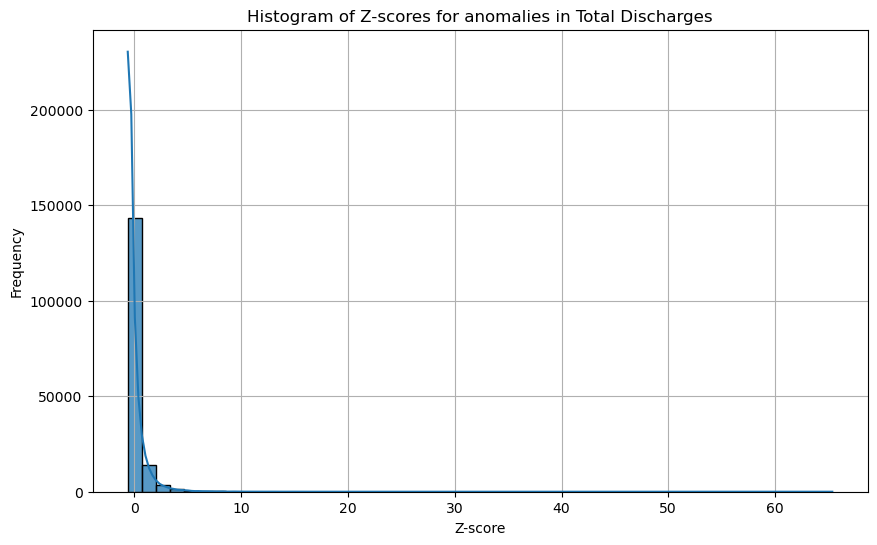

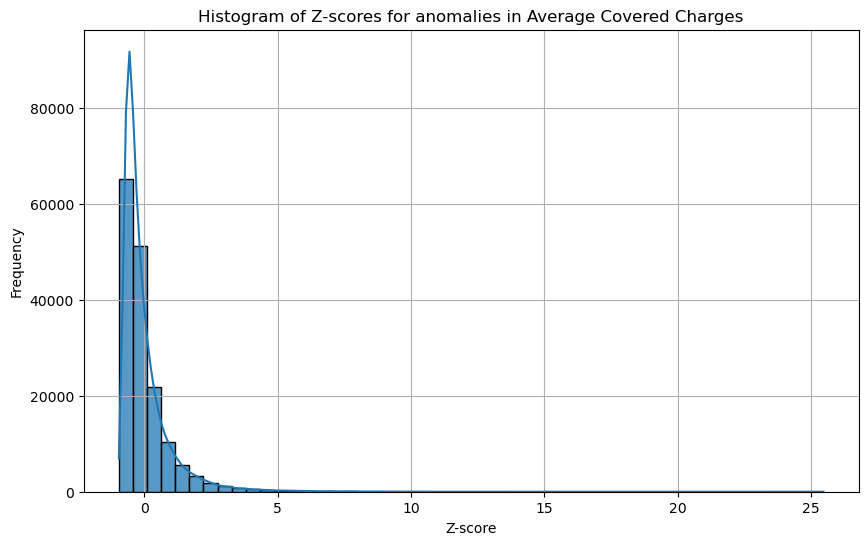

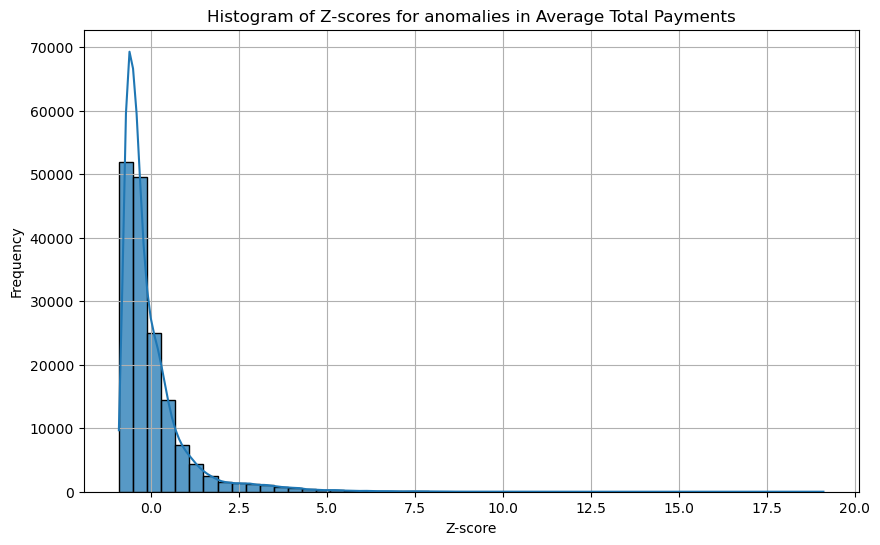

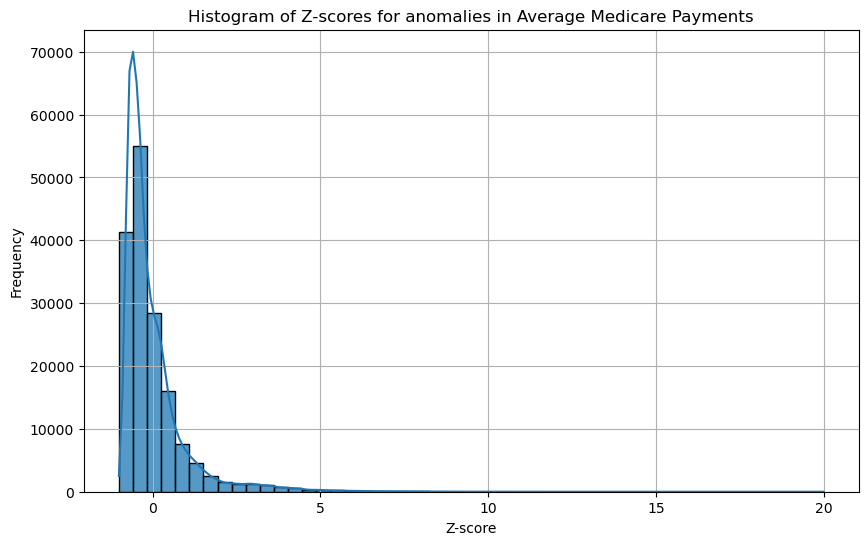

In [44]:
# Plot histograms for Z-scores

for column in columns_for_zscore:
    z_column = 'Z_' + column.replace(' ', '_')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=z_column, bins=50, alpha=0.75, edgecolor='black', kde=True)
    plt.title(f'Histogram of Z-scores for anomalies in {column}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


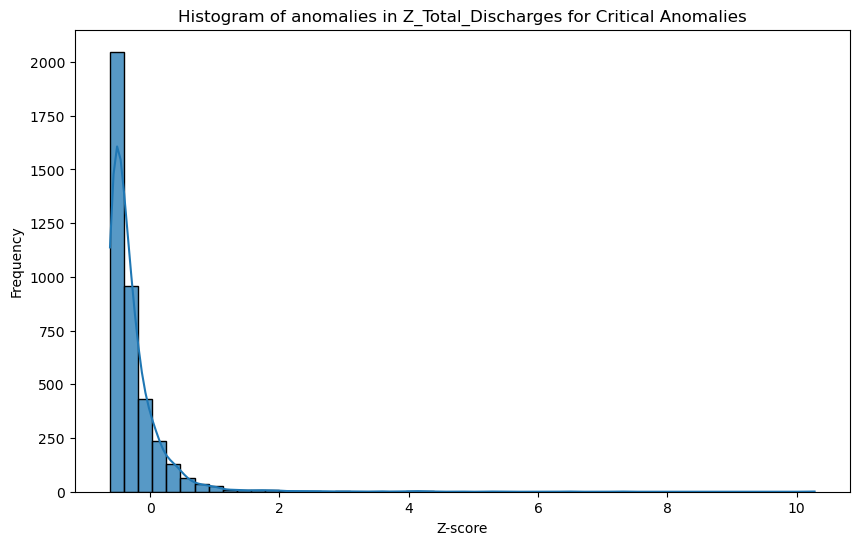

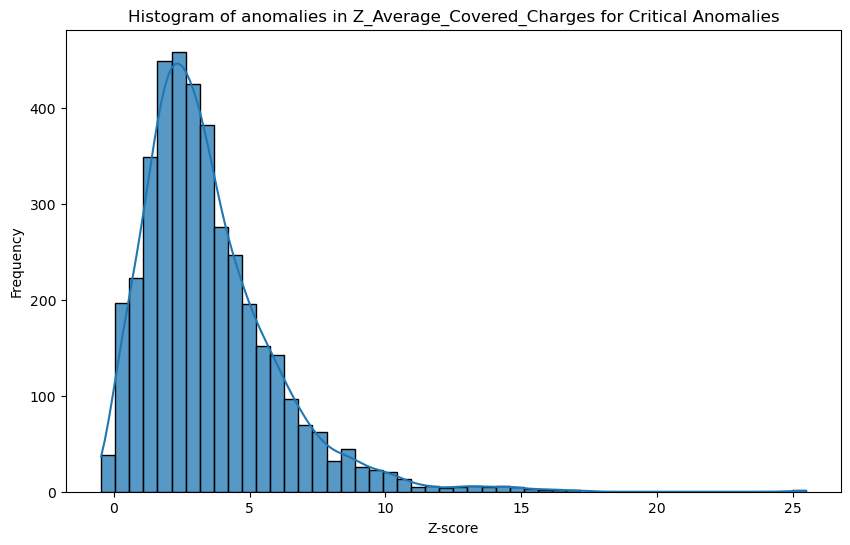

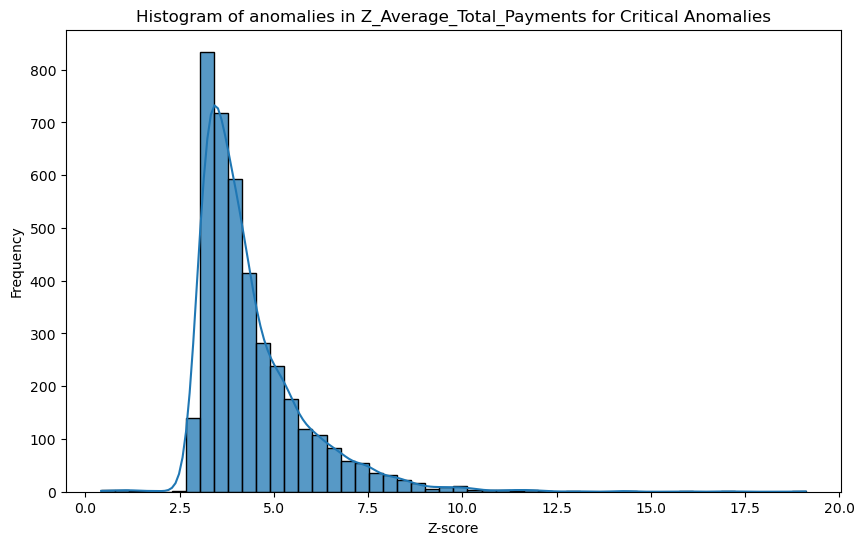

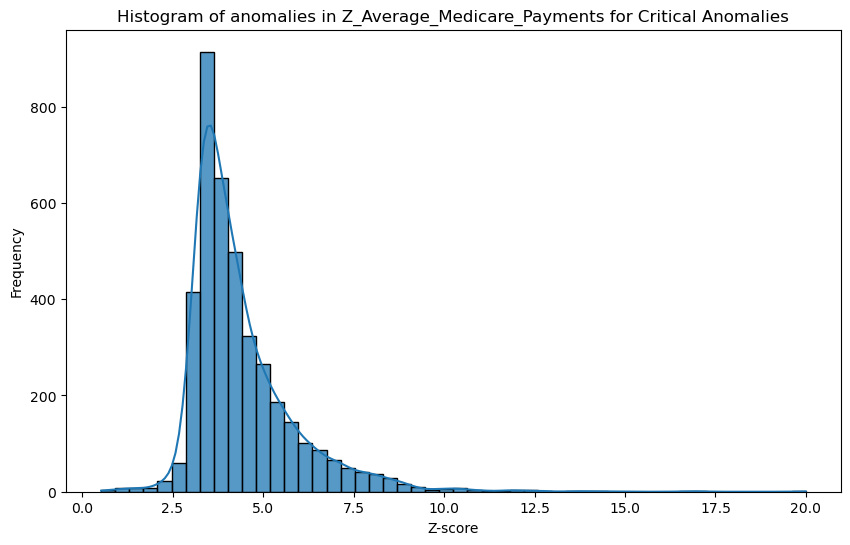

In [45]:
for column in columns_for_zscore:
    z_column = 'Z_' + column.replace(' ', '_')
    plt.figure(figsize=(10, 6))
    sns.histplot(critical_anomalies[z_column], bins=50, alpha=0.75, edgecolor='black', kde=True)
    plt.title(f'Histogram of anomalies in {z_column} for Critical Anomalies')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.show()

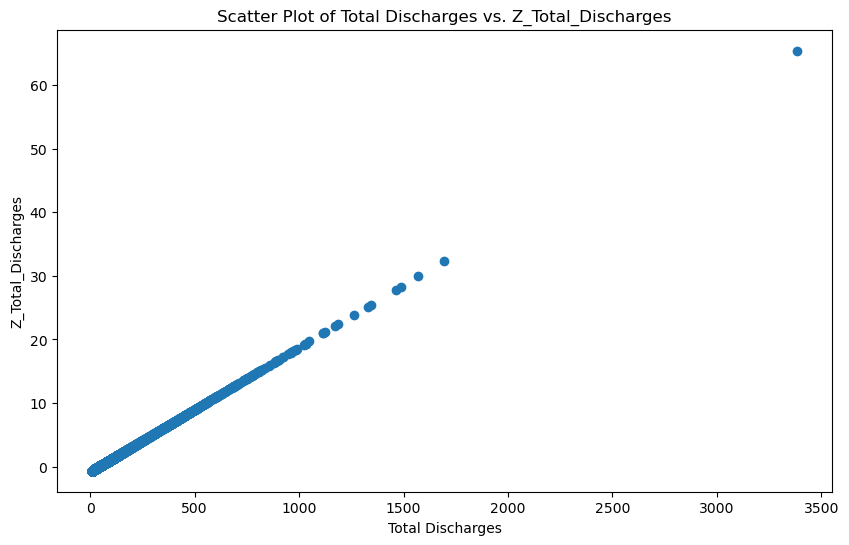

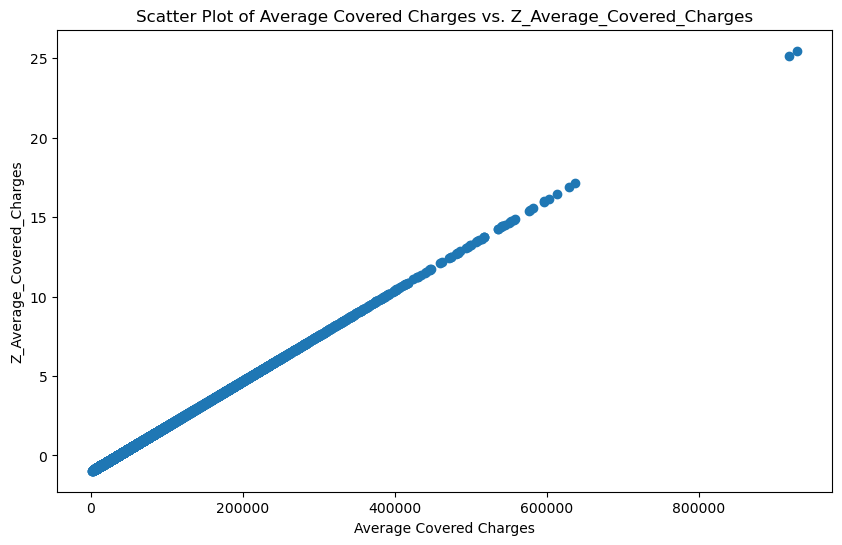

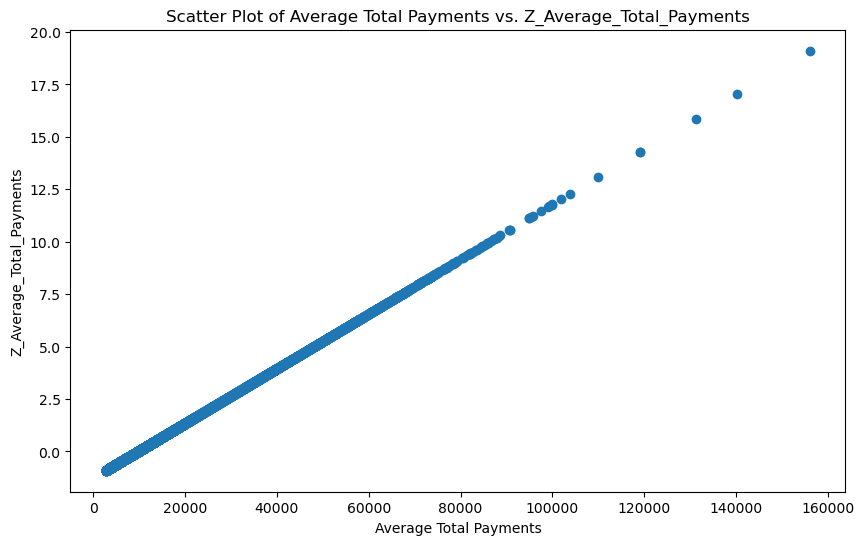

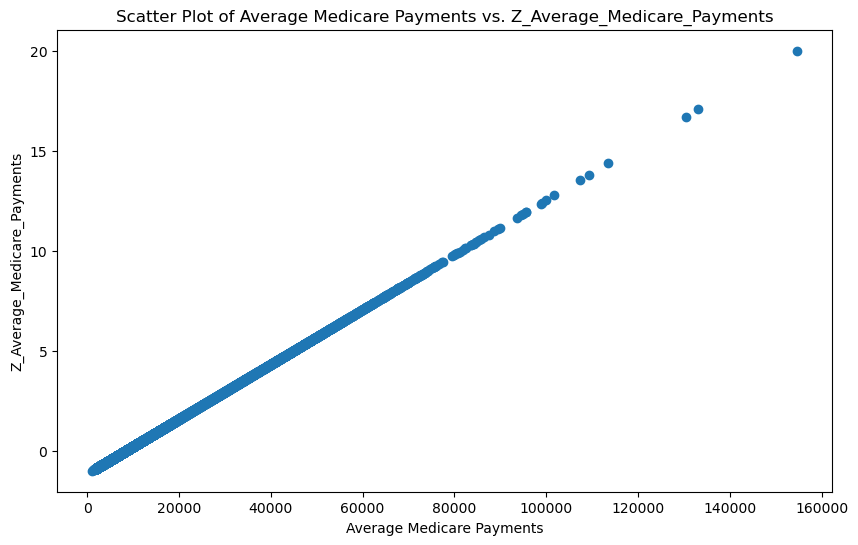

In [46]:
# Scatter plots of original values vs. Z-scores
for column in columns_for_zscore:
    z_column = 'Z_' + column.replace(' ', '_')
    plt.figure(figsize=(10, 6))
    plt.scatter(data[column], data[z_column])
    plt.title(f'Scatter Plot of {column} vs. {z_column}')
    plt.xlabel(column)
    plt.ylabel(z_column)
    plt.show()

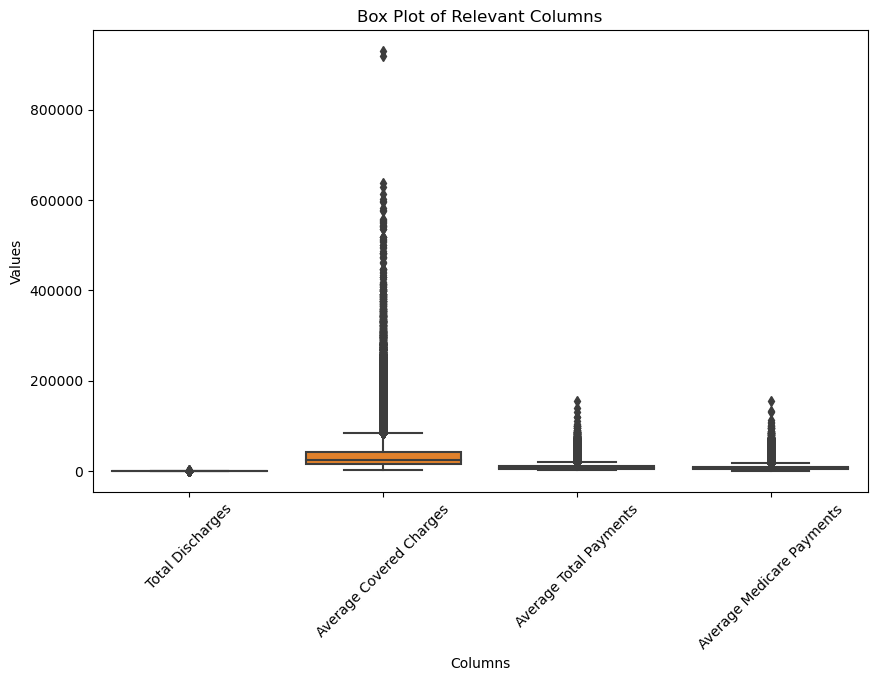

In [47]:
# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[columns_for_zscore])
plt.title('Box Plot of Relevant Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

#### Z-score END

# 

# Interquartile Range (IQR) Method

In [48]:
# Define the function that identifies anomalies using IQR method
def identify_iqr_anomalies(df, column, factor=4):  # Adjusted to be more stringent
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [49]:
# Define the function that identifies anomalies using IQR method
def identify_iqr_anomalies(df, column, factor=4):  # You can adjust the factor to be more or less stringent
    # Calculate Q1, Q3, IQR, lower bound, and upper bound
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Print the calculated values
    print(f"Q1 (25th percentile) for {column}: {Q1}")
    print(f"Q3 (75th percentile) for {column}: {Q3}")
    print(f"IQR for {column}: {IQR}")
    print(f"Lower bound for {column}: {lower_bound}")
    print(f"Upper bound for {column}: {upper_bound}")
    
    # Return the anomalies
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [50]:
# Identify IQR anomalies in each of the relevant columns
columns_for_iqr = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
iqr_anomalies = pd.DataFrame()
for column in columns_for_iqr:
    iqr_anomalies = pd.concat([iqr_anomalies, identify_iqr_anomalies(data, column)])
    

Q1 (25th percentile) for Total Discharges: 17.0
Q3 (75th percentile) for Total Discharges: 49.0
IQR for Total Discharges: 32.0
Lower bound for Total Discharges: -111.0
Upper bound for Total Discharges: 177.0
Q1 (25th percentile) for Average Covered Charges: 15947.16
Q3 (75th percentile) for Average Covered Charges: 43232.59
IQR for Average Covered Charges: 27285.429999999997
Lower bound for Average Covered Charges: -93194.55999999998
Upper bound for Average Covered Charges: 152374.31
Q1 (25th percentile) for Average Total Payments: 5234.5
Q3 (75th percentile) for Average Total Payments: 11286.4
IQR for Average Total Payments: 6051.9
Lower bound for Average Total Payments: -18973.1
Upper bound for Average Total Payments: 35494.0
Q1 (25th percentile) for Average Medicare Payments: 4192.35
Q3 (75th percentile) for Average Medicare Payments: 10056.88
IQR for Average Medicare Payments: 5864.529999999999
Lower bound for Average Medicare Payments: -19265.769999999997
Upper bound for Average M

In [51]:
# Drop duplicates if any anomalies are present in multiple columns
iqr_anomalies = iqr_anomalies.drop_duplicates()

In [52]:
iqr_anomalies_dict = {}
for column in columns_for_iqr:
    iqr_anomalies = 'IQR_' + column.replace(' ', '_')
    iqr_anomalies_dict[column] = identify_iqr_anomalies(data, column)

Q1 (25th percentile) for Total Discharges: 17.0
Q3 (75th percentile) for Total Discharges: 49.0
IQR for Total Discharges: 32.0
Lower bound for Total Discharges: -111.0
Upper bound for Total Discharges: 177.0
Q1 (25th percentile) for Average Covered Charges: 15947.16
Q3 (75th percentile) for Average Covered Charges: 43232.59
IQR for Average Covered Charges: 27285.429999999997
Lower bound for Average Covered Charges: -93194.55999999998
Upper bound for Average Covered Charges: 152374.31
Q1 (25th percentile) for Average Total Payments: 5234.5
Q3 (75th percentile) for Average Total Payments: 11286.4
IQR for Average Total Payments: 6051.9
Lower bound for Average Total Payments: -18973.1
Upper bound for Average Total Payments: 35494.0
Q1 (25th percentile) for Average Medicare Payments: 4192.35
Q3 (75th percentile) for Average Medicare Payments: 10056.88
IQR for Average Medicare Payments: 5864.529999999999
Lower bound for Average Medicare Payments: -19265.769999999997
Upper bound for Average M

In [53]:
# Combine anomalies from all columns
iqr_combined_anomalies = pd.concat(iqr_anomalies_dict.values())

# Total anomalies less duplicates from all columns
iqr_total_anomalies = pd.concat(iqr_anomalies_dict.values()).drop_duplicates()

# Identify duplicates from combined anomalies as duplicate anomalies
iqr_duplicate_anomalies = iqr_combined_anomalies[iqr_combined_anomalies.duplicated(keep=False)]

# Identify duplicates from combined anomalies as critical anomalies
iqr_critical_anomalies = iqr_duplicate_anomalies.drop_duplicates()
    

In [54]:
# Print the contents of iqr_anomalies_dict to verify
print(iqr_anomalies_dict)


{'Total Discharges':                                            DRG Definition  Provider Id  \
394              039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       170186   
1251    057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...       100007   
2295    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10039   
2569    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        80001   
2581    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       100007   
...                                                   ...          ...   
158748  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       330169   
158763  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       330208   
158851  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       360247   
158916  897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...       410004   
161557                     948 - SIGNS & SYMPTOMS W/O MCC       100007   

                                Provider Name      Provider Street Address  \
394         

In [55]:
for column, anomalies in iqr_anomalies_dict.items():
        print(f"Count of anomalies in {column}: {len(anomalies)}")
    
# Display the count of combined anomalies
print(f"Count of combined anomalies: {len(iqr_combined_anomalies)}")
    
# Display the count of duplicate anomalies
print(f"Count of duplicate anomalies: {len(iqr_duplicate_anomalies)}")

# Display the count of total anomalies
print(f"Count of total anomalies: {len(iqr_total_anomalies)}")    

# Display the count of critical anomalies - any item that occured more than once accross different columns
print(f"Count of critical anomalies: {len(iqr_critical_anomalies)}")

Count of anomalies in Total Discharges: 3587
Count of anomalies in Average Covered Charges: 2522
Count of anomalies in Average Total Payments: 3184
Count of anomalies in Average Medicare Payments: 3044
Count of combined anomalies: 12337
Count of duplicate anomalies: 7327
Count of total anomalies: 8017
Count of critical anomalies: 3007


In [56]:
# Export duplicate anomalies to CSV
iqr_duplicate_anomalies_file_path = r'C:/Users/Dell/Downloads/iqr_duplicate_anomalies.csv'
iqr_duplicate_anomalies.to_csv(iqr_duplicate_anomalies_file_path, index=False)
print(f"iqr duplicate anomalies exported to {iqr_duplicate_anomalies_file_path}")

iqr duplicate anomalies exported to C:/Users/Dell/Downloads/iqr_duplicate_anomalies.csv


In [57]:
# Export total anomalies to CSV
iqr_total_anomalies_file_path = r'C:/Users/Dell/Downloads/iqr_total_anomalies.csv'
iqr_total_anomalies.to_csv(iqr_total_anomalies_file_path, index=False)
print(f"iqr total anomalies exported to {iqr_total_anomalies_file_path}")

iqr total anomalies exported to C:/Users/Dell/Downloads/iqr_total_anomalies.csv


In [58]:
# Export critical anomalies to CSV
iqr_critical_anomalies_file_path = r'C:/Users/Dell/Downloads/iqr_critical_anomalies.csv'
iqr_critical_anomalies.to_csv(iqr_critical_anomalies_file_path, index=False)
print(f"iqr critical anomalies exported to {iqr_critical_anomalies_file_path}")

iqr critical anomalies exported to C:/Users/Dell/Downloads/iqr_critical_anomalies.csv


In [59]:
# Export combined anomalies to CSV
iqr_combined_anomalies_file_path = r'C:/Users/Dell/Downloads/iqr_combined_anomalies.csv'
iqr_combined_anomalies.to_csv(iqr_combined_anomalies_file_path, index=False)
print(f"iqr critical anomalies exported to {iqr_combined_anomalies_file_path}")

iqr critical anomalies exported to C:/Users/Dell/Downloads/iqr_combined_anomalies.csv


In [60]:
# Print and export individual anomalies to CSV files
for column, anomalies in anomalies_dict.items():
    print(f"IQR Anomalies in {column}:")
    #print(anomalies)
    anomalies.to_csv(f'C:/Users/Dell/Downloads/iqr_anomalies_{column}.csv', index=False)

print("Anomalies exported to CSV files.")
df = pd.DataFrame(anomalies)

df

IQR Anomalies in Total Discharges:
IQR Anomalies in Average Covered Charges:
IQR Anomalies in Average Total Payments:
IQR Anomalies in Average Medicare Payments:
Anomalies exported to CSV files.


DRG Definition  Provider Id  \
2428    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50228   
2461    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        50348   
2992    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       210009   
3354    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       330196   
15106   177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...        50262   
...                                                   ...          ...   
152539  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50373   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
152625  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50696   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153985  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330234   

                                     Provider Name  Provider Street Address  \
2428                SAN FRANCISCO GENERAL HOSPITAL      1001 POTRERO AVENUE   
2461    UNIVERSITY OF CALIFORNIA IRVINE MED CENTER     101 CITY DRIVE SOUTH   
2992                   JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
3354                         CONEY ISLAND HOSPITAL       2601 OCEAN PARKWAY   
15106            RONALD REAGAN UCLA MEDICAL CENTER       757 WESTWOOD PLAZA   
...                                            ...                      ...   
152539                      LAC+USC MEDICAL CENTER          1200 N STATE ST   
152583                 MEMORIAL HOSPITAL LOS BANOS            520 WEST I ST   
152625                        KECK HOSPITAL OF USC        1500 SAN PABLO ST   
153397                 JOHNS HOPKINS HOSPITAL, THE  600 NORTH  WOLFE STREET   
153985                  WESTCHESTER MEDICAL CENTER             100 WOODS RD   

        Provider City Provider State  Provider Zip Code  \
2428    SAN FRANCISCO             CA              94110   
2461           ORANGE             CA              92868   
2992        BALTIMORE             MD              21287   
3354         BROOKLYN             NY              11235   
15106     LOS ANGELES             CA              90095   
...               ...            ...                ...   
152539    LOS ANGELES             CA              90033   
152583      LOS BANOS             CA              93635   
152625    LOS ANGELES             CA              90033   
153397      BALTIMORE             MD              21287   
153985       VALHALLA             NY              10595   

       Hospital Referral Region Description  Total Discharges  \
2428                     CA - San Francisco                19   
2461                     CA - Orange County                26   
2992                         MD - Baltimore                64   
3354                         NY - Manhattan                41   
15106                      CA - Los Angeles                31   
...                                     ...               ...   
152539                     CA - Los Angeles                18   
152583                         CA - Modesto                13   
152625                     CA - Los Angeles                21   
153397                       MD - Baltimore                97   
153985                    NY - White Plains                44   

        Average Covered Charges  Average Total Payments  \
2428                  158080.21                35275.57   
2461                  199228.53                33918.23   
2992                   54052.21                50882.40   
3354                   47567.85                33598.31   
15106                 123029.03                33360.03   
...                         ...                     ...   
152539                129322.27                33244.94   
152583                 69103.15                39366.23   
152625                216438.28                35090.66   
153397                 46747.09                44003.90   
153985                133997.27                33054.84   

      

In [61]:
# Display combined anomalies
print('IQR Combined Anomalies:')
#print(iqr_combined_anomalies)
df = pd.DataFrame(iqr_combined_anomalies)

df

IQR Combined Anomalies:


DRG Definition  Provider Id  \
394              039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       170186   
1251    057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...       100007   
2295    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10039   
2569    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        80001   
2581    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       100007   
...                                                   ...          ...   
152213   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       520138   
152215   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       520177   
152502  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50276   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   

                                Provider Name     Provider Street Address  \
394                     KANSAS HEART HOSPITAL        3601 NORTH WEBB ROAD   
1251                         FLORIDA HOSPITAL            601 E ROLLINS ST   
2295                      HUNTSVILLE HOSPITAL               101 SIVLEY RD   
2569    CHRISTIANA CARE HEALTH SERVICES, INC.  4755 OGLETOWN-STANTON ROAD   
2581                         FLORIDA HOSPITAL            601 E ROLLINS ST   
...                                       ...                         ...   
152213         AURORA ST LUKES MEDICAL CENTER         2900 W OKLAHOMA AVE   
152215           FROEDTERT MEM LUTHERAN HSPTL        9200 W WISCONSIN AVE   
152502   CONTRA COSTA REGIONAL MEDICAL CENTER           2500 ALHAMBRA AVE   
152583            MEMORIAL HOSPITAL LOS BANOS               520 WEST I ST   
153397            JOHNS HOPKINS HOSPITAL, THE     600 NORTH  WOLFE STREET   

       Provider City Provider State  Provider Zip Code  \
394          WICHITA             KS              67226   
1251         ORLANDO             FL              32803   
2295      HUNTSVILLE             AL              35801   
2569          NEWARK             DE              19718   
2581         ORLANDO             FL              32803   
...              ...            ...                ...   
152213     MILWAUKEE             WI              53215   
152215     MILWAUKEE             WI              53226   
152502      MARTINEZ             CA              94553   
152583     LOS BANOS             CA              93635   
153397     BALTIMORE             MD              21287   

       Hospital Referral Region Description  Total Discharges  \
394                            KS - Wichita               190   
1251                           FL - Orlando               224   
2295                        AL - Huntsville               178   
2569                        DE - Wilmington               192   
2581                           FL - Orlando               180   
...                                     ...               ...   
152213                       WI - Milwaukee                44   
152215                       WI - Milwaukee                22   
152502             CA - Contra Costa County                22   
152583                         CA - Modesto                13   
153397                       MD - Baltimore                97   

        Average Covered Charges  Average Total Payments  \
394                    11746.63                 5332.51   
1251                   26941.47                 6077.88   
2295                   52699.69                11501.20   
2569                   27221.98                14413.58   
2581                   69499.64                13645.76   
...                         ...                     ...   
152213                151329.84                41933.93   
152215                104314.13                51988.50   
152502                 81323.09                37267.90   
152583                 69103.15                39366.23   
153397                 46747.09                44003.90   

        Average Medicare Payments  Z_Total

In [62]:
# Display duplicate anomalies
print('IQR Duplicate Anomalies:')
#print(iqr_duplicate_anomalies)
df = pd.DataFrame(iqr_duplicate_anomalies)

df


IQR Duplicate Anomalies:


DRG Definition  Provider Id  \
49756   251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY...       390111   
109043        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC        30023   
109192        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC        60112   
109224        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       100007   
109824        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       330214   
...                                                   ...          ...   
152213   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       520138   
152215   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       520177   
152502  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50276   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   

                               Provider Name   Provider Street Address  \
49756       HOSPITAL OF UNIV OF PENNSYLVANIA         34TH & SPRUCE STS   
109043              FLAGSTAFF MEDICAL CENTER  1200 NORTH BEAVER STREET   
109192              SKY RIDGE MEDICAL CENTER  10101 RIDGE GATE PARKWAY   
109224                      FLORIDA HOSPITAL          601 E ROLLINS ST   
109824                  NYU HOSPITALS CENTER          550 FIRST AVENUE   
...                                      ...                       ...   
152213        AURORA ST LUKES MEDICAL CENTER       2900 W OKLAHOMA AVE   
152215          FROEDTERT MEM LUTHERAN HSPTL      9200 W WISCONSIN AVE   
152502  CONTRA COSTA REGIONAL MEDICAL CENTER         2500 ALHAMBRA AVE   
152583           MEMORIAL HOSPITAL LOS BANOS             520 WEST I ST   
153397           JOHNS HOPKINS HOSPITAL, THE   600 NORTH  WOLFE STREET   

       Provider City Provider State  Provider Zip Code  \
49756   PHILADELPHIA             PA              19104   
109043     FLAGSTAFF             AZ              86001   
109192     LONE TREE             CO              80124   
109224       ORLANDO             FL              32803   
109824      NEW YORK             NY              10016   
...              ...            ...                ...   
152213     MILWAUKEE             WI              53215   
152215     MILWAUKEE             WI              53226   
152502      MARTINEZ             CA              94553   
152583     LOS BANOS             CA              93635   
153397     BALTIMORE             MD              21287   

       Hospital Referral Region Description  Total Discharges  \
49756                     PA - Philadelphia               248   
109043                         AZ - Phoenix               185   
109192                          CO - Denver               180   
109224                         FL - Orlando               267   
109824                       NY - Manhattan               195   
...                                     ...               ...   
152213                       WI - Milwaukee                44   
152215                       WI - Milwaukee                22   
152502             CA - Contra Costa County                22   
152583                         CA - Modesto                13   
153397                       MD - Baltimore                97   

        Average Covered Charges  Average Total Payments  \
49756                 172985.65                18467.52   
109043                 64503.50                40747.35   
109192                169734.66                26310.30   
109224                173599.71                31931.83   
109824                122866.07                38881.06   
...                         ...                     ...   
152213                151329.84                41933.93   
152215                104314.13                51988.50   
152502                 81323.09                37267.90   
152583                 69103.15                39366.23   
153397                 46747.09                44003.90   

        Average Medicare Payments  Z_Total_Discharges  \
49756                

In [63]:
# Display the count of total anomalies
print('IQR Total Anomalies:')
#print(iqr_total_anomalies)
df = pd.DataFrame(iqr_total_anomalies)

df

IQR Total Anomalies:


DRG Definition  Provider Id  \
394              039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       170186   
1251    057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...       100007   
2295    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        10039   
2569    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...        80001   
2581    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       100007   
...                                                   ...          ...   
152084   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       440161   
152109   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       450097   
152125   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       450280   
152167   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       490011   
152179   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       490057   

                                  Provider Name     Provider Street Address  \
394                       KANSAS HEART HOSPITAL        3601 NORTH WEBB ROAD   
1251                           FLORIDA HOSPITAL            601 E ROLLINS ST   
2295                        HUNTSVILLE HOSPITAL               101 SIVLEY RD   
2569      CHRISTIANA CARE HEALTH SERVICES, INC.  4755 OGLETOWN-STANTON ROAD   
2581                           FLORIDA HOSPITAL            601 E ROLLINS ST   
...                                         ...                         ...   
152084                CENTENNIAL MEDICAL CENTER       2300 PATTERSON STREET   
152109                  BAYSHORE MEDICAL CENTER            4000 SPENCER HWY   
152125         BAYLOR MEDICAL CENTER AT GARLAND      2300 MARIE CURIE DRIVE   
152167      BON SECOURS - DEPAUL MEDICAL CENTER           150 KINGSLEY LANE   
152179  SENTARA VIRGINIA BEACH GENERAL HOSPITAL    1060 FIRST COLONIAL ROAD   

         Provider City Provider State  Provider Zip Code  \
394            WICHITA             KS              67226   
1251           ORLANDO             FL              32803   
2295        HUNTSVILLE             AL              35801   
2569            NEWARK             DE              19718   
2581           ORLANDO             FL              32803   
...                ...            ...                ...   
152084       NASHVILLE             TN              37203   
152109        PASADENA             TX              77504   
152125         GARLAND             TX              75042   
152167         NORFOLK             VA              23505   
152179  VIRGINIA BEACH             VA              23454   

       Hospital Referral Region Description  Total Discharges  \
394                            KS - Wichita               190   
1251                           FL - Orlando               224   
2295                        AL - Huntsville               178   
2569                        DE - Wilmington               192   
2581                           FL - Orlando               180   
...                                     ...               ...   
152084                       TN - Nashville                14   
152109                         TX - Houston                34   
152125                          TX - Dallas                12   
152167                         VA - Norfolk                16   
152179                         VA - Norfolk                16   

        Average Covered Charges  Average Total Payments  \
394                    11746.63                 5332.51   
1251                   26941.47                 6077.88   
2295                   52699.69                11501.20   
2569                   27221.98                14413.58   
2581                   69499.64                13645.76   
...                         ...                     ...   
152084                151102.64                34265.78   
152109                152228.61                34891.02   
152125                 95335.16                34993.75   
152167                 79578.93                35491.31   
152179                144214.62                34992.1

In [64]:
# Display critical anomalies - any item that occured more than once accross different columns
print('IQR Critical Anomalies:')
#print(iqr_critical_anomalies)
df = pd.DataFrame(iqr_critical_anomalies)

df

IQR Critical Anomalies:


DRG Definition  Provider Id  \
49756   251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY...       390111   
109043        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC        30023   
109192        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC        60112   
109224        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       100007   
109824        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       330214   
...                                                   ...          ...   
152213   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       520138   
152215   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       520177   
152502  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50276   
152583  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...        50528   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   

                               Provider Name   Provider Street Address  \
49756       HOSPITAL OF UNIV OF PENNSYLVANIA         34TH & SPRUCE STS   
109043              FLAGSTAFF MEDICAL CENTER  1200 NORTH BEAVER STREET   
109192              SKY RIDGE MEDICAL CENTER  10101 RIDGE GATE PARKWAY   
109224                      FLORIDA HOSPITAL          601 E ROLLINS ST   
109824                  NYU HOSPITALS CENTER          550 FIRST AVENUE   
...                                      ...                       ...   
152213        AURORA ST LUKES MEDICAL CENTER       2900 W OKLAHOMA AVE   
152215          FROEDTERT MEM LUTHERAN HSPTL      9200 W WISCONSIN AVE   
152502  CONTRA COSTA REGIONAL MEDICAL CENTER         2500 ALHAMBRA AVE   
152583           MEMORIAL HOSPITAL LOS BANOS             520 WEST I ST   
153397           JOHNS HOPKINS HOSPITAL, THE   600 NORTH  WOLFE STREET   

       Provider City Provider State  Provider Zip Code  \
49756   PHILADELPHIA             PA              19104   
109043     FLAGSTAFF             AZ              86001   
109192     LONE TREE             CO              80124   
109224       ORLANDO             FL              32803   
109824      NEW YORK             NY              10016   
...              ...            ...                ...   
152213     MILWAUKEE             WI              53215   
152215     MILWAUKEE             WI              53226   
152502      MARTINEZ             CA              94553   
152583     LOS BANOS             CA              93635   
153397     BALTIMORE             MD              21287   

       Hospital Referral Region Description  Total Discharges  \
49756                     PA - Philadelphia               248   
109043                         AZ - Phoenix               185   
109192                          CO - Denver               180   
109224                         FL - Orlando               267   
109824                       NY - Manhattan               195   
...                                     ...               ...   
152213                       WI - Milwaukee                44   
152215                       WI - Milwaukee                22   
152502             CA - Contra Costa County                22   
152583                         CA - Modesto                13   
153397                       MD - Baltimore                97   

        Average Covered Charges  Average Total Payments  \
49756                 172985.65                18467.52   
109043                 64503.50                40747.35   
109192                169734.66                26310.30   
109224                173599.71                31931.83   
109824                122866.07                38881.06   
...                         ...                     ...   
152213                151329.84                41933.93   
152215                104314.13                51988.50   
152502                 81323.09                37267.90   
152583                 69103.15                39366.23   
153397                 46747.09                44003.90   

        Average Medicare Payments  Z_Total_Discharges  \
49756                

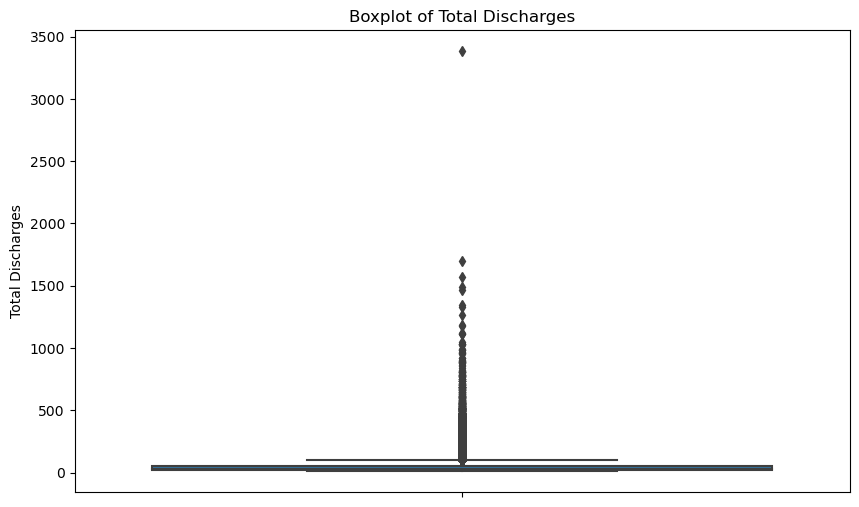

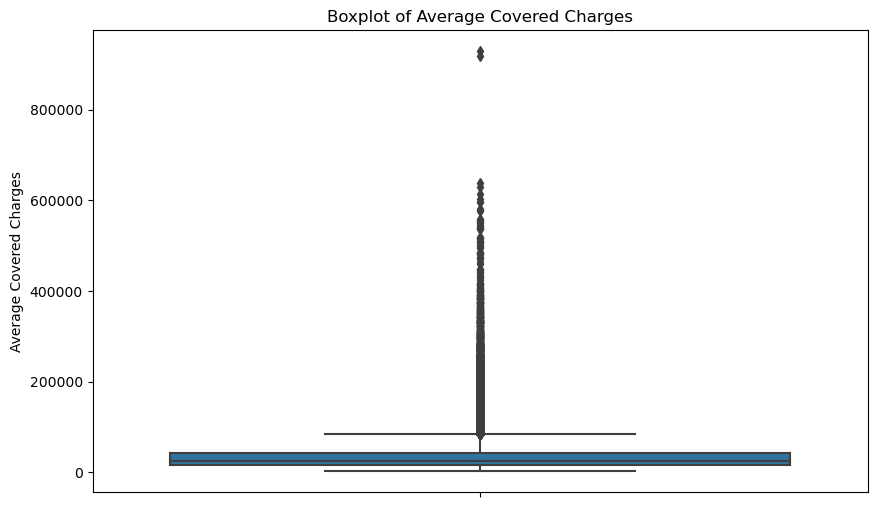

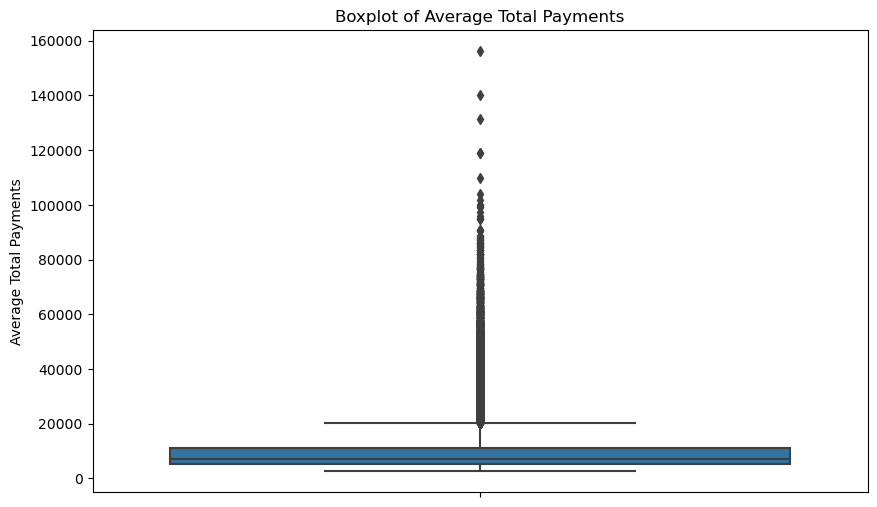

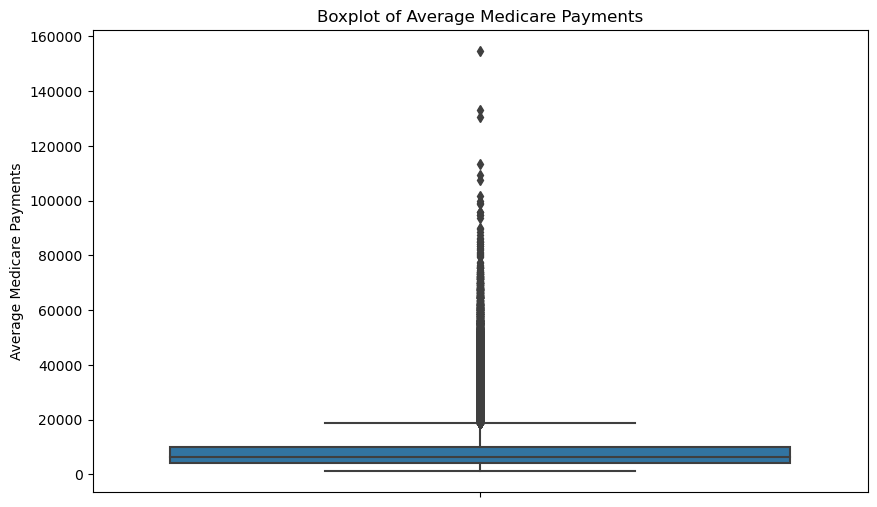

In [65]:
# Visualize IQR using boxplots
for column in columns_for_iqr:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

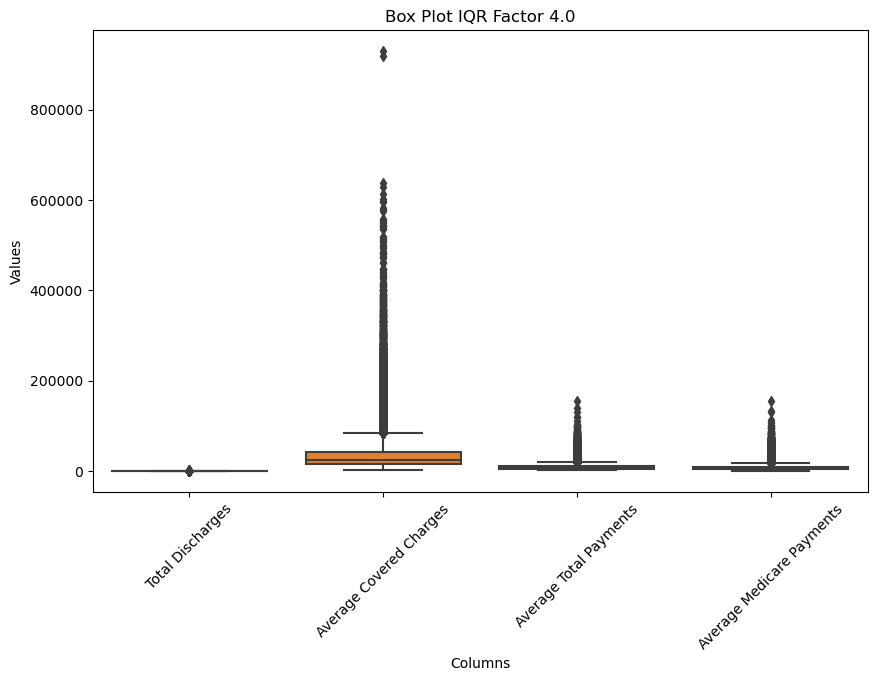

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[columns_for_iqr])
plt.title('Box Plot IQR Factor 4.0')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

#### IQR END

# 

# Machine Learning Algorithms and Analysis

#### Imports required

In [67]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParam['figure.figsize'] = (10,6)
import seaborn as sns
import time

## One Class SVM Method

In [68]:
file_path = r"C:\Users\Dell\Downloads\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv"

In [69]:
# Load the dataset
data = pd.read_csv(file_path)

In [70]:
# Count of Rows and columns in dataset
print(data.shape)

(163065, 12)


In [71]:
def load_and_preprocess_data(file_path, columns_to_clean, columns_for_ocsvm):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        data.columns = data.columns.str.strip()

        # Ensure columns are in the dataset
        missing_columns = [col for col in columns_to_clean + columns_for_ocsvm if col not in data.columns]
        if missing_columns:
            raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

        # Handle missing values
        data = data.dropna(subset=columns_to_clean + columns_for_ocsvm)

        # Clean specified columns
        for column in columns_to_clean:
            data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)
        
        return data
    
    except Exception as e:
        print(f"Error loading or preprocessing data: {e}")
        return None

In [72]:
# View the column headers
#print(data.head)
df = pd.DataFrame(data)

df

DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2                        ELIZA COFFEE MEMORIAL HOSPITAL   
3                                     ST VINCENT'S EAST   
4                         SHELBY BAPTIST MEDICAL CENTER   
...                                                 ...   
163060                  SETON MEDICAL CENTER WILLIAMSON   
163061                     METHODIST STONE OAK HOSPITAL   
163062                        SETON MEDICAL CENTER HAYS   
163063       TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE   
163064  TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND   

           Provider Street Address Provider City Provider State  \
0           1108 ROSS CLARK CIRCLE        DOTHAN             AL   
1       2505 U S HIGHWAY 431 NORTH          BOAZ             AL   
2               205 MARENGO STREET      FLORENCE             AL   
3       50 MEDICAL PARK EAST DRIVE    BIRMINGHAM             AL   
4          1000 FIRST STREET NORTH     ALABASTER             AL   
...                            ...           ...            ...   
163060           201 SETON PARKWAY    ROUND ROCK             TX   
163061        1139 E SONTERRA BLVD   SAN ANTONIO             TX   
163062              6001 KYLE PKWY          KYLE             TX   
163063      231 SOUTH COLLINS ROAD     SUNNYVALE             TX   
163064      4400 LONG PRAIRIE ROAD  FLOWER MOUND             TX   

        Provider Zip Code Hospital Referral Region Description  \
0                   36301                          AL - Dothan   
1                   35957                      AL - Birmingham   
2                   35631                      AL - Birmingham   
3                   35235                      AL - Birmingham   
4                   35007                      AL - Birmingham   
...                   ...                                  ...   
163060              78664                          TX - Austin   
163061              78258                     TX - San Antonio   
163062              78640                          TX - Austin   
163063              75182                          TX - Dallas   
163064              75028                          TX - Dallas   

         Total Discharges   Average Covered Charges   Average Total Payments   \
0                       91                 $32963.07                 $5777.24   
1                       14                 $15131.85                 $5787.57   
2                       24                 $37560.37                 $5434.95   
3                       25                 $13998.28                 $5417.56   
4                       18                 $31633.27                 $5658.33   
...                    ...                       ...                      ...   
163060                  23                 $26314.39                 $3806.86   
163061                  11                 $21704.72                 $4027.36   
163062                  19                 $39121.73                 $5704.36   
163063                  11                 $28873.09                 $7663.09   
163064                  12                 $15042.00   

In [73]:
# Remove leading and trailing whitespace from column names
data.columns = data.columns.str.strip()

In [74]:
# View column headers after stripping
print("Column names after stripping whitespace:")
#print(data.columns)
df = pd.DataFrame(data.columns)

df

Column names after stripping whitespace:


0
0                         DRG Definition
1                            Provider Id
2                          Provider Name
3                Provider Street Address
4                          Provider City
5                         Provider State
6                      Provider Zip Code
7   Hospital Referral Region Description
8                       Total Discharges
9                Average Covered Charges
10                Average Total Payments
11             Average Medicare Payments

In [75]:
# View data type of each column
print(data.dtypes)

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
Total Discharges                         int64
Average Covered Charges                 object
Average Total Payments                  object
Average Medicare Payments               object
dtype: object


In [76]:
# Check for missing values in data
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
dtype: int64


In [77]:
# Clean specified columns (remove dollar signs and commas, then convert to float)
columns_to_clean = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
for column in columns_to_clean:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

In [78]:
# Shows the statistical summary of uploaded data
print("Summary of cleaned columns:")
#print(data[columns_to_clean].describe())
df = pd.DataFrame(data[columns_to_clean].describe())

df

Summary of cleaned columns:


Average Covered Charges  Average Total Payments  \
count            163065.000000           163065.000000   
mean              36133.954224             9707.473804   
std               35065.365931             7664.642598   
min                2459.400000             2673.000000   
25%               15947.160000             5234.500000   
50%               25245.820000             7214.100000   
75%               43232.590000            11286.400000   
max              929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000

In [79]:
columns_for_ocsvm = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

In [80]:
# Shows the statistical summary of uploaded data
print("Summary of columns:")
#print(data[columns_for_ocsvm].describe())
df = pd.DataFrame(data[columns_for_ocsvm].describe())

df

Summary of columns:


Total Discharges  Average Covered Charges  Average Total Payments  \
count     163065.000000            163065.000000           163065.000000   
mean          42.776304             36133.954224             9707.473804   
std           51.104042             35065.365931             7664.642598   
min           11.000000              2459.400000             2673.000000   
25%           17.000000             15947.160000             5234.500000   
50%           27.000000             25245.820000             7214.100000   
75%           49.000000             43232.590000            11286.400000   
max         3383.000000            929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000

In [81]:
print(data.shape)

(163065, 12)


In [82]:
def load_and_preprocess_data(file_path, columns_to_clean, columns_for_ocsvm):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")
        
        # Strip whitespace from column names
        data.columns = data.columns.str.strip()

        # Print column names to verify
        print("Columns in the raw data:")
        print(data.columns)

        # Check if all required columns are present
        missing_columns = [col for col in columns_to_clean + columns_for_ocsvm if col not in data.columns]
        if missing_columns:
            raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

        # Drop rows with missing values in relevant columns
        data = data.dropna(subset=columns_to_clean + columns_for_ocsvm)

        # Clean specified columns
        for column in columns_to_clean:
            if column in data.columns:
                # Print column data type before cleaning
                print(f"Column '{column}' data type before cleaning: {data[column].dtype}")
                data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)
                # Print column data type after cleaning
                print(f"Column '{column}' data type after cleaning: {data[column].dtype}")
            else:
                print(f"Column '{column}' not found in data.")

        return data
    
    except ValueError as e:
        print(f"ValueError: {e}")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: The file could not be parsed. Check the file format.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    
    return None

In [83]:
data = load_and_preprocess_data(file_path, columns_to_clean, columns_for_ocsvm)


Data loaded successfully.
Columns in the raw data:
Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')
Column 'Average Covered Charges' data type before cleaning: object
Column 'Average Covered Charges' data type after cleaning: float64
Column 'Average Total Payments' data type before cleaning: object
Column 'Average Total Payments' data type after cleaning: float64
Column 'Average Medicare Payments' data type before cleaning: object
Column 'Average Medicare Payments' data type after cleaning: float64


In [84]:
print(data.shape)

(163065, 12)


In [85]:
def apply_ocsvm(data, columns_for_ocsvm, kernel='rbf', nu=0.01, gamma='scale'):
    """
    Apply the One-Class SVM (OCSVM) method to identify anomalies.

    Parameters:
        data (DataFrame): The preprocessed DataFrame.
        columns_for_ocsvm (list): List of numerical column names for OCSVM calculation.
        kernel (str): Kernel type used in the algorithm.
        nu (float): An upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors.
        gamma (str or float): Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.

    Returns:
        DataFrame: DataFrame containing the anomalies.
    """
    ocsvm = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma)
    # Fit the model
    ocsvm.fit(data[columns_for_ocsvm])
    # Predict anomalies
    data['OCSVM_Prediction'] = ocsvm.predict(data[columns_for_ocsvm])
    # Anomalies are labeled as -1
    anomalies = data[data['OCSVM_Prediction'] == -1]

    return anomalies


In [86]:
print(data.shape)

(163065, 12)


In [87]:
# Apply OCSVM to identify anomalies
kernel = 'rbf'  
nu = 0.01 
gamma = 'scale'  
#anomalies = apply_ocsvm(data, columns_for_ocsvm, kernel, nu, gamma)

In [88]:
ocsvm_anomalies = apply_ocsvm(data, columns_for_ocsvm, kernel, nu, gamma)

In [89]:
# Output the count of anomalies
#print(ocsvm_anomalies)
df = pd.DataFrame(ocsvm_anomalies)

df

DRG Definition  Provider Id  \
9       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10040   
22      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10139   
123     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        50599   
230     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       100242   
236     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       100256   
...                                          ...          ...   
161373            948 - SIGNS & SYMPTOMS W/O MCC        40011   
161545            948 - SIGNS & SYMPTOMS W/O MCC        70039   
162297            948 - SIGNS & SYMPTOMS W/O MCC       310028   
162660            948 - SIGNS & SYMPTOMS W/O MCC       390081   
162713            948 - SIGNS & SYMPTOMS W/O MCC       390312   

                                        Provider Name  \
9                     GADSDEN REGIONAL MEDICAL CENTER   
22                           BROOKWOOD MEDICAL CENTER   
123     UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER   
230                         GULF COAST MEDICAL CENTER   
236             REGIONAL MEDICAL CENTER BAYONET POINT   
...                                               ...   
161373                 JOHN ED CHAMBERS MEM HOSP, INC   
161545                      MASONIC HOME AND HOSPITAL   
162297                       NEWTON MEMORIAL HOSPITAL   
162660              DELAWARE COUNTY MEMORIAL HOSPITAL   
162713            CANCER TREATMENT CENTERS OF AMERICA   

                    Provider Street Address Provider City Provider State  \
9                      1007 GOODYEAR AVENUE       GADSDEN             AL   
22      2010 BROOKWOOD MEDICAL CENTER DRIVE    BIRMINGHAM             AL   
123                 2315 STOCKTON BOULEVARD    SACRAMENTO             CA   
230                           449 W 23RD ST   PANAMA CITY             FL   
236                        14000 FIVAY ROAD        HUDSON             FL   
...                                     ...           ...            ...   
161373         HIGHWAY 10 AT DETROIT STREET      DANVILLE             AR   
161545                       22 MASONIC AVE   WALLINGFORD             CT   
162297                          175 HIGH ST        NEWTON             NJ   
162660              501 NORTH LANSDOWNE AVE   DREXEL HILL             PA   
162713             1331 EAST WYOMING AVENUE  PHILADELPHIA             PA   

        Provider Zip Code Hospital Referral Region Description  \
9                   35903                      AL - Birmingham   
22                  35209                      AL - Birmingham   
123                 95817                      CA - Sacramento   
230                 32405                     FL - Panama City   
236                 34667                          FL - Hudson   
...                   ...                                  ...   
161373              72833                     AR - Little Rock   
161545               6492                       CT - New Haven   
162297               7860                      NJ - Morristown   
162660              19026                    PA - Philadelphia   
162713              19124                    PA - Philadelphia   

        Total Discharges  Average Covered Charges  Average Total Payments  \
9                     34                 75233.38                 5541.05   
22                    19                 73846.21                 4987.26   
123                   13                146892.00                11514.38   
230                   22                 82456.95                 5910.45   
236                   20                 76289.30                 5364.10   
...                  ...                      ...                     ...   
161373                15                  3484.86                 3498.13   
161545                45                  3884.28                 4446.17   
162297                17                 57676.64                 4523.94   
162660                19                 78048.31                 5238.63   
162713         

In [90]:
# Output the count of anomalies
print(f"Count of anomalies: {len(anomalies)}")

Count of anomalies: 4150


In [91]:
start_time = time.time()

In [92]:
ocsvm_time = time.time() - start_time

In [93]:
print(f"Time taken for OCSVM: {ocsvm_time:.2f} seconds")

Time taken for OCSVM: 0.02 seconds


In [94]:
ocsvm_anomalies_time = time.time() - start_time

In [95]:
print(f"Time taken for OCSVM: {ocsvm_anomalies_time:.2f} seconds")

Time taken for OCSVM: 0.05 seconds


In [96]:
# Export anomalies to CSV
anomalies_file_path = r'C:\Users\Dell\Downloads\ocsvm_anomalies.csv'
anomalies.to_csv(anomalies_file_path, index=False)
print(f"Anomalies exported to {anomalies_file_path}")

Anomalies exported to C:\Users\Dell\Downloads\ocsvm_anomalies.csv


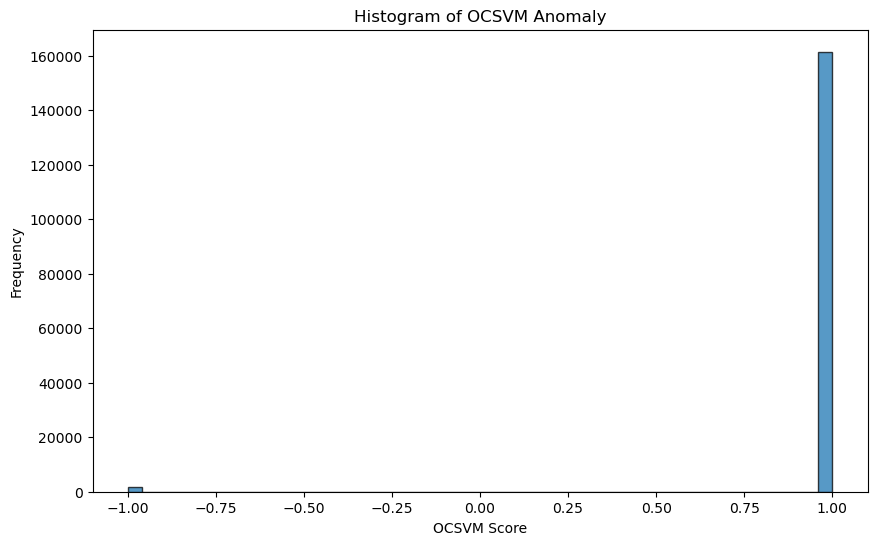

In [97]:
# Plot histograms for OCSVM scores
plt.figure(figsize=(10, 6))
plt.hist(data['OCSVM_Prediction'], bins=50, alpha=0.75, edgecolor='black')
plt.title('Histogram of OCSVM Anomaly')
plt.xlabel('OCSVM Score')
plt.ylabel('Frequency')
plt.show()

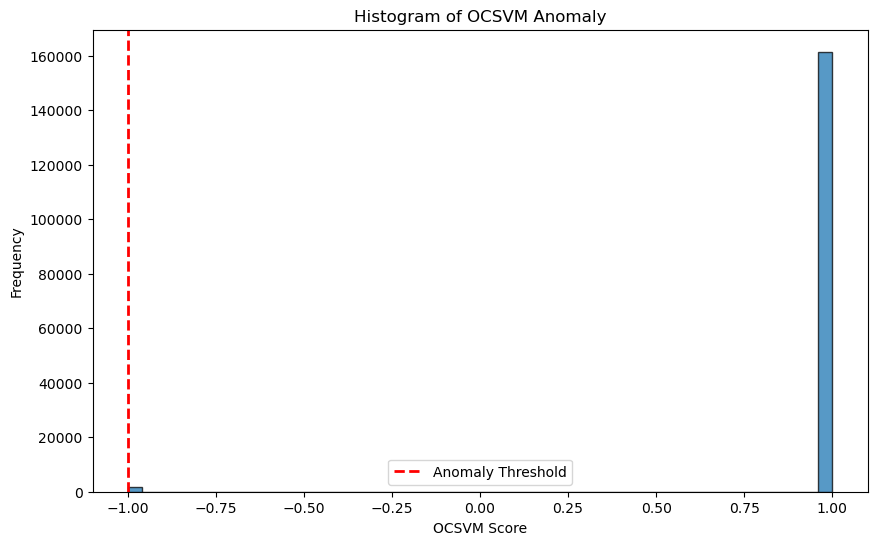

In [98]:
import matplotlib.pyplot as plt

# Plot histograms for OCSVM scores
plt.figure(figsize=(10, 6))
plt.hist(data['OCSVM_Prediction'], bins=50, alpha=0.75, edgecolor='black')

# Add a vertical line at -1
plt.axvline(x=-1, color='red', linestyle='--', linewidth=2, label='Anomaly Threshold')

plt.title('Histogram of OCSVM Anomaly')
plt.xlabel('OCSVM Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


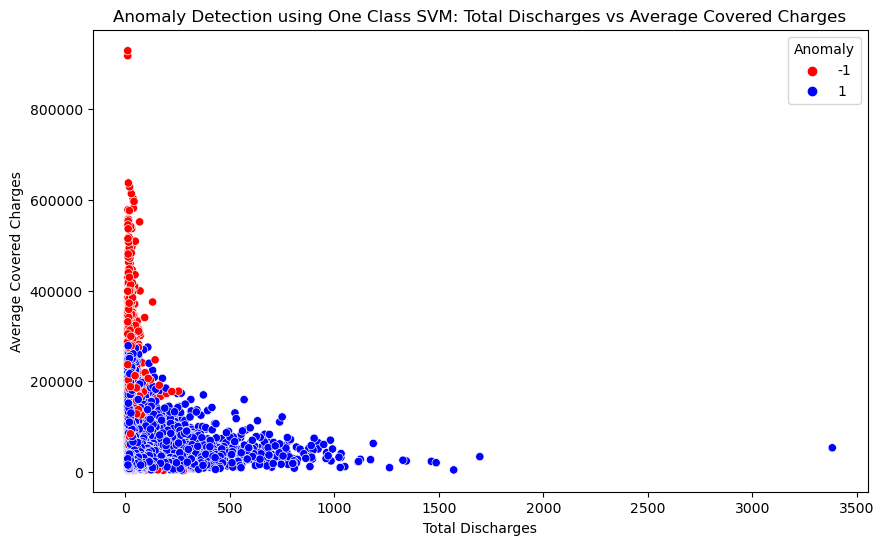

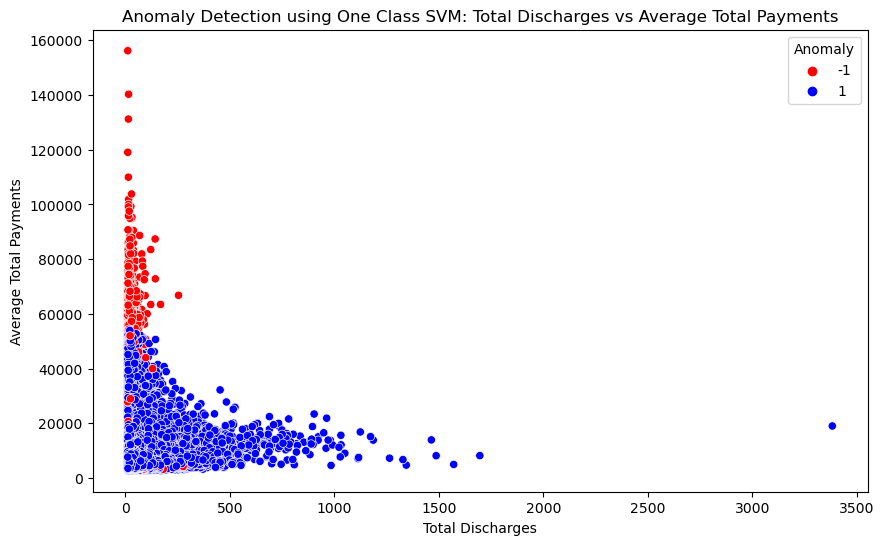

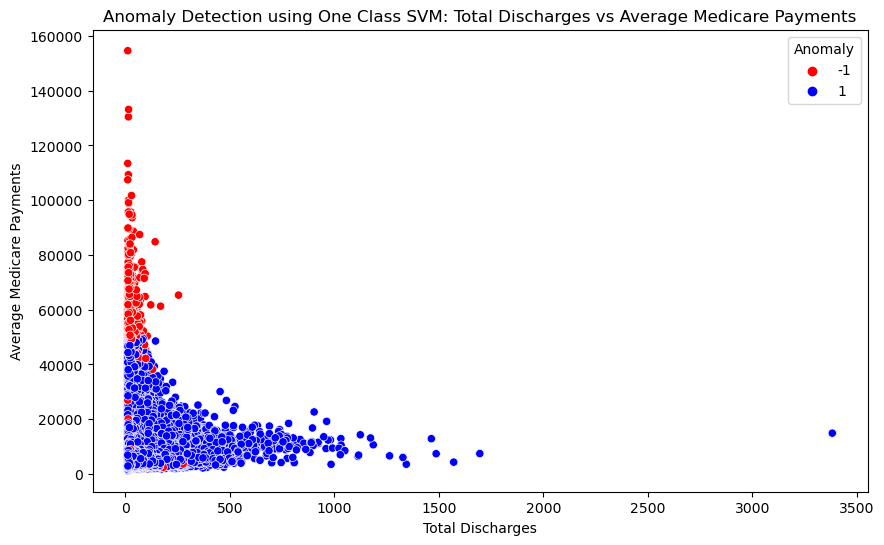

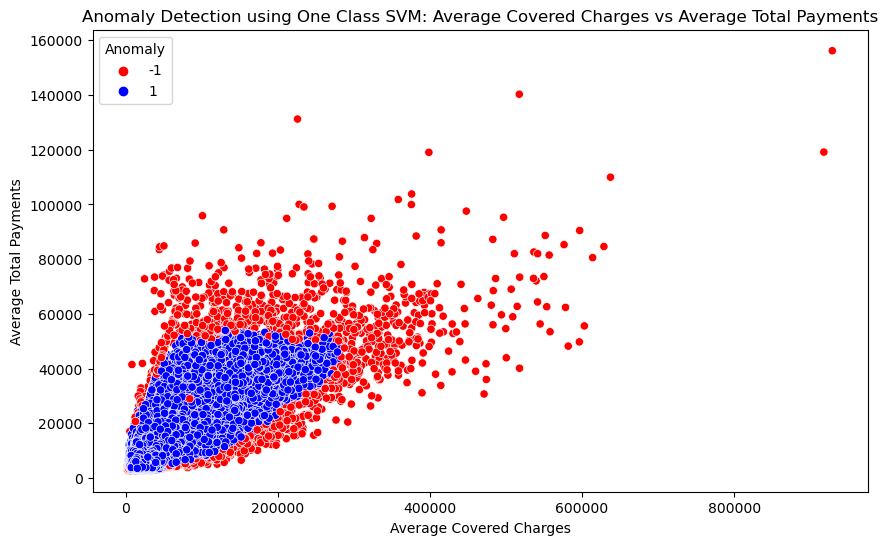

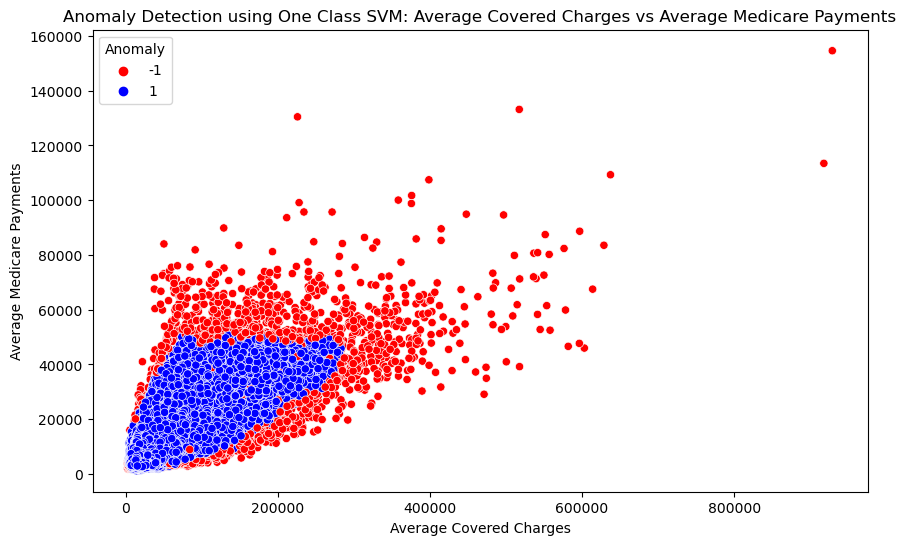

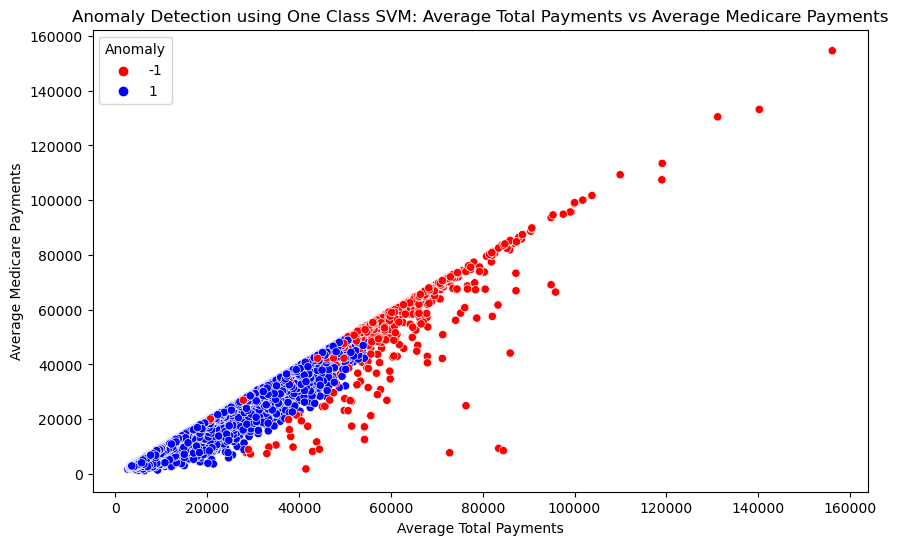

In [99]:
if 'OCSVM_Prediction' in data.columns and len(columns_for_ocsvm) >= 2:
    pairs_of_columns = [(columns_for_ocsvm[i], columns_for_ocsvm[j]) 
                    for i in range(len(columns_for_ocsvm)) 
                    for j in range(i+1, len(columns_for_ocsvm))]

for col1, col2 in pairs_of_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[col1], 
                    y=data[col2], 
                    hue=data['OCSVM_Prediction'], 
                    palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomaly Detection using One Class SVM: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Anomaly')
    plt.show()


#### End of OCSVM

# Local Outlier Factor 

### Preprocessing and Cleaning

In [100]:
file_path = r"C:\Users\Dell\Downloads\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv"

In [101]:
# Load the dataset
data = pd.read_csv(file_path)

In [102]:
# Count of Rows and columns in dataset
print(data.shape)

(163065, 12)


In [103]:
def load_and_preprocess_data(file_path, columns_to_clean, columns_for_lof):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        data.columns = data.columns.str.strip()

        # Ensure columns are in the dataset
        missing_columns = [col for col in columns_to_clean + columns_for_lof if col not in data.columns]
        if missing_columns:
            raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

        # Handle missing values
        data = data.dropna(subset=columns_to_clean + columns_for_lof)

        # Clean specified columns
        for column in columns_to_clean:
            data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)
        
        return data
    
    except Exception as e:
        print(f"Error loading or preprocessing data: {e}")
        return None

In [104]:
# View the column headers
print(data.head)

<bound method NDFrame.head of                                   DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2           

In [105]:
# Remove leading and trailing whitespace from column names
data.columns = data.columns.str.strip()

In [106]:
# View column headers after stripping
print("Column names after stripping whitespace:")
print(data.columns)

Column names after stripping whitespace:
Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


In [107]:
# View data type of each column
print(data.dtypes)

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
Total Discharges                         int64
Average Covered Charges                 object
Average Total Payments                  object
Average Medicare Payments               object
dtype: object


In [108]:
# Check for missing values in data
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
dtype: int64


In [109]:
# Clean specified columns (remove dollar signs and commas, then convert to float)
columns_to_clean = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
for column in columns_to_clean:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

In [110]:
# Shows the statistical summary of uploaded data
print("Summary of cleaned columns:")
print(data[columns_to_clean].describe())

Summary of cleaned columns:
       Average Covered Charges  Average Total Payments  \
count            163065.000000           163065.000000   
mean              36133.954224             9707.473804   
std               35065.365931             7664.642598   
min                2459.400000             2673.000000   
25%               15947.160000             5234.500000   
50%               25245.820000             7214.100000   
75%               43232.590000            11286.400000   
max              929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000  


In [111]:
columns_for_lof = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

In [112]:
# Shows the statistical summary of uploaded data
print("Summary of columns:")
#print(data[columns_for_lof].describe())
df = pd.DataFrame(data[columns_for_lof].describe())

df

Summary of columns:


Total Discharges  Average Covered Charges  Average Total Payments  \
count     163065.000000            163065.000000           163065.000000   
mean          42.776304             36133.954224             9707.473804   
std           51.104042             35065.365931             7664.642598   
min           11.000000              2459.400000             2673.000000   
25%           17.000000             15947.160000             5234.500000   
50%           27.000000             25245.820000             7214.100000   
75%           49.000000             43232.590000            11286.400000   
max         3383.000000            929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000

In [113]:
print(data.shape)

(163065, 12)


In [114]:
def load_and_preprocess_data(file_path, columns_to_clean, columns_for_lof):
    """
    Load and preprocess the dataset.

    Parameters:
        file_path (str): Path to the CSV file.
        columns_to_clean (list): List of column names to clean (e.g., remove dollar signs, commas).
        columns_for_lof (list): List of numerical column names for LOF calculation.
        
    Returns:
        DataFrame: Preprocessed DataFrame.
    """

In [115]:
print(data.shape)

(163065, 12)


In [116]:
def apply_lof(data, columns_for_lof, n_neighbors=20, contamination=0.01):
    """
    Apply the Local Outlier Factor (LOF) method to identify anomalies.

    Parameters:
        data (DataFrame): The preprocessed DataFrame.
        columns_for_lof (list): List of numerical column names for LOF calculation.
        n_neighbors (int): Number of neighbors to use for LOF.
        contamination (float): The proportion of anomalies in the data set.

    Returns:
        DataFrame: DataFrame containing the anomalies.
    """
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    data['LOF_Prediction'] = lof.fit_predict(data[columns_for_lof])
    data['LOF_Score'] = -lof.negative_outlier_factor_
    
    threshold = np.percentile(data['LOF_Score'], 100 * (1 - contamination))
    anomalies = data[data['LOF_Score'] > threshold]
    
    return anomalies

In [117]:
print(data.shape)

(163065, 12)


In [118]:
def load_and_preprocess_data(file_path, columns_to_clean, columns_for_lof):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")
        
        # Strip whitespace from column names
        data.columns = data.columns.str.strip()

        # Print column names to verify
        print("Columns in the raw data:")
        print(data.columns)

        # Check if all required columns are present
        missing_columns = [col for col in columns_to_clean + columns_for_lof if col not in data.columns]
        if missing_columns:
            raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

        # Drop rows with missing values in relevant columns
        data = data.dropna(subset=columns_to_clean + columns_for_lof)

        # Clean specified columns
        for column in columns_to_clean:
            if column in data.columns:
                # Print column data type before cleaning
                print(f"Column '{column}' data type before cleaning: {data[column].dtype}")
                data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)
                # Print column data type after cleaning
                print(f"Column '{column}' data type after cleaning: {data[column].dtype}")
            else:
                print(f"Column '{column}' not found in data.")

        return data
    
    except ValueError as e:
        print(f"ValueError: {e}")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: The file could not be parsed. Check the file format.")
    except Exception as e:
        print(f"Unexpected error: {e}")
    
    return None

# Load and preprocess the data
data = load_and_preprocess_data(file_path, columns_to_clean, columns_for_lof)


Data loaded successfully.
Columns in the raw data:
Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')
Column 'Average Covered Charges' data type before cleaning: object
Column 'Average Covered Charges' data type after cleaning: float64
Column 'Average Total Payments' data type before cleaning: object
Column 'Average Total Payments' data type after cleaning: float64
Column 'Average Medicare Payments' data type before cleaning: object
Column 'Average Medicare Payments' data type after cleaning: float64


In [119]:
print(data.shape)

(163065, 12)


In [120]:
start_time = time.time()

In [121]:
# Define parameters
n_neighbors = 20  
contamination = 0.01  
# Apply LOF to identify anomalies
lof_anomalies = apply_lof(data, columns_for_lof, n_neighbors, contamination)

In [122]:
lof_time = time.time() - start_time

In [123]:
# Output the count of anomalies
print(f"Count of anomalies Using LOF: {len(lof_anomalies)}")


Count of anomalies Using LOF: 1631


In [124]:
# Print the anomalies DataFrame
print("Anomalies Using LOF:")
#print(lof_anomalies)
df = pd.DataFrame(lof_anomalies)

df

Anomalies Using LOF:


DRG Definition  Provider Id  \
36      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30062   
88      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        50180   
107     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        50380   
139     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        60100   
214     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC       100173   
...                                          ...          ...   
162685            948 - SIGNS & SYMPTOMS W/O MCC       390168   
162713            948 - SIGNS & SYMPTOMS W/O MCC       390312   
162759            948 - SIGNS & SYMPTOMS W/O MCC       440011   
162843            948 - SIGNS & SYMPTOMS W/O MCC       450200   
162884            948 - SIGNS & SYMPTOMS W/O MCC       450656   

                                         Provider Name  \
36           SUMMIT HEALTHCARE REGIONAL MEDICAL CENTER   
88      JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS   
107                            GOOD SAMARITAN HOSPITAL   
139                      MEDICAL CENTER OF AURORA, THE   
214                             FLORIDA HOSPITAL TAMPA   
...                                                ...   
162685                        BUTLER MEMORIAL HOSPITAL   
162713             CANCER TREATMENT CENTERS OF AMERICA   
162759                        BLOUNT MEMORIAL HOSPITAL   
162843                  WADLEY REGIONAL MEDICAL CENTER   
162884                      NACOGDOCHES MEDICAL CENTER   

              Provider Street Address Provider City Provider State  \
36            2200 SHOW LOW LAKE ROAD      SHOW LOW             AZ   
88             1601 YGNACIO VALLEY RD  WALNUT CREEK             CA   
107              2425 SAMARITAN DRIVE      SAN JOSE             CA   
139                 1501 S POTOMAC ST        AURORA             CO   
214               3100 E FLETCHER AVE         TAMPA             FL   
...                               ...           ...            ...   
162685               ONE HOSPITAL WAY        BUTLER             PA   
162713       1331 EAST WYOMING AVENUE  PHILADELPHIA             PA   
162759  907 E LAMAR ALEXANDER PARKWAY     MARYVILLE             TN   
162843               1000 PINE STREET     TEXARKANA             TX   
162884        4920 NE STALLINGS DRIVE   NACOGDOCHES             TX   

        Provider Zip Code Hospital Referral Region Description  \
36                  85901                         AZ - Phoenix   
88                  94598             CA - Contra Costa County   
107                 95124                        CA - San Jose   
139                 80012                          CO - Denver   
214                 33613                           FL - Tampa   
...                   ...                                  ...   
162685              16001                      PA - Pittsburgh   
162713              19124                    PA - Philadelphia   
162759              37804                       TN - Knoxville   
162843              75501                       AR - Texarkana   
162884              75961                         TX - Houston   

        Total Discharges  Average Covered Charges  Average Total Payments  \
36                    17                 15931.52                10000.82   
88                    20                 85165.10                12355.85   
107                   17                 69223.47                11721.64   
139                   20                 63986.40                 8613.80   
214                   15                 55000.00                 8229.13   
...                  ...                      ...                     ...   
162685                12                 12600.00                 3583.33   
162713                24                 83945.95                28968.20   
162759                29                 14055.17                 3515.65   
162843                11                 18795.36                 4137.54   
162884                13                 23945.84                 3589.92  

In [125]:
print(f"Time taken for LOF: {lof_time:.2f} seconds")

Time taken for LOF: 3.87 seconds


In [126]:
## Export anomalies to CSV
anomalies_file_path = r'C:\Users\Dell\Downloads\lof_anomalies.csv'
anomalies.to_csv(anomalies_file_path, index=False)
print(f"Anomalies exported to {anomalies_file_path}")

Anomalies exported to C:\Users\Dell\Downloads\lof_anomalies.csv


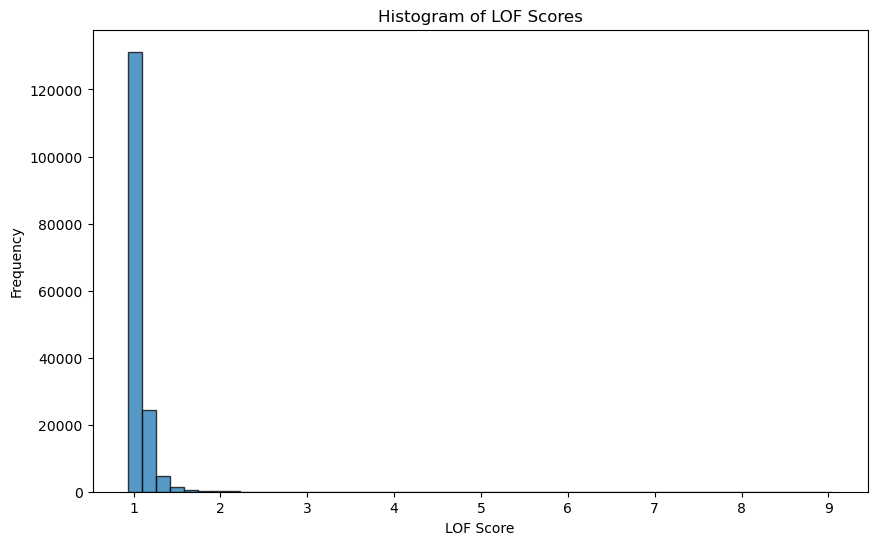

In [127]:
# Optional: Plot histograms for LOF scores
plt.figure(figsize=(10, 6))
plt.hist(data['LOF_Score'], bins=50, alpha=0.75, edgecolor='black')
plt.title('Histogram of LOF Scores')
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.show()

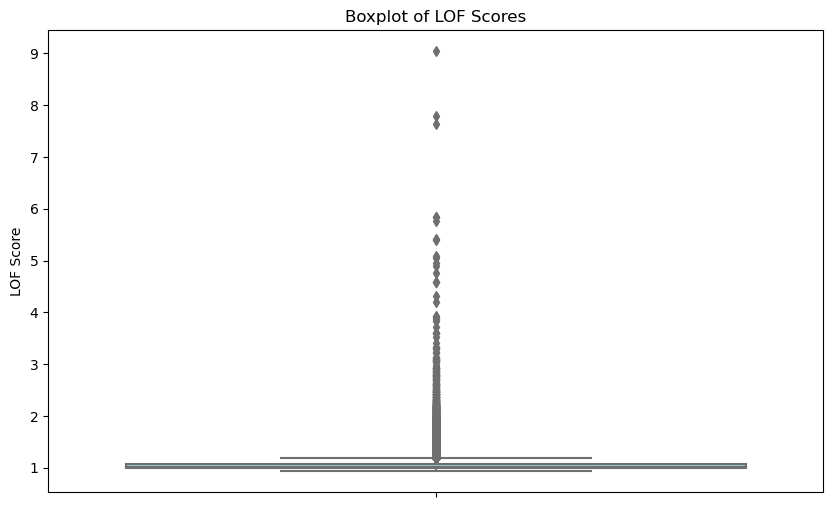

In [128]:
# Create a boxplot of LOF scores
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['LOF_Score'], color='skyblue')
plt.title('Boxplot of LOF Scores')
plt.ylabel('LOF Score')
plt.show()

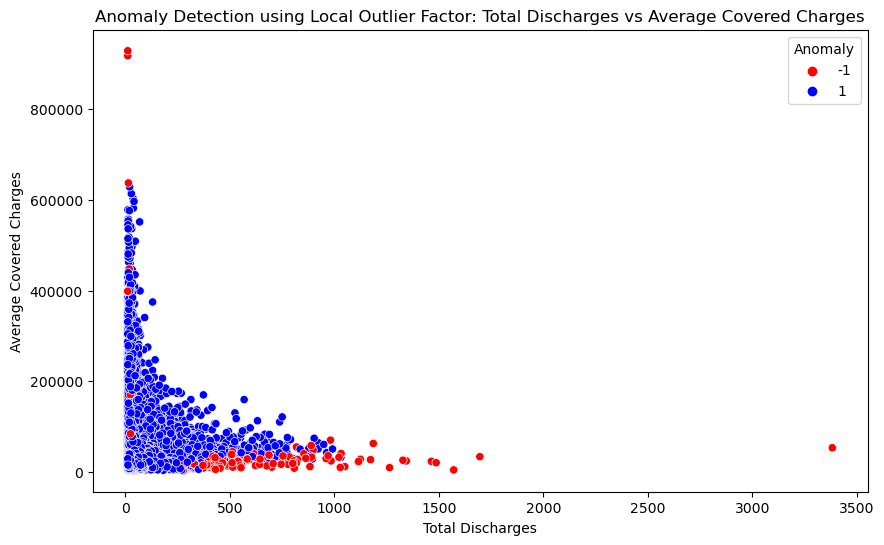

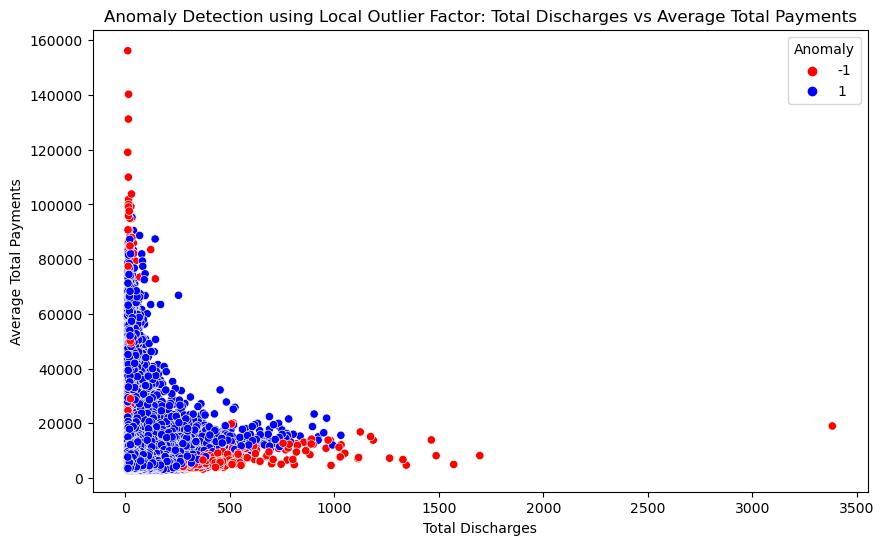

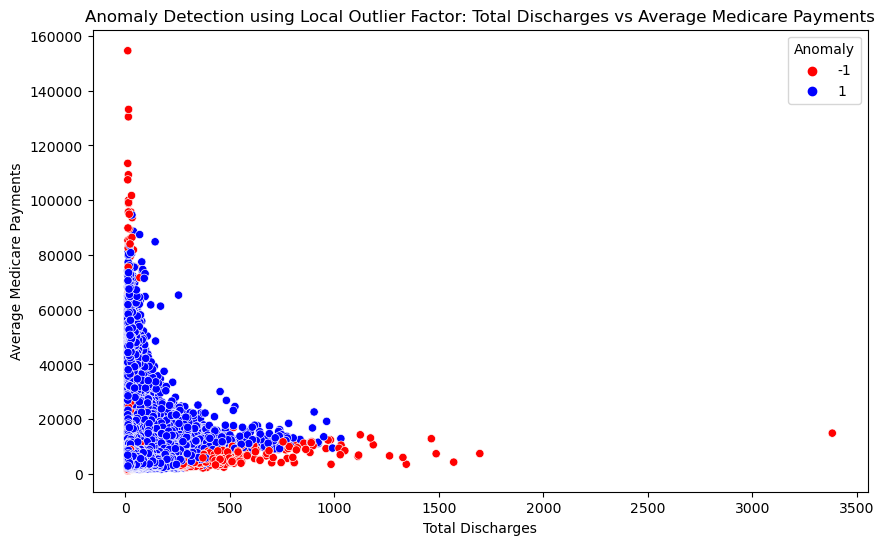

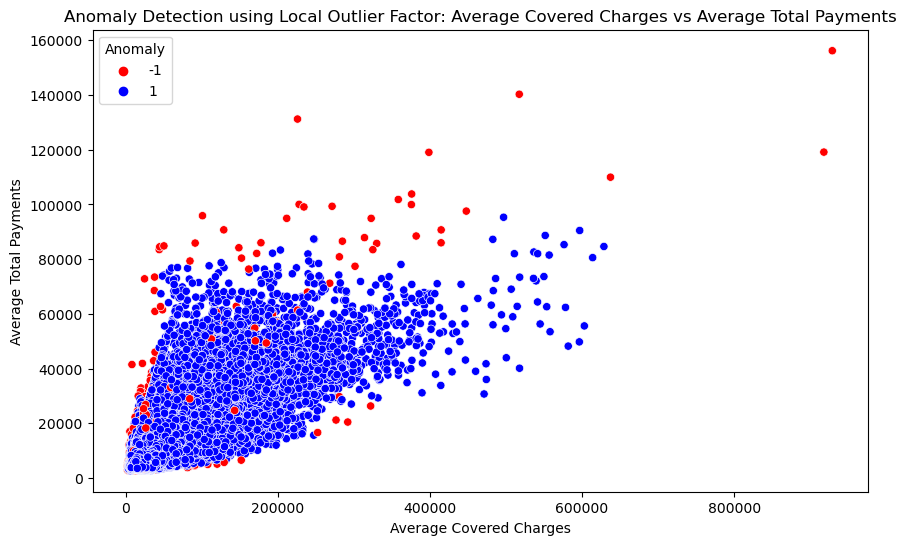

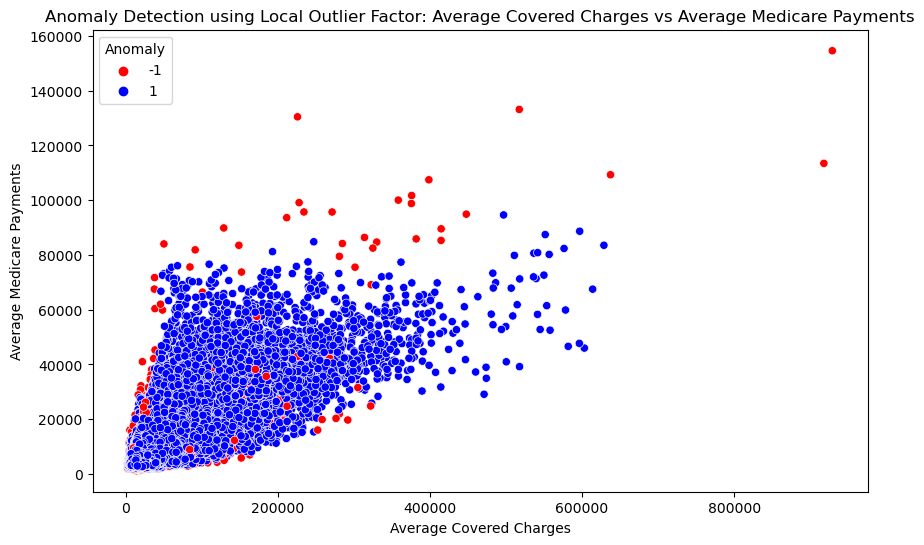

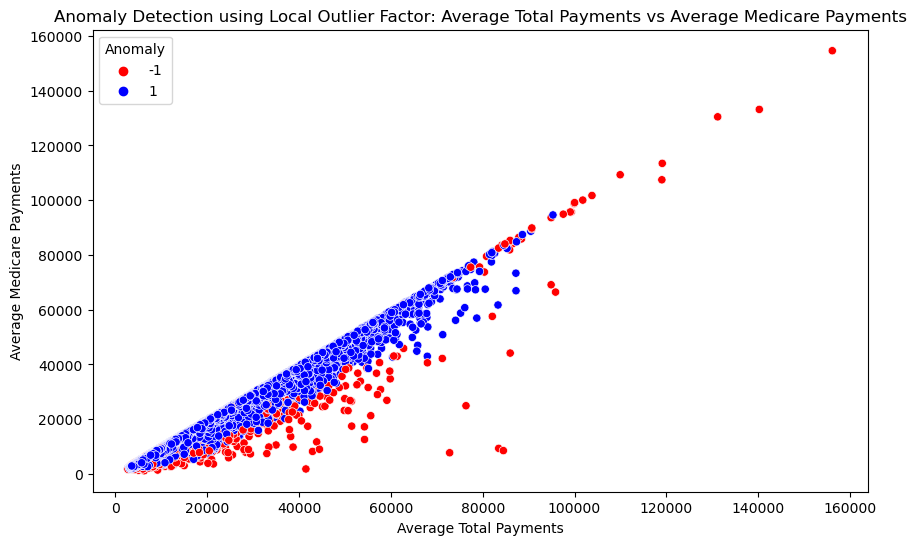

In [129]:
if 'LOF_Prediction' in data.columns and len(columns_for_lof) >= 2:
    pairs_of_columns = [(columns_for_lof[i], columns_for_lof[j]) 
                    for i in range(len(columns_for_lof)) 
                    for j in range(i+1, len(columns_for_lof))]

for col1, col2 in pairs_of_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[col1], 
                    y=data[col2], 
                    hue=data['LOF_Prediction'], 
                    palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomaly Detection using Local Outlier Factor: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Anomaly')
    plt.show()


  #### End of LOF

# Imports required

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParam['figure.figsize'] = (10,6)
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

### Preprocessing and Cleaning

In [131]:
file_path = r"C:\Users\Dell\Downloads\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv"

In [132]:
# Load the dataset
data = pd.read_csv(file_path)

In [133]:
# Count of Rows and columns in dataset
print(data.shape)

(163065, 12)


In [134]:
# View the column headers
print(data.head)
df = pd.DataFrame(data)

df

<bound method NDFrame.head of                                   DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2           

DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2                        ELIZA COFFEE MEMORIAL HOSPITAL   
3                                     ST VINCENT'S EAST   
4                         SHELBY BAPTIST MEDICAL CENTER   
...                                                 ...   
163060                  SETON MEDICAL CENTER WILLIAMSON   
163061                     METHODIST STONE OAK HOSPITAL   
163062                        SETON MEDICAL CENTER HAYS   
163063       TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE   
163064  TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND   

           Provider Street Address Provider City Provider State  \
0           1108 ROSS CLARK CIRCLE        DOTHAN             AL   
1       2505 U S HIGHWAY 431 NORTH          BOAZ             AL   
2               205 MARENGO STREET      FLORENCE             AL   
3       50 MEDICAL PARK EAST DRIVE    BIRMINGHAM             AL   
4          1000 FIRST STREET NORTH     ALABASTER             AL   
...                            ...           ...            ...   
163060           201 SETON PARKWAY    ROUND ROCK             TX   
163061        1139 E SONTERRA BLVD   SAN ANTONIO             TX   
163062              6001 KYLE PKWY          KYLE             TX   
163063      231 SOUTH COLLINS ROAD     SUNNYVALE             TX   
163064      4400 LONG PRAIRIE ROAD  FLOWER MOUND             TX   

        Provider Zip Code Hospital Referral Region Description  \
0                   36301                          AL - Dothan   
1                   35957                      AL - Birmingham   
2                   35631                      AL - Birmingham   
3                   35235                      AL - Birmingham   
4                   35007                      AL - Birmingham   
...                   ...                                  ...   
163060              78664                          TX - Austin   
163061              78258                     TX - San Antonio   
163062              78640                          TX - Austin   
163063              75182                          TX - Dallas   
163064              75028                          TX - Dallas   

         Total Discharges   Average Covered Charges   Average Total Payments   \
0                       91                 $32963.07                 $5777.24   
1                       14                 $15131.85                 $5787.57   
2                       24                 $37560.37                 $5434.95   
3                       25                 $13998.28                 $5417.56   
4                       18                 $31633.27                 $5658.33   
...                    ...                       ...                      ...   
163060                  23                 $26314.39                 $3806.86   
163061                  11                 $21704.72                 $4027.36   
163062                  19                 $39121.73                 $5704.36   
163063                  11                 $28873.09                 $7663.09   
163064                  12                 $15042.00   

In [135]:
# Remove leading and trailing whitespace from column names
data.columns = data.columns.str.strip()

In [136]:
# View column headers after stripping
print("Column names after stripping whitespace:")
print(data.columns)

Column names after stripping whitespace:
Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


In [137]:
# View data type of each column
print(data.dtypes)

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
Total Discharges                         int64
Average Covered Charges                 object
Average Total Payments                  object
Average Medicare Payments               object
dtype: object


In [138]:
# Check for missing values in data
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
dtype: int64


In [139]:
# Clean specified columns (remove dollar signs and commas, then convert to float)
columns_to_clean = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
for column in columns_to_clean:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

In [140]:
# Shows the statistical summary of uploaded data
print("Summary of cleaned columns:")
print(data[columns_to_clean].describe())
df = pd.DataFrame(data[columns_to_clean].describe())

df

Summary of cleaned columns:
       Average Covered Charges  Average Total Payments  \
count            163065.000000           163065.000000   
mean              36133.954224             9707.473804   
std               35065.365931             7664.642598   
min                2459.400000             2673.000000   
25%               15947.160000             5234.500000   
50%               25245.820000             7214.100000   
75%               43232.590000            11286.400000   
max              929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000  


Average Covered Charges  Average Total Payments  \
count            163065.000000           163065.000000   
mean              36133.954224             9707.473804   
std               35065.365931             7664.642598   
min                2459.400000             2673.000000   
25%               15947.160000             5234.500000   
50%               25245.820000             7214.100000   
75%               43232.590000            11286.400000   
max              929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000

## Isolation Forest

In [141]:
columns_for_iforest = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

In [142]:
def load_and_preprocess_data(file_path, columns_to_clean, columns_for_iforest):
    """
    Load, preprocess the dataset, and perform anomaly detection using Isolation Forest.
    
    Parameters:
        file_path (str): Path to the CSV file.
        columns_to_clean (list): List of column names to clean (e.g., remove dollar signs, commas).
        columns_for_anomaly_detection (list): List of numerical column names for anomaly detection.
        
    Returns:
        dict: Dictionary containing the detected anomalies and the preprocessed data.
    """

In [143]:
anomaly_data = [columns_for_iforest]

In [144]:
 # Ensure the data for anomaly detection has consistent column names
anomaly_data = data[columns_for_iforest].copy()

In [145]:
# Convert DataFrame to numpy array for fitting and predicting
anomaly_data_array = anomaly_data.to_numpy()

In [146]:
# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(anomaly_data_array)

IsolationForest(contamination=0.01, random_state=42)

In [147]:
# Predict anomalies
#anomaly_scores = model.decision_function(anomaly_data)
#anomalies = model.predict(anomaly_data)

 # Predict anomalies
anomaly_scores = model.decision_function(anomaly_data_array)
anomalies = model.predict(anomaly_data_array)

In [148]:
# -1 indicates anomalies, 1 indicates normal points
data['anomaly'] = anomalies
detected_anomalies = data[data['anomaly'] == -1]

In [149]:
# Print count of detected anomalies
print(f"Count of detected anomalies using Isolation Forest: {len(detected_anomalies)}")
#print(detected_anomalies)
df = pd.DataFrame(detected_anomalies)

df

Count of detected anomalies using Isolation Forest: 1631


DRG Definition  Provider Id  \
2992    064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...       210009   
39437   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        10033   
39451   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        10139   
39452   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        20001   
39453   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        20026   
...                                                   ...          ...   
153397  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       210009   
153903  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330059   
153920  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330101   
153959  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       330194   
157780                                    885 - PSYCHOSES       210009   

                           Provider Name              Provider Street Address  \
2992         JOHNS HOPKINS HOSPITAL, THE              600 NORTH  WOLFE STREET   
39437     UNIVERSITY OF ALABAMA HOSPITAL                619 SOUTH 19TH STREET   
39451           BROOKWOOD MEDICAL CENTER  2010 BROOKWOOD MEDICAL CENTER DRIVE   
39452   PROVIDENCE ALASKA MEDICAL CENTER                           BOX 196604   
39453       ALASKA NATIVE MEDICAL CENTER                    4315 DIPLOMACY DR   
...                                  ...                                  ...   
153397       JOHNS HOPKINS HOSPITAL, THE              600 NORTH  WOLFE STREET   
153903         MONTEFIORE MEDICAL CENTER                111 EAST 210TH STREET   
153920    NEW YORK-PRESBYTERIAN HOSPITAL                 525 EAST 68TH STREET   
153959         MAIMONIDES MEDICAL CENTER                    4802 TENTH AVENUE   
157780       JOHNS HOPKINS HOSPITAL, THE              600 NORTH  WOLFE STREET   

       Provider City Provider State  Provider Zip Code  \
2992       BALTIMORE             MD              21287   
39437     BIRMINGHAM             AL              35233   
39451     BIRMINGHAM             AL              35209   
39452      ANCHORAGE             AK              99519   
39453      ANCHORAGE             AK              99508   
...              ...            ...                ...   
153397     BALTIMORE             MD              21287   
153903         BRONX             NY              10467   
153920      NEW YORK             NY              10021   
153959      BROOKLYN             NY              11219   
157780     BALTIMORE             MD              21287   

       Hospital Referral Region Description  Total Discharges  \
2992                         MD - Baltimore                64   
39437                       AL - Birmingham                28   
39451                       AL - Birmingham                22   
39452                        AK - Anchorage                12   
39453                        AK - Anchorage                16   
...                                     ...               ...   
153397                       MD - Baltimore                97   
153903                           NY - Bronx               903   
153920                       NY - Manhattan               516   
153959                       NY - Manhattan               483   
157780                       MD - Baltimore               453   

        Average Covered Charges  Average Total Payments  \
2992                   54052.21                50882.40   
39437                 188031.14                42550.21   
39451                 459985.27                39018.86   
39452                 155008.00                46105.58   
39453                  72483.18                62665.37   
...                         ...                     ...   
153397                 46747.09                44003.90   
153903                 74102.28                23393.24   
153920                 76984.52                25162.21   
153959                 86348.18                27795.24   
157780                 34232.33                32200.7

In [150]:
iforest_time = time.time() - start_time

In [151]:

print(f"Time taken for Isolation Forest: {iforest_time:.2f} seconds")

Time taken for Isolation Forest: 81.01 seconds


In [152]:
# Save detected anomalies to a CSV file
detected_anomalies_file_path = r'C:\Users\Dell\Downloads\iforest_anomalies.csv'    
detected_anomalies.to_csv(detected_anomalies_file_path, index=False)
print(f"Detected anomalies exported to {detected_anomalies_file_path}")

Detected anomalies exported to C:\Users\Dell\Downloads\iforest_anomalies.csv


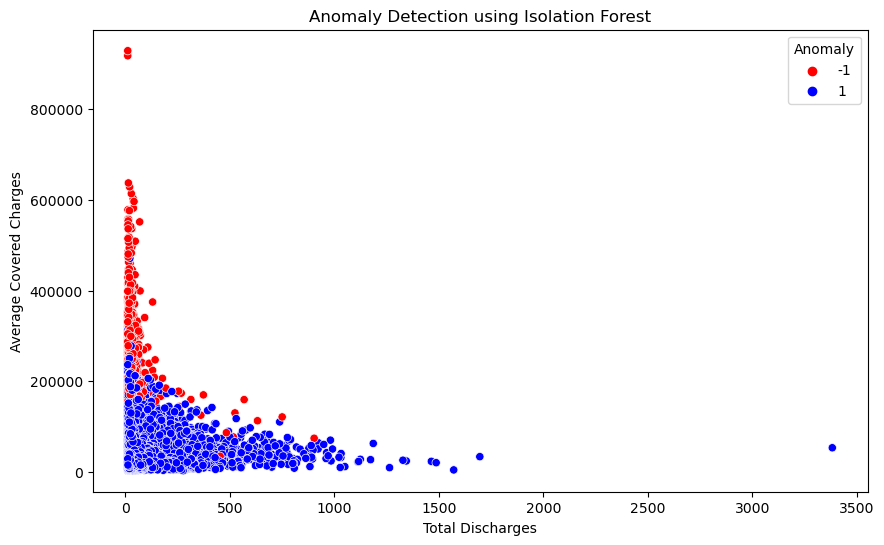

In [153]:
# Visualize detected anomalies
if len(columns_for_iforest) >= 2:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=data[columns_for_iforest[0]], 
                        y=data[columns_for_iforest[1]], 
                        hue=data['anomaly'], 
                        palette={1: 'blue', -1: 'red'})
        plt.title('Anomaly Detection using Isolation Forest')
        plt.xlabel(columns_for_iforest[0])
        plt.ylabel(columns_for_iforest[1])
        plt.legend(title='Anomaly')
        plt.show()
else:
        print("Need at least two columns for visualization.")

In [154]:
 # Predict anomalies
anomaly_scores = model.decision_function(anomaly_data_array)
anomalies = model.predict(anomaly_data_array)

In [155]:
# -1 indicates anomalies, 1 indicates normal points
data['anomaly'] = anomalies
detected_anomalies = data[data['anomaly'] == -1]

In [156]:
# Print count of detected anomalies
print(f"Count of detected anomalies: {len(detected_anomalies)}")

Count of detected anomalies: 1631


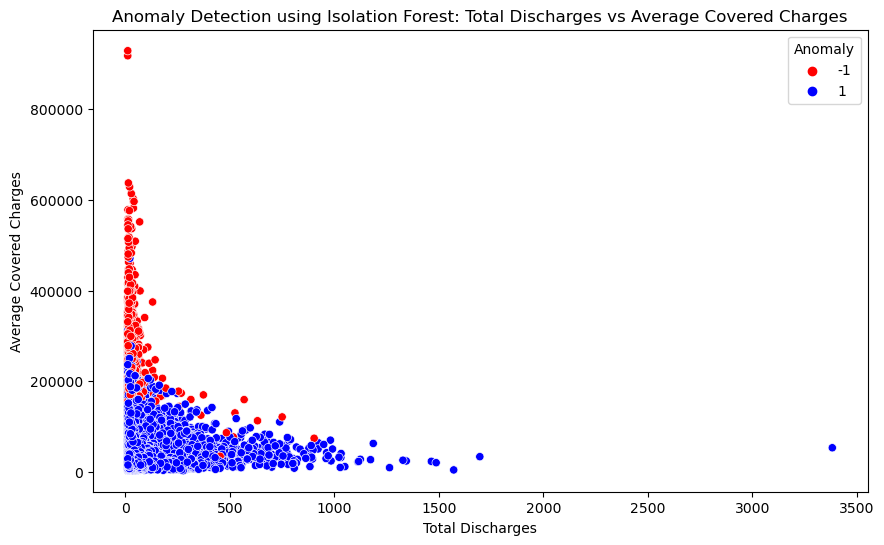

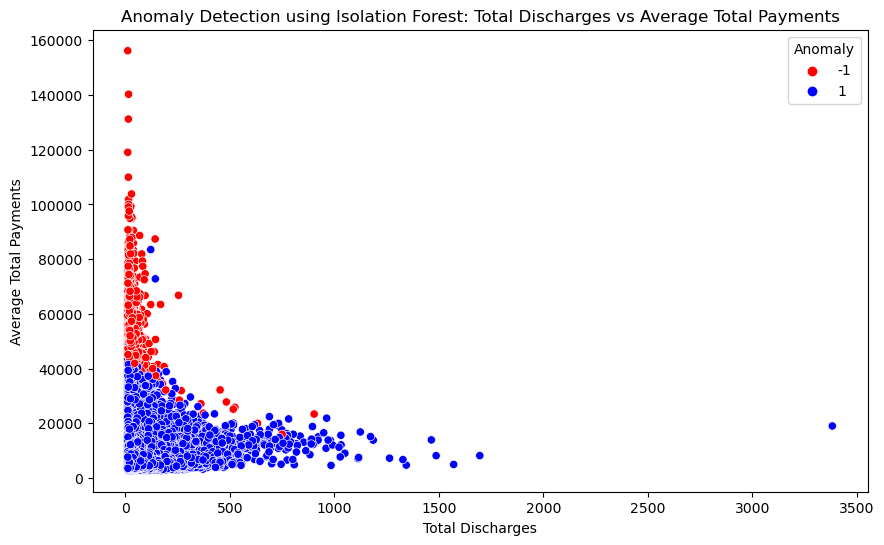

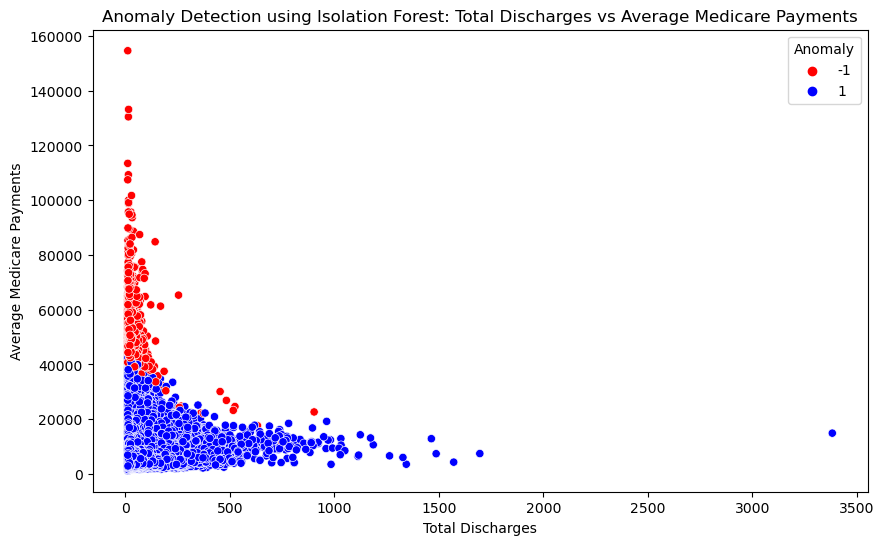

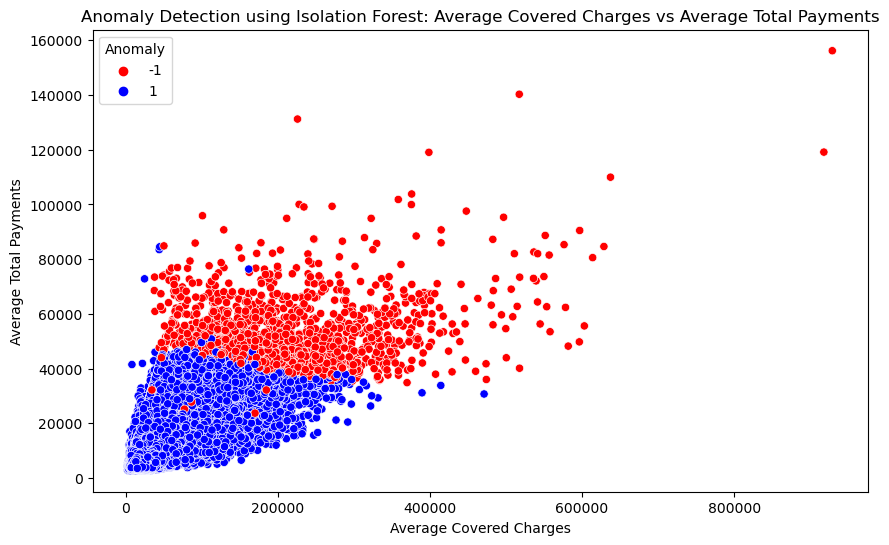

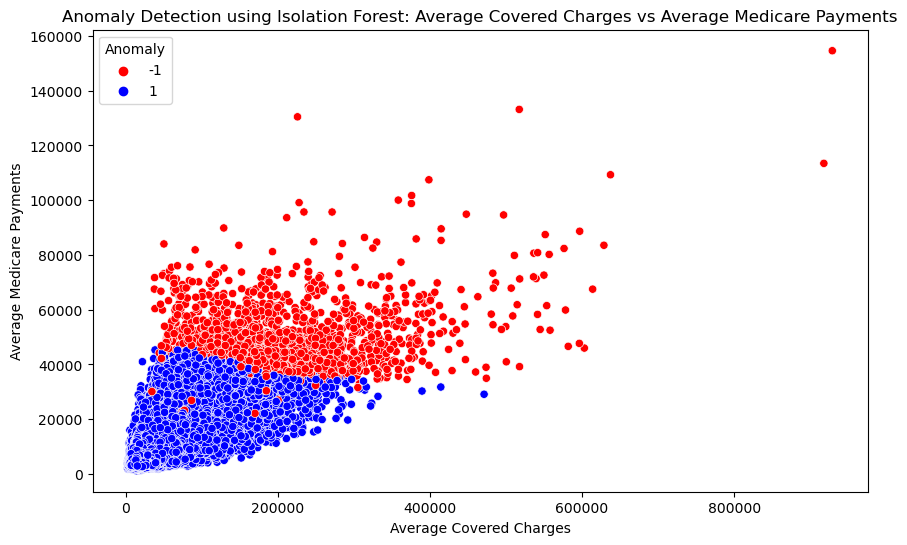

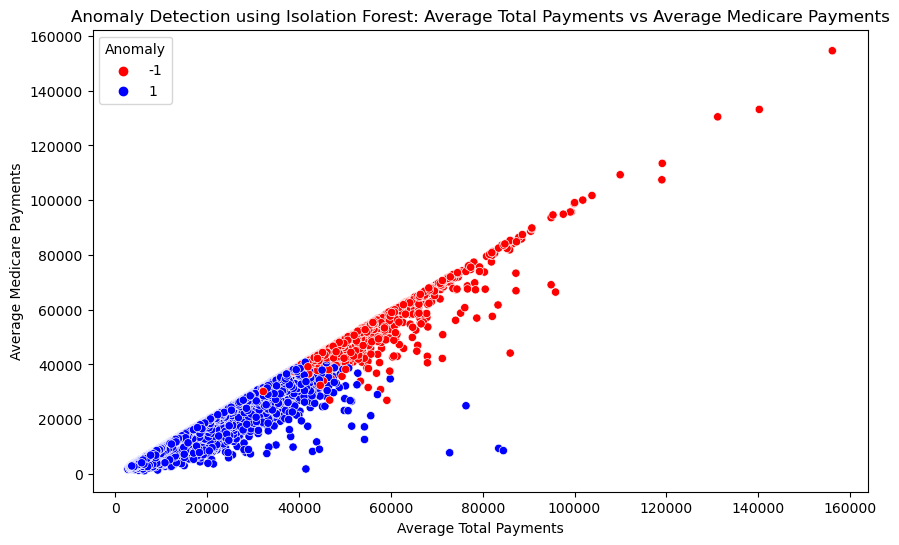

In [157]:
# Visualize detected anomalies for each pair of columns
pairs_of_columns = [(columns_for_iforest[i], columns_for_iforest[j]) 
                    for i in range(len(columns_for_iforest)) 
                    for j in range(i+1, len(columns_for_iforest))]

for col1, col2 in pairs_of_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[col1], 
                    y=data[col2], 
                    hue=data['anomaly'], 
                    palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomaly Detection using Isolation Forest: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Anomaly')
    plt.show()


#### End of Isolation Forest

# 

# 

# Hybrid Method - Combining LOF and IF Methods

# 

# Imports required

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParam['figure.figsize'] = (10,6)
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

### Preprocessing and Cleaning

In [159]:
file_path = r"C:\Users\Dell\Downloads\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv"

In [160]:
# Load the dataset
data = pd.read_csv(file_path)

In [161]:
# Count of Rows and columns in dataset
print(data.shape)

(163065, 12)


In [162]:
# View the column headers
#print(data.head)
df = pd.DataFrame(data)

df

DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2                        ELIZA COFFEE MEMORIAL HOSPITAL   
3                                     ST VINCENT'S EAST   
4                         SHELBY BAPTIST MEDICAL CENTER   
...                                                 ...   
163060                  SETON MEDICAL CENTER WILLIAMSON   
163061                     METHODIST STONE OAK HOSPITAL   
163062                        SETON MEDICAL CENTER HAYS   
163063       TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE   
163064  TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND   

           Provider Street Address Provider City Provider State  \
0           1108 ROSS CLARK CIRCLE        DOTHAN             AL   
1       2505 U S HIGHWAY 431 NORTH          BOAZ             AL   
2               205 MARENGO STREET      FLORENCE             AL   
3       50 MEDICAL PARK EAST DRIVE    BIRMINGHAM             AL   
4          1000 FIRST STREET NORTH     ALABASTER             AL   
...                            ...           ...            ...   
163060           201 SETON PARKWAY    ROUND ROCK             TX   
163061        1139 E SONTERRA BLVD   SAN ANTONIO             TX   
163062              6001 KYLE PKWY          KYLE             TX   
163063      231 SOUTH COLLINS ROAD     SUNNYVALE             TX   
163064      4400 LONG PRAIRIE ROAD  FLOWER MOUND             TX   

        Provider Zip Code Hospital Referral Region Description  \
0                   36301                          AL - Dothan   
1                   35957                      AL - Birmingham   
2                   35631                      AL - Birmingham   
3                   35235                      AL - Birmingham   
4                   35007                      AL - Birmingham   
...                   ...                                  ...   
163060              78664                          TX - Austin   
163061              78258                     TX - San Antonio   
163062              78640                          TX - Austin   
163063              75182                          TX - Dallas   
163064              75028                          TX - Dallas   

         Total Discharges   Average Covered Charges   Average Total Payments   \
0                       91                 $32963.07                 $5777.24   
1                       14                 $15131.85                 $5787.57   
2                       24                 $37560.37                 $5434.95   
3                       25                 $13998.28                 $5417.56   
4                       18                 $31633.27                 $5658.33   
...                    ...                       ...                      ...   
163060                  23                 $26314.39                 $3806.86   
163061                  11                 $21704.72                 $4027.36   
163062                  19                 $39121.73                 $5704.36   
163063                  11                 $28873.09                 $7663.09   
163064                  12                 $15042.00   

In [163]:
# Remove leading and trailing whitespace from column names
data.columns = data.columns.str.strip()

In [164]:
# View column headers after stripping
print("Column names after stripping whitespace:")
print(data.columns)

Column names after stripping whitespace:
Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


In [165]:
# View data type of each column
print(data.dtypes)

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
Total Discharges                         int64
Average Covered Charges                 object
Average Total Payments                  object
Average Medicare Payments               object
dtype: object


In [166]:
# Check for missing values in data
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
Total Discharges                        0
Average Covered Charges                 0
Average Total Payments                  0
Average Medicare Payments               0
dtype: int64


In [167]:
# Clean specified columns (remove dollar signs and commas, then convert to float)
columns_to_clean = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
for column in columns_to_clean:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

In [168]:
# Shows the statistical summary of uploaded data
print("Summary of cleaned columns:")
#print(data[columns_to_clean].describe())
df = pd.DataFrame(data[columns_to_clean].describe())

df

Summary of cleaned columns:


Average Covered Charges  Average Total Payments  \
count            163065.000000           163065.000000   
mean              36133.954224             9707.473804   
std               35065.365931             7664.642598   
min                2459.400000             2673.000000   
25%               15947.160000             5234.500000   
50%               25245.820000             7214.100000   
75%               43232.590000            11286.400000   
max              929118.900000           156158.180000   

       Average Medicare Payments  
count              163065.000000  
mean                 8494.490964  
std                  7309.467261  
min                  1148.900000  
25%                  4192.350000  
50%                  6158.460000  
75%                 10056.880000  
max                154620.810000

## Training the Model

In [169]:
columns_for_test = ['Total Discharges', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']

In [170]:
anomaly_data = [columns_for_test]

In [171]:
 # Ensure the data for anomaly detection has consistent column names
anomaly_data = data[columns_for_test].copy()

In [172]:
# Convert DataFrame to numpy array for fitting and predicting
anomaly_data_array = anomaly_data.to_numpy()

In [173]:
# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
model.fit(anomaly_data_array)

IsolationForest(contamination=0.01, random_state=42)

In [174]:
# Fit the model using the specified columns
isolation_forest.fit(data[columns_for_test])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=42)

In [175]:
# Initialize and fit the Isolation Forest model
contamination = 0.01 
isolation_forest = IsolationForest(contamination=contamination, random_state=42)
data['IF_Prediction'] = isolation_forest.fit_predict(data[columns_for_test])
data['IF_Score'] = isolation_forest.decision_function(data[columns_for_test])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [176]:
# Initialize and fit the LOF model
n_neighbors = 20  # Adjust the number of neighbors as needed
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
data['LOF_Prediction'] = lof.fit_predict(data[columns_for_test])
data['LOF_Score'] = -lof.negative_outlier_factor_

## Using Ensemble Agreement Method

In [177]:
# Combine predictions: an anomaly is identified if both methods agree
data['Ensemble_Prediction'] = np.where((data['IF_Prediction'] == -1) & (data['LOF_Prediction'] == -1), -1, 1)

# Count anomalies detected by both methods
ensemble_anomalies = data[data['Ensemble_Prediction'] == -1]
print(f"Count of anomalies using ensemble anomalies: {len(ensemble_anomalies)}")

Count of anomalies using ensemble anomalies: 55


In [178]:
# Visualize or further analyze the anomalies
print("Anomalies using Ensemble Agreement Method:")
#print(ensemble_anomalies)
df = pd.DataFrame(ensemble_anomalies)

df

Anomalies using Ensemble Agreement Method:


DRG Definition  Provider Id  \
39492   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        50038   
39521   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        50145   
39529   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        50195   
39550   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        50334   
39562   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        50441   
39564   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        50454   
39576   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...        50580   
39788   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...       140182   
39896   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...       190176   
39994   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...       240010   
40131   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...       330009   
40186   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...       330231   
40188   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...       330234   
40209   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...       330396   
86999    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC        50327   
87017    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC        50454   
87279    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       140114   
87456    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       210002   
87580    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       240061   
87793    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       330234   
87952    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       380009   
88058    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       420086   
88103    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       450018   
88158    329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC       450403   
109462        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       150166   
109780        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC       310119   
111075  469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...       390256   
150024  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...        50262   
150059  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...        50454   
150143  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...        90003   
150291  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       120026   
150481  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       210002   
150486  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       210009   
150550  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       230046   
150668  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       290039   
150744  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       330027   
150785  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       330202   
150793  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       330234   
150917  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       360180   
150969  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       390063   
151109  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...       450193   
151328   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS        50093   
151346   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS        50145   
151366   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS        50262   
151394   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS        50441   
151396   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS        50454   
151536   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       110083   
151622   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       160058   
151845   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       330009   
151863   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       330080   
151897   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       330234   
152091   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       450018   
152099   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS       450044   
152202   870 - SEPTICEMIA OR SEVERE SEPSIS W MV

In [179]:
# Save detected anomalies to a CSV file
ensemble_anomalies_file_path = r'C:\Users\Dell\Downloads\ensemble_anomalies.csv'    
ensemble_anomalies.to_csv(ensemble_anomalies_file_path, index=False)
print(f"Detected anomalies (ensemble score method) exported to {ensemble_anomalies_file_path}")

Detected anomalies (ensemble score method) exported to C:\Users\Dell\Downloads\ensemble_anomalies.csv


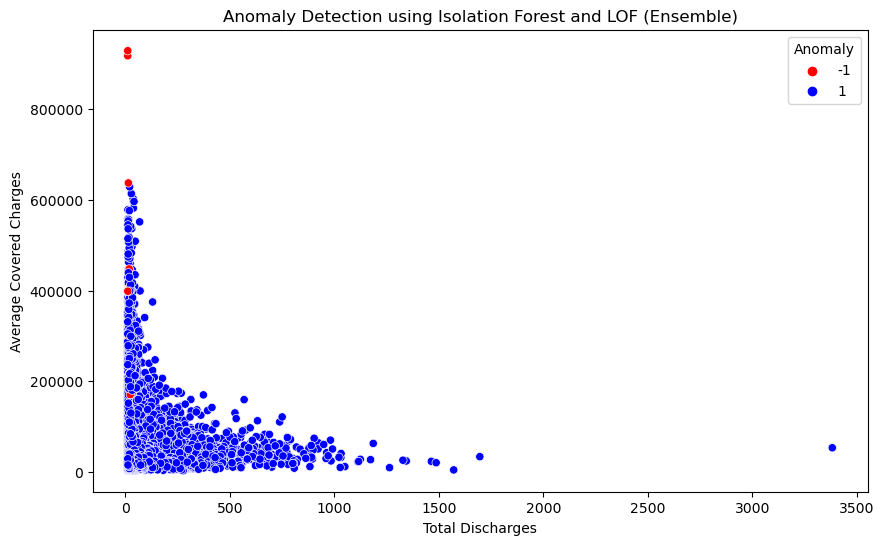

In [180]:
# Scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Discharges', y='Average Covered Charges', hue='Ensemble_Prediction', data=data, palette={-1: 'red', 1: 'blue'})
plt.title('Anomaly Detection using Isolation Forest and LOF (Ensemble)')
plt.xlabel('Total Discharges')
plt.ylabel('Average Covered Charges')
plt.legend(title='Anomaly', loc='upper right')
plt.show()


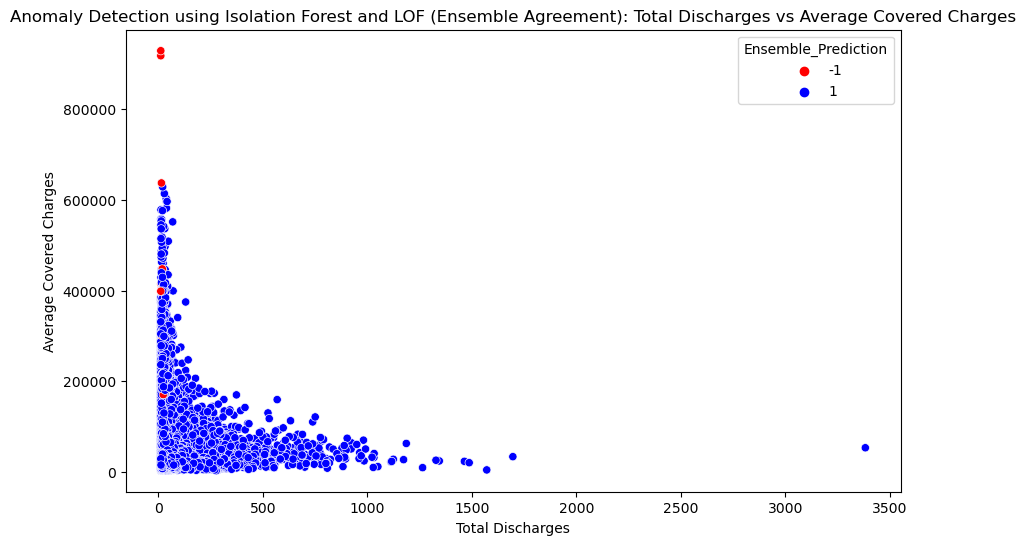

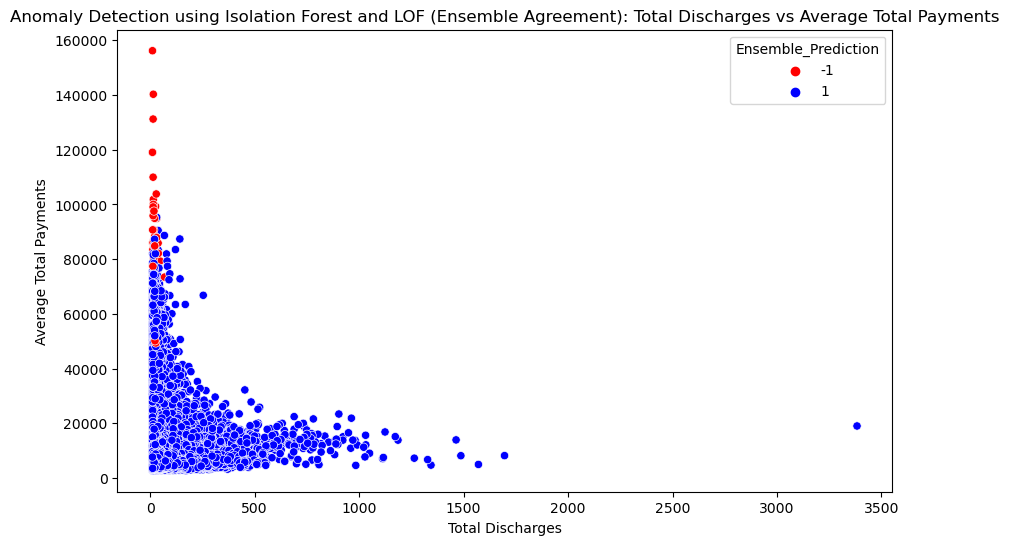

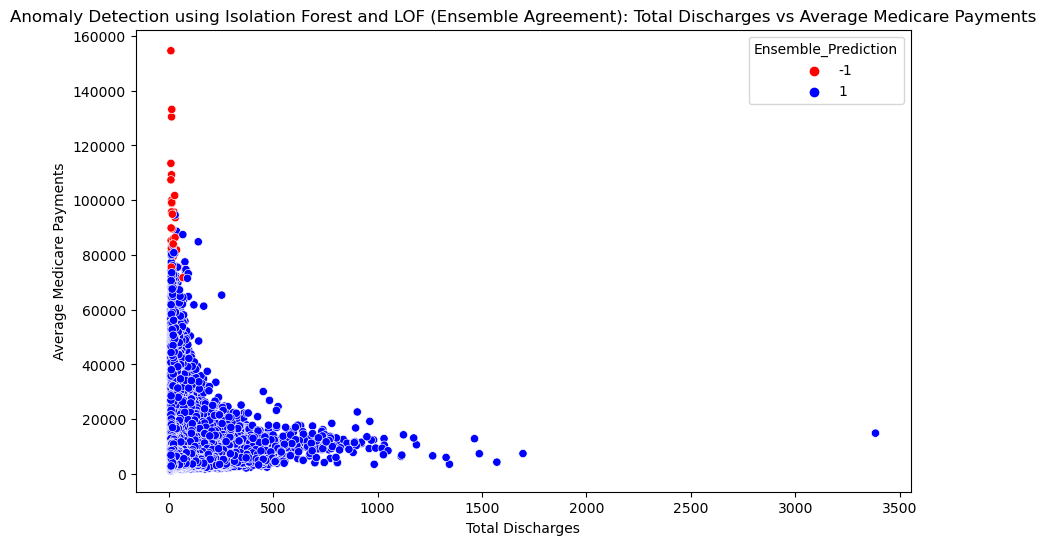

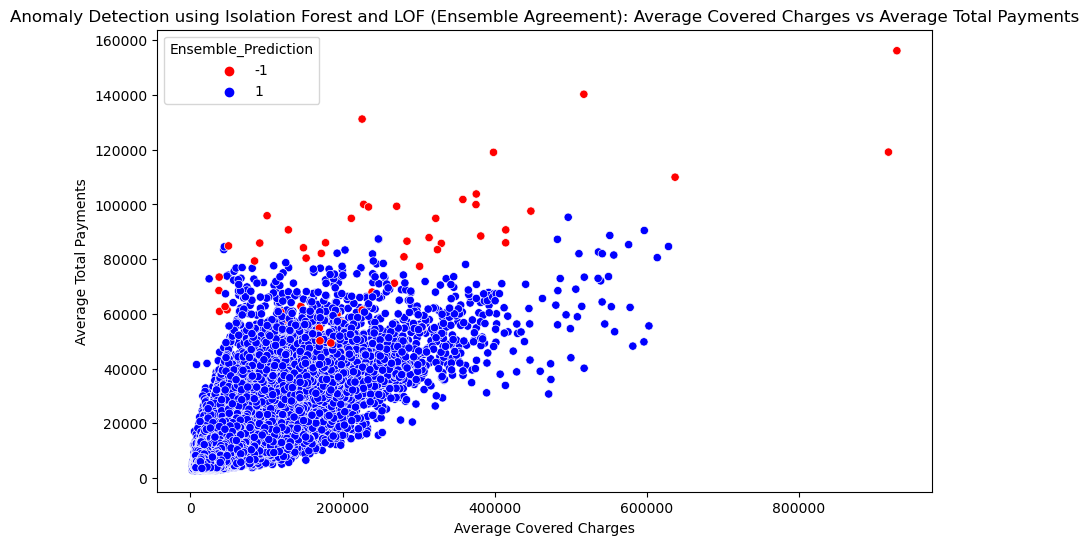

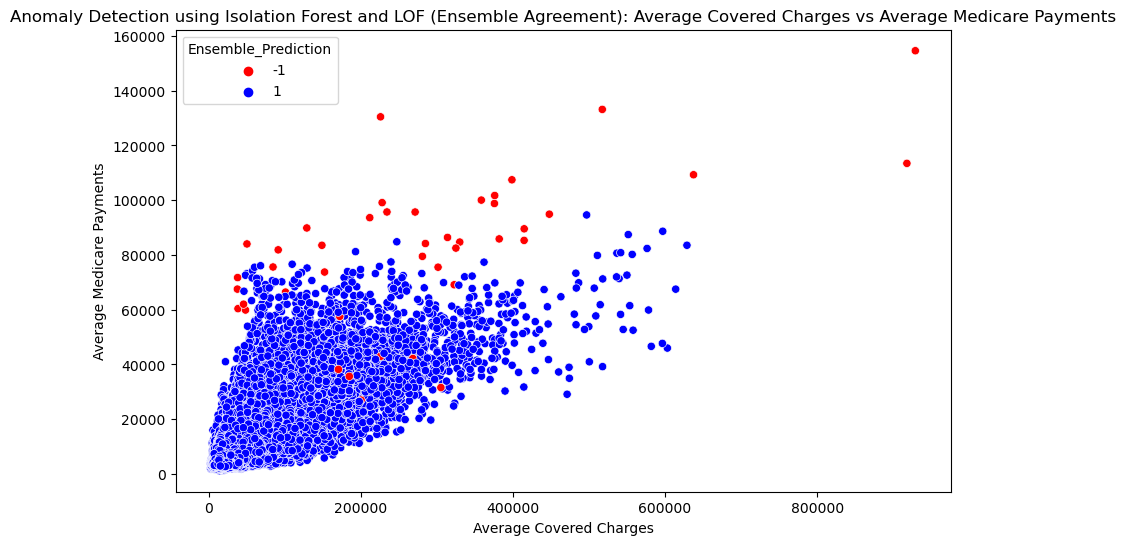

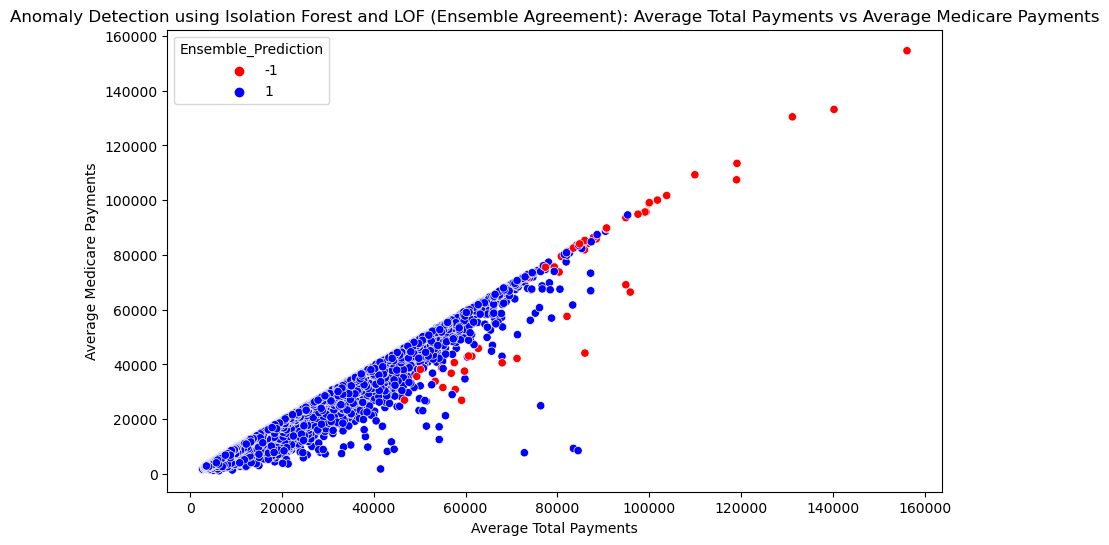

In [181]:
pairs_of_columns = [(columns_for_test[i], columns_for_test[j]) 
                    for i in range(len(columns_for_test)) 
                    for j in range(i+1, len(columns_for_test))]

for col1, col2 in pairs_of_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[col1], 
                    y=data[col2], 
                    hue=data['Ensemble_Prediction'], 
                    palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomaly Detection using Isolation Forest and LOF (Ensemble Agreement): {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Ensemble_Prediction')
    plt.show()


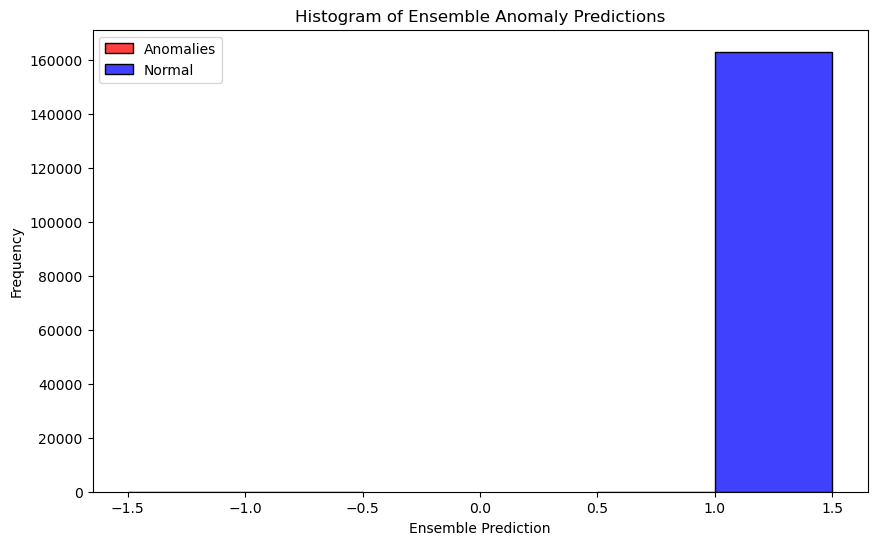

In [182]:
# Histogram to visualize the distribution of combined predictions without hue
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Ensemble_Prediction'] == -1]['Ensemble_Prediction'], kde=False, bins=2, color='red', label='Anomalies')
sns.histplot(data[data['Ensemble_Prediction'] == 1]['Ensemble_Prediction'], kde=False, bins=2, color='blue', label='Normal')
plt.title('Histogram of Ensemble Anomaly Predictions')
plt.xlabel('Ensemble Prediction')
plt.ylabel('Frequency')
plt.legend()
plt.show()

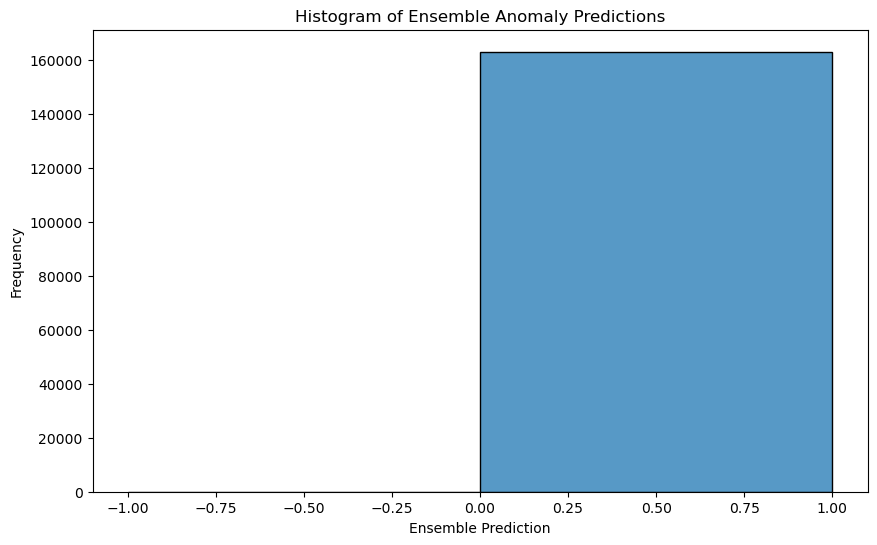

In [183]:
# Histogram to visualize the distribution of ensemble predictions
plt.figure(figsize=(10, 6))
sns.histplot(data['Ensemble_Prediction'], kde=False, bins=2, palette={-1: 'red', 1: 'blue'})
plt.title('Histogram of Ensemble Anomaly Predictions')
plt.xlabel('Ensemble Prediction')
plt.ylabel('Frequency')
plt.show()

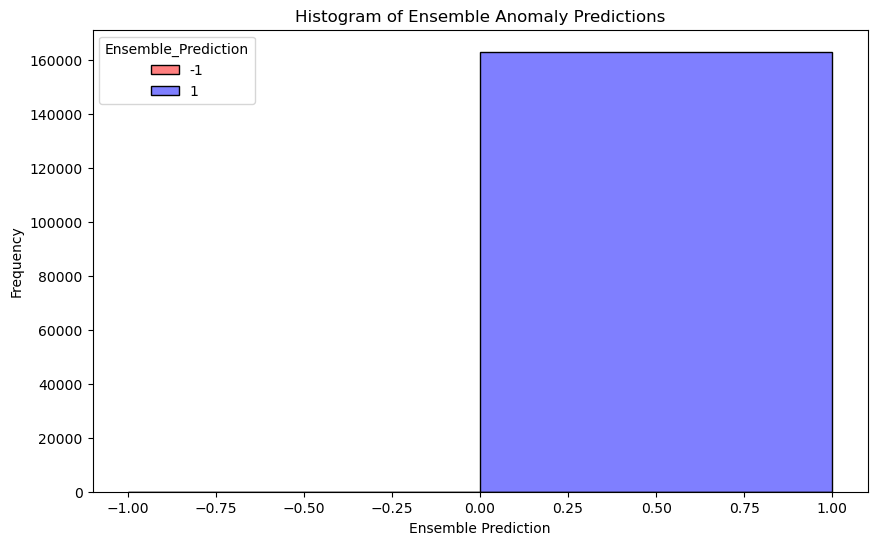

In [184]:
# Combined Histogram to visualize the distribution of ensemble predictions
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Ensemble_Prediction', hue='Ensemble_Prediction', kde=False, bins=2, palette={-1: 'red', 1: 'blue'})
plt.title('Histogram of Ensemble Anomaly Predictions')
plt.xlabel('Ensemble Prediction')
plt.ylabel('Frequency')
plt.show()


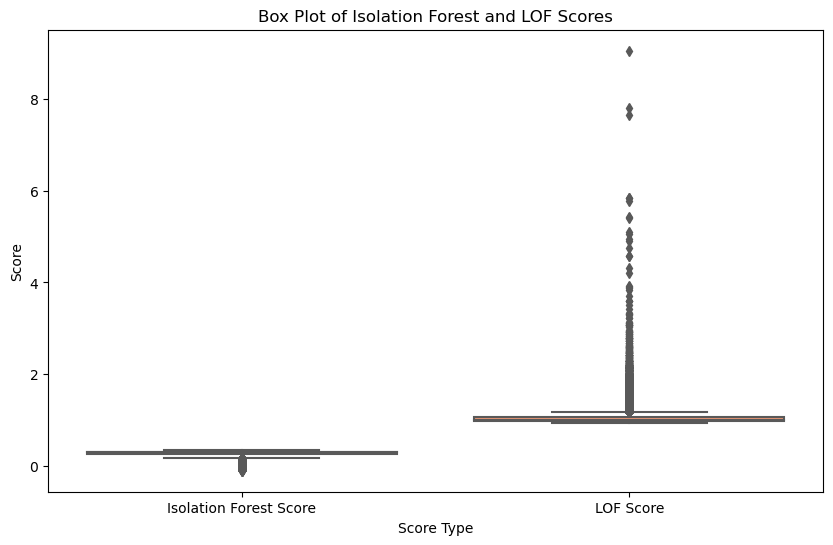

In [185]:
# Box plot for Isolation Forest scores and LOF scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['IF_Score'], data['LOF_Score']], palette='Set2')
plt.title('Box Plot of Isolation Forest and LOF Scores')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.xticks([0, 1], ['Isolation Forest Score', 'LOF Score'])
plt.show()

## Using Combined Score Method

In [186]:
# Combine the anomaly scores from both models
data['Combined_Score'] = (data['IF_Score'] + data['LOF_Score']) / 2

In [187]:
##practice
#data['Combined_Prediction'] = (data['IF_Prediction'] + data['LOF_Prediction']) / 2

# Count anomalies detected by both methods
#combined_anomalies = data[data['Combined_Prediction'] == -1]
#print(f"Count of anomalies using ensemble anomalies: {len(combined_anomalies)}")

In [188]:
# Set a threshold to classify data points as anomalies based on the combined scores
#threshold = np.percentile(data['Combined_Score'], 100 * (1 - contamination))
#data['Anomaly'] = data['Combined_Score'] < threshold

In [189]:
# Set a threshold for combined score to classify as anomaly
threshold = data['Combined_Score'].quantile(0.99)
data['Combined_Prediction'] = np.where(data['Combined_Score'] >= threshold, -1, 1)

In [190]:
# Count anomalies detected by the combined score method
combined_anomalies = data[data['Combined_Prediction'] == -1]
print(f"Count of combined anomalies (combined score method): {len(combined_anomalies)}")

Count of combined anomalies (combined score method): 1631


In [191]:
# Visualize or further analyze the anomalies
print("Anomalies using Combined Score Method:")
#print(combined_anomalies)
df = pd.DataFrame(combined_anomalies)

df

Anomalies using Combined Score Method:


DRG Definition  Provider Id  \
36      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        30062   
87      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        50485   
88      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        50180   
107     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        50380   
139     039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        60100   
...                                          ...          ...   
162685            948 - SIGNS & SYMPTOMS W/O MCC       390168   
162713            948 - SIGNS & SYMPTOMS W/O MCC       390312   
162759            948 - SIGNS & SYMPTOMS W/O MCC       440011   
162843            948 - SIGNS & SYMPTOMS W/O MCC       450200   
162884            948 - SIGNS & SYMPTOMS W/O MCC       450656   

                                         Provider Name  \
36           SUMMIT HEALTHCARE REGIONAL MEDICAL CENTER   
87                  LONG BEACH MEMORIAL MEDICAL CENTER   
88      JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS   
107                            GOOD SAMARITAN HOSPITAL   
139                      MEDICAL CENTER OF AURORA, THE   
...                                                ...   
162685                        BUTLER MEMORIAL HOSPITAL   
162713             CANCER TREATMENT CENTERS OF AMERICA   
162759                        BLOUNT MEMORIAL HOSPITAL   
162843                  WADLEY REGIONAL MEDICAL CENTER   
162884                      NACOGDOCHES MEDICAL CENTER   

              Provider Street Address Provider City Provider State  \
36            2200 SHOW LOW LAKE ROAD      SHOW LOW             AZ   
87                  2801 ATLANTIC AVE    LONG BEACH             CA   
88             1601 YGNACIO VALLEY RD  WALNUT CREEK             CA   
107              2425 SAMARITAN DRIVE      SAN JOSE             CA   
139                 1501 S POTOMAC ST        AURORA             CO   
...                               ...           ...            ...   
162685               ONE HOSPITAL WAY        BUTLER             PA   
162713       1331 EAST WYOMING AVENUE  PHILADELPHIA             PA   
162759  907 E LAMAR ALEXANDER PARKWAY     MARYVILLE             TN   
162843               1000 PINE STREET     TEXARKANA             TX   
162884        4920 NE STALLINGS DRIVE   NACOGDOCHES             TX   

        Provider Zip Code Hospital Referral Region Description  \
36                  85901                         AZ - Phoenix   
87                  90806                     CA - Los Angeles   
88                  94598             CA - Contra Costa County   
107                 95124                        CA - San Jose   
139                 80012                          CO - Denver   
...                   ...                                  ...   
162685              16001                      PA - Pittsburgh   
162713              19124                    PA - Philadelphia   
162759              37804                       TN - Knoxville   
162843              75501                       AR - Texarkana   
162884              75961                         TX - Houston   

        Total Discharges  Average Covered Charges  Average Total Payments  \
36                    17                 15931.52                10000.82   
87                    23                 51813.13                 8349.60   
88                    20                 85165.10                12355.85   
107                   17                 69223.47                11721.64   
139                   20                 63986.40                 8613.80   
...                  ...                      ...                     ...   
162685                12                 12600.00                 3583.33   
162713                24                 83945.95                28968.20   
162759                29                 14055.17                 3515.65   
162843                11                 18795.36                 4137.54   
162884                13                 23945.84                 3589.92  

In [192]:
# Save detected anomalies to a CSV file
combined_anomalies_file_path = r'C:\Users\Dell\Downloads\combined_anomalies.csv'    
combined_anomalies.to_csv(combined_anomalies_file_path, index=False)
print(f"Detected anomalies (combined score method) exported to {combined_anomalies_file_path}")

Detected anomalies (combined score method) exported to C:\Users\Dell\Downloads\combined_anomalies.csv


In [193]:
combined_score_time = time.time() - start_time
print(f"Time taken for Combined Score Method: {combined_score_time:.2f} seconds")

Time taken for Combined Score Method: 241.52 seconds


In [194]:
ensemble_anomalies_time = time.time() - start_time
print(f"Time taken for Ensemble Agreement Method: {ensemble_anomalies_time:.2f} seconds")

Time taken for Ensemble Agreement Method: 241.54 seconds


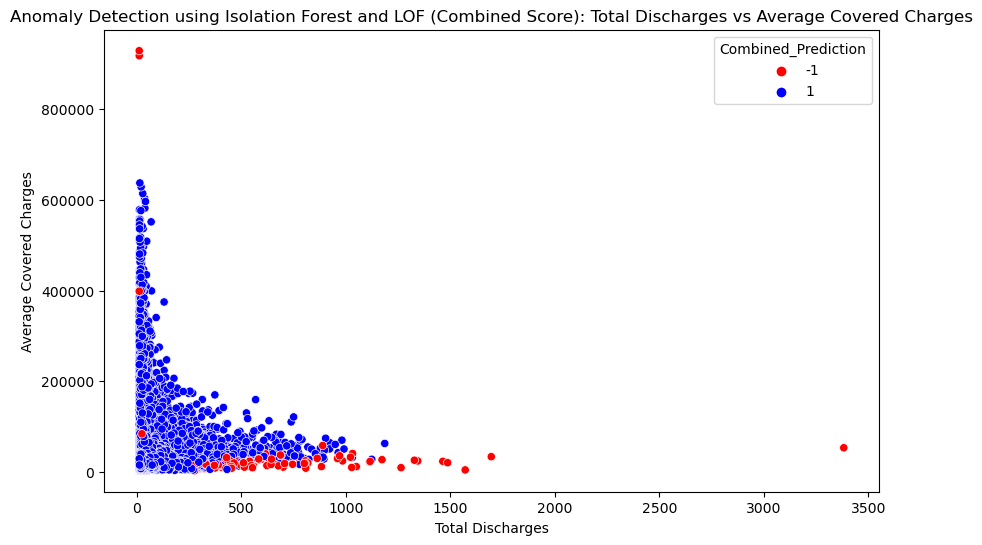

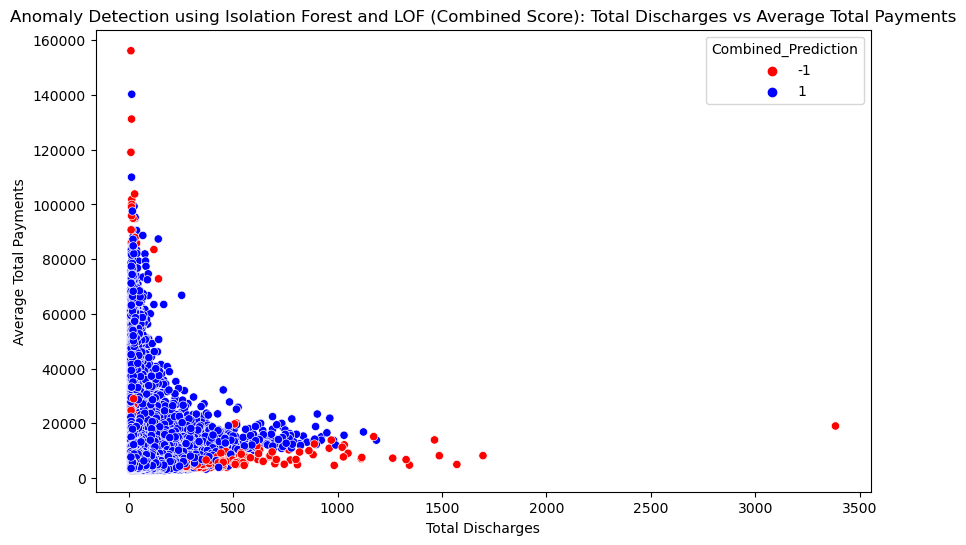

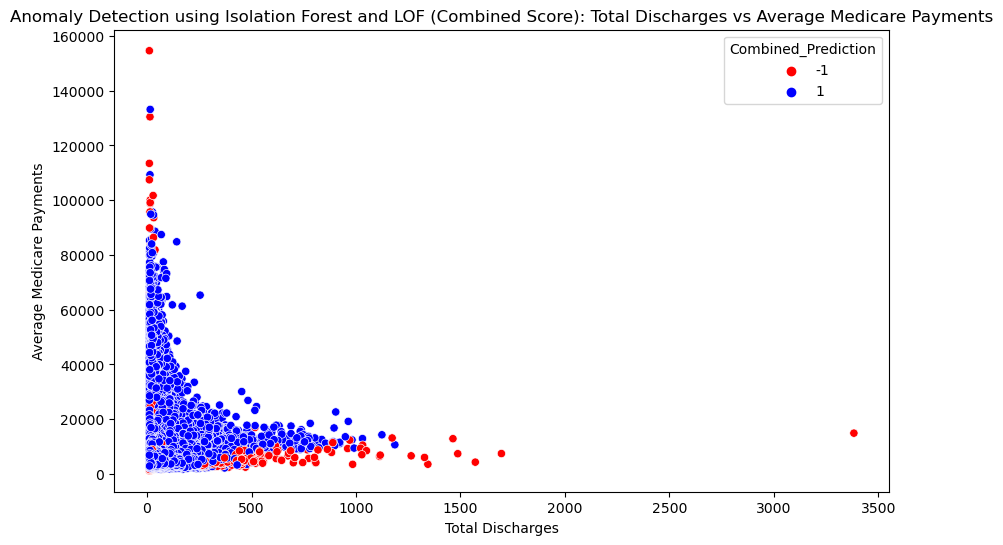

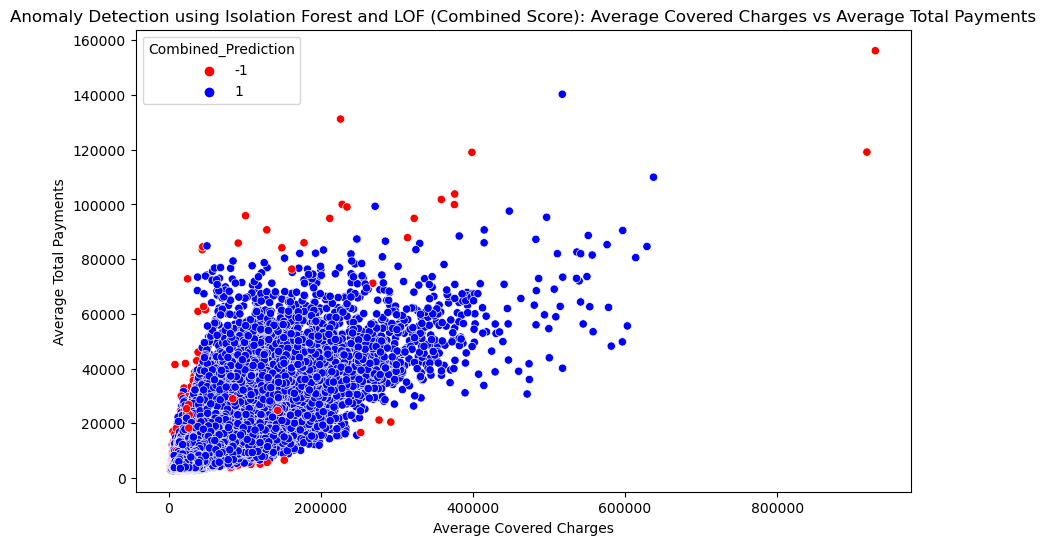

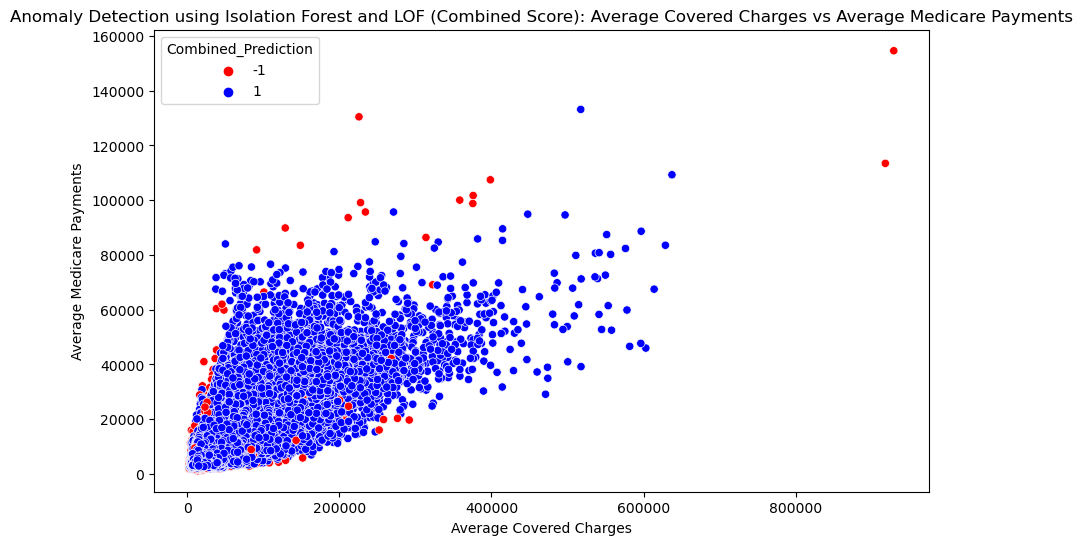

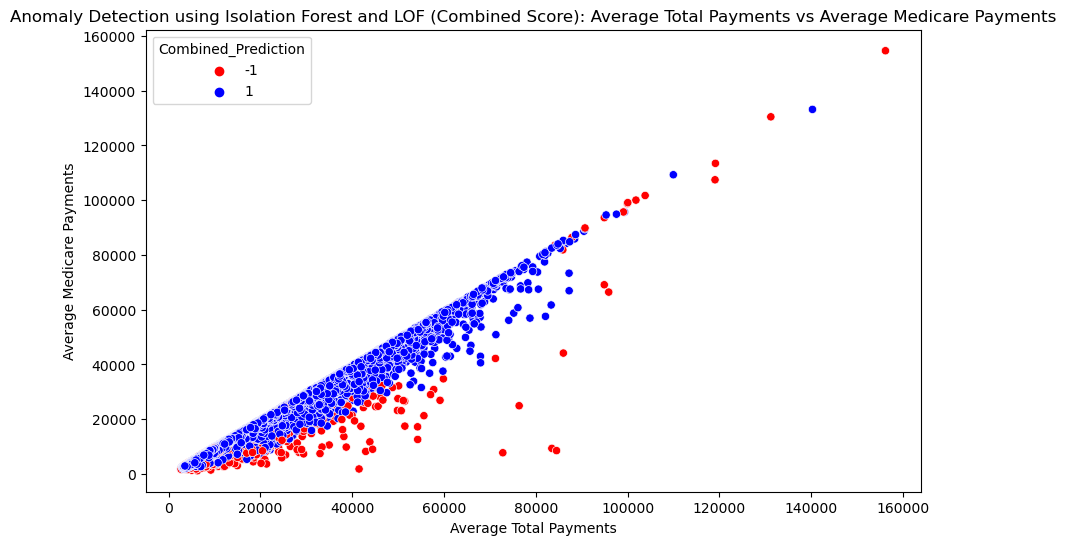

In [195]:
pairs_of_columns = [(columns_for_test[i], columns_for_test[j]) 
                    for i in range(len(columns_for_test)) 
                    for j in range(i+1, len(columns_for_test))]

for col1, col2 in pairs_of_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[col1], 
                    y=data[col2], 
                    hue=data['Combined_Prediction'], 
                    palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomaly Detection using Isolation Forest and LOF (Combined Score): {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(title='Combined_Prediction')
    plt.show()


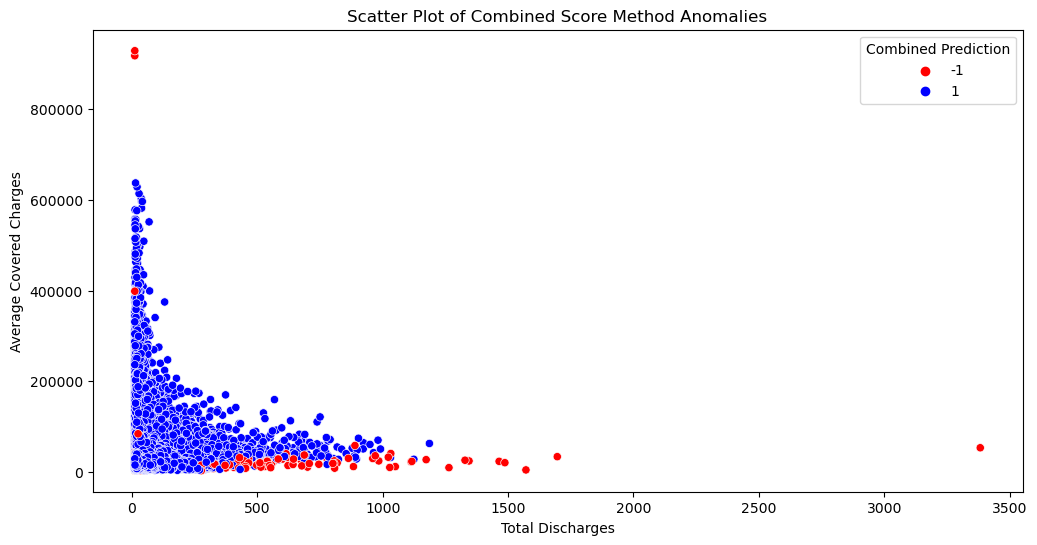

In [196]:
# Scatter plot for combined score method
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['Total Discharges'], y=data['Average Covered Charges'], hue=data['Combined_Prediction'], palette={-1: 'red', 1: 'blue'})
plt.title('Scatter Plot of Combined Score Method Anomalies')
plt.xlabel('Total Discharges')
plt.ylabel('Average Covered Charges')
plt.legend(title='Combined Prediction')
plt.show()

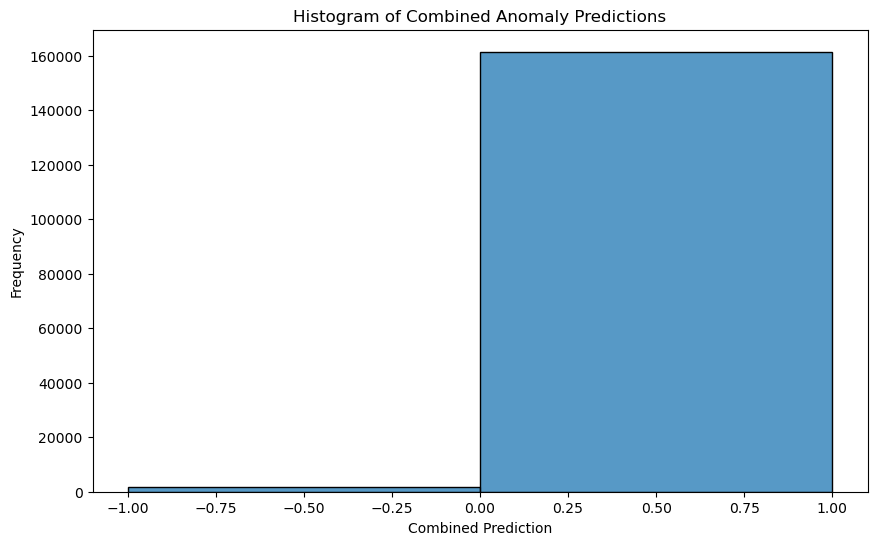

In [197]:
# Histogram to visualize the distribution of combined predictions
plt.figure(figsize=(10, 6))
sns.histplot(data['Combined_Prediction'], kde=False, bins=2, palette={-1: 'red', 1: 'blue'})
plt.title('Histogram of Combined Anomaly Predictions')
plt.xlabel('Combined Prediction')
plt.ylabel('Frequency')
plt.show()

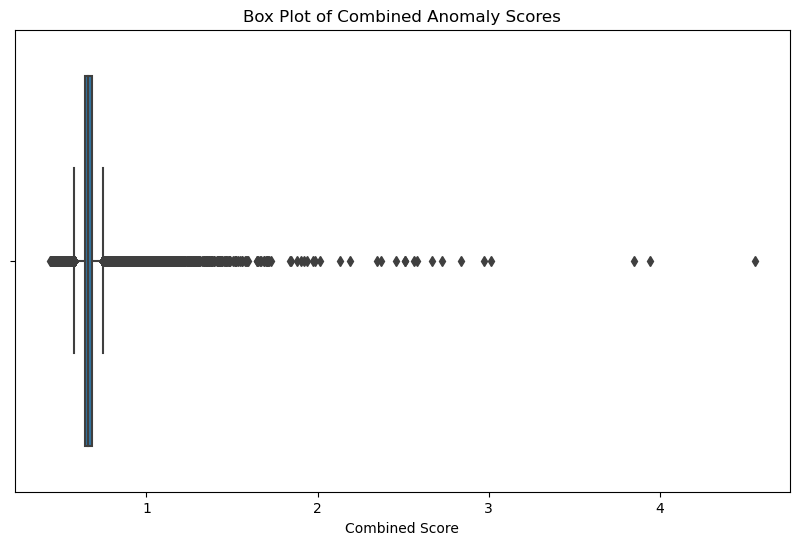

In [198]:
# Box plot for combined scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Combined_Score'])
plt.title('Box Plot of Combined Anomaly Scores')
plt.xlabel('Combined Score')
plt.show()


In [199]:
combined_anomalies_file_path = r'C:\Users\Dell\Downloads\Ensemble_Combined_Score.csv'
combined_anomalies.to_csv(combined_anomalies_file_path, index=False)
print(f"combined_anomalies: Anomalies exported to {combined_anomalies_file_path}")

combined_anomalies: Anomalies exported to C:\Users\Dell\Downloads\Ensemble_Combined_Score.csv


In [200]:
combined_anomalies_file_path = r'C:\Users\Dell\Downloads\Ensemble_Combined_Score.csv'
combined_anomalies.to_csv(combined_anomalies_file_path, index=False)
print(f"combined_anomalies: Anomalies exported to {combined_anomalies_file_path}")

combined_anomalies: Anomalies exported to C:\Users\Dell\Downloads\Ensemble_Combined_Score.csv


In [201]:
file_path = r"C:\Users\Dell\Downloads\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv"

In [202]:
# Load the results from each file
lof_results = pd.read_csv(r'C:\Users\Dell\Downloads\lof_results.csv')
iforest_results = pd.read_csv(r'C:\Users\Dell\Downloads\iforest_results.csv')
ocsvm_results = pd.read_csv(r'C:\Users\Dell\Downloads\ocsvm_results.csv')
ensemble_results1 = pd.read_csv(r'C:\Users\Dell\Downloads\ensemble_agreement.csv')
ensemble_results2 = pd.read_csv(r'C:\Users\Dell\Downloads\ensemble_combined.csv')
